# COGS 108 - EDA Checkpoint

# Names

- Mingyi Li, Weiwen Dong (Part I)
- Yutian Shi, Jinyu Li (Part II)

<a id='research_question'></a>
# Research Question

Do Twitter users’ four different Myers–Briggs MBTI personality types (Analysts: NT, Diplomats: NF, Sentinels: SJ, Explorers: SP) influence their social media activeness and engagement? 

Within each aspect of the four dimensions (Mind: E/I, Energy: N/S, Nature: F/T, Tactics: J/P), are people with certain personality traits being more active and engaged than others, such as Extroverts versus Introverts within the Mind aspect?

# Dataset(s)

1. 
- Dataset Name: user_info.csv
- Source of the dataset: https://www.kaggle.com/datasets/sanketrai/twitter-mbti-dataset?select=user_info.csv
- Number of observations: 8328

This dataset contains Twitter users' activities on the Twitter, such as the number of followers, followings, and retweets, etc. We use it to measure the activeness and engagement of users.

2. 
- Dataset Name: mbti_labels.csv
- Source of the dataset: https://www.kaggle.com/datasets/sanketrai/twitter-mbti-dataset?select=mbti_labels.csv
- Number of observations: 8328

This dataset matches the user id with its personality type. By merging with user_info.csv and user_tweets.csv (by id), we can map each user activities with the MBTI personality type.

3. 
- Dataset Name: twitter_MBTI.csv
- Source of the dataset: https://www.kaggle.com/datasets/mazlumi/mbti-personality-type-twitter-dataset
- Number of observations: 7811

This dataset contains the tweets of the users and the corresponding users' MBTI personality types.

4. 
- Dataset Name: user_tweets.csv
- Source of the dataset: https://www.kaggle.com/datasets/sanketrai/twitter-mbti-dataset?select=user_tweets.csv
- Number of observations: 24598

This dataset contains Twitter users tweet content mapped with MBTI personality types. As the last one, we use them to do some exploratory studies and find some most representative and frequent emojis each personality type usually uses.


# Setup

In [363]:
# Uncomment to install the new package
# ! pip install pandas
# ! pip install emoji
# ! pip install gdown
# ! pip install emoji --upgrade
# ! pip install urllib3==1.26.6

In [364]:
# Remember to import our package to run the file
import pandas as pd
import emoji
import numpy as np
import gdown
import scipy.stats as stats

In [365]:
# Make datasets have public access
DRIVE_URL = 'https://drive.google.com/uc?id='
USER_INFO_URL = 'https://drive.google.com/file/d/1_A6JiMIXGedcehE_uxP15DwBxVWvlPVR/view?usp=sharing'
MBTI_LABEL_URL = 'https://drive.google.com/file/d/1sbJXubnmHm6WEXL5pk7-XNInV9SLctrK/view?usp=sharing'
TWITTER_MBTI_URL = 'https://drive.google.com/file/d/1mIhlcu8P6YwMyuVJPrjLr33ZO54O1PSk/view?usp=sharing'
USER_TWEETS_URL = 'https://drive.google.com/file/d/1dbR_UdnXe-GjM3hj6ocFiMlx-ueJDqOJ/view?usp=sharing'

In [366]:
# Reformat URL from the Google Drive
def reformatURL(csv_url):
    return DRIVE_URL+ csv_url.split('/')[-2]

# Download large .csv files
def downloadLargeCSV(csv_url, filename):
    id = csv_url.split('/')[-2]
    url = DRIVE_URL+id
    output = filename+'.csv'
    gdown.download(url, output, quiet=False)
    return output

In [367]:
# Uncomment to download datasets
# text_df = pd.read_csv(downloadLargeCSV(TWITTER_MBTI_URL, 'twitter_MBTI'))
# user_df = pd.read_csv(downloadLargeCSV(USER_TWEETS_URL, 'user_tweets'))
# Uncomment if the datasets have already been downloaded
text_df = pd.read_csv('twitter_MBTI.csv')
user_df = pd.read_csv('user_tweets.csv')

/var/folders/_2/vyqtrjvd7397qgjvv8wtbsnh0000gn/T/ipykernel_12057/3040592152.py:6: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  user_df = pd.read_csv('user_tweets.csv')


In [368]:
# Read datasets: user_info and mbti_label into dataframes
info_df = pd.read_csv(reformatURL(USER_INFO_URL))
label_df = pd.read_csv(reformatURL(MBTI_LABEL_URL))

# Data Cleaning

## Part I: Data Cleaning for Twitter User Activities Datasets (Datasets #1, #2)

For Twitter users' activeness and engagment information analysis, we used user_info.csv(info_df) and mbti_labels.csv(label_df), measuring them in 2 dimensions: one by user's interaction with others and one by user's tweeting activities. To clean the data, we selected columns with values we need and dropped NaN values.

In [369]:
info_df.head()

id      id_str                  name  screen_name   
0   160881623   160881623  Biam 🍃 32 Days AC 🌴🌹      _AiBiam  \
1    28968838    28968838                   pao  paoacflores   
2  2325006565  2325006565        pengu🌻❤️🍓@青鳥王国    PenguPooh   
3   907848145   907848145             lynn bean     sukaihan   
4  1330237585  1330237585                  Sei💫    nemuiryuu   

                        location   
0                 Hateno Village  \
1  Mandaluyong/StaCruz Laguna PH   
2               PengUstine CCTV    
3                      Singapore   
4                            NaN   

                                         description  verified   
0  🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...     False  \
1  right brained lefty. infp. hufflepuff. collect...     False   
2  🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...     False   
3  eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...     False   
4           【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P     False   

   followers_count  friends_count  listed_count  ...  total_mentions_count   
0             1904            782            67  ...                   139  \
1            14135           1338            47  ...                   156   
2             1223            604            31  ...                   170   
3             8512            312           147  ...                   174   
4             1805            340            69  ...                   127   

   total_media_count  number_of_tweets_scraped  average_tweet_length   
0                114                     200.0             11.785000  \
1                 34                     200.0             16.150000   
2                 40                     199.0              9.668342   
3                 77                     192.0             14.718750   
4                 99                     200.0              7.655000   

   average_retweet_count  average_favorite_count  average_hashtag_count   
0            3003.580000                0.980000               0.250000  \
1            3718.745000                1.695000               0.410000   
2            3722.211055                0.824121               0.356784   
3           10028.718750                1.526042               0.401042   
4             827.370000                2.190000               0.080000   

   average_url_count  average_mentions_count  average_media_count  
0           0.185000                0.695000             0.570000  
1           0.215000                0.780000             0.170000  
2           0.195980                0.854271             0.201005  
3           0.130208                0.906250             0.401042  
4           0.055000                0.635000             0.495000  

[5 rows x 28 columns]

In [370]:
label_df.head()

id mbti_personality
0   160881623             infp
1    28968838             infp
2  2325006565             infp
3   907848145             infp
4  1330237585             infp

In [371]:
# Merge two sets based on the user ID
complete_df = info_df.merge(label_df, left_on='id', right_on='id')

In [372]:
complete_df.head()

id      id_str                  name  screen_name   
0   160881623   160881623  Biam 🍃 32 Days AC 🌴🌹      _AiBiam  \
1    28968838    28968838                   pao  paoacflores   
2  2325006565  2325006565        pengu🌻❤️🍓@青鳥王国    PenguPooh   
3   907848145   907848145             lynn bean     sukaihan   
4  1330237585  1330237585                  Sei💫    nemuiryuu   

                        location   
0                 Hateno Village  \
1  Mandaluyong/StaCruz Laguna PH   
2               PengUstine CCTV    
3                      Singapore   
4                            NaN   

                                         description  verified   
0  🐸 {INFP}{ESP/ENG} • Current obsession: Unchart...     False  \
1  right brained lefty. infp. hufflepuff. collect...     False   
2  🇹🇼🇯🇵🇺🇸｜♋E/INFP｜和↔英｜20⬆｜chaotic bi｜高浮上｜181001｜佐...     False   
3  eng, 中 | exo, x-exo and wayv 💕 | 22 | scorpio ...     False   
4           【INFP】He/Him ✧ CEO of gothic idols ★ 蘭子P     False   

   followers_count  friends_count  listed_count  ...  total_media_count   
0             1904            782            67  ...                114  \
1            14135           1338            47  ...                 34   
2             1223            604            31  ...                 40   
3             8512            312           147  ...                 77   
4             1805            340            69  ...                 99   

   number_of_tweets_scraped  average_tweet_length  average_retweet_count   
0                     200.0             11.785000            3003.580000  \
1                     200.0             16.150000            3718.745000   
2                     199.0              9.668342            3722.211055   
3                     192.0             14.718750           10028.718750   
4                     200.0              7.655000             827.370000   

   average_favorite_count  average_hashtag_count  average_url_count   
0                0.980000               0.250000           0.185000  \
1                1.695000               0.410000           0.215000   
2                0.824121               0.356784           0.195980   
3                1.526042               0.401042           0.130208   
4                2.190000               0.080000           0.055000   

   average_mentions_count  average_media_count  mbti_personality  
0                0.695000             0.570000              infp  
1                0.780000             0.170000              infp  
2                0.854271             0.201005              infp  
3                0.906250             0.401042              infp  
4                0.635000             0.495000              infp  

[5 rows x 29 columns]

## Explore Missingness 
We first explored the datasets and found that all the missing values are the columns that contain private information (e.g. account name, location). We removed all columns that contain such private identifiable information and selected ones that were most useful for measuring social media activeness and engagement.

In [373]:
info_df.isna().sum(axis = 0)

id                                 0
id_str                             0
name                               1
screen_name                        0
location                        1199
description                      119
verified                           0
followers_count                    0
friends_count                      0
listed_count                       0
favourites_count                   0
statuses_count                     0
number_of_quoted_statuses          0
number_of_retweeted_statuses       0
total_retweet_count                0
total_favorite_count               0
total_hashtag_count                0
total_url_count                    0
total_mentions_count               0
total_media_count                  0
number_of_tweets_scraped           0
average_tweet_length               0
average_retweet_count              0
average_favorite_count             0
average_hashtag_count              0
average_url_count                  0
average_mentions_count             0
a

In [374]:
info_df.dtypes

id                                int64
id_str                            int64
name                             object
screen_name                      object
location                         object
description                      object
verified                           bool
followers_count                   int64
friends_count                     int64
listed_count                      int64
favourites_count                  int64
statuses_count                    int64
number_of_quoted_statuses         int64
number_of_retweeted_statuses      int64
total_retweet_count               int64
total_favorite_count              int64
total_hashtag_count               int64
total_url_count                   int64
total_mentions_count              int64
total_media_count                 int64
number_of_tweets_scraped        float64
average_tweet_length            float64
average_retweet_count           float64
average_favorite_count          float64
average_hashtag_count           float64


To measure social media activeness & engagement, we categorized our data into two categories based on what we had. The first category (member_df) is related to user interactions: the number of followers, followings, and listed groups. The second category (tweet_df) is related to tweeting activities: the number of total tweets, favorite tweets, and total hashtags of tweets.

In [375]:
# Select columns for measuring activeness & engagement
member_df = complete_df[['mbti_personality', 'id','followers_count', 'friends_count', 'listed_count']]
tweet_df = complete_df[['mbti_personality','id','favourites_count', 'statuses_count','total_hashtag_count']]

In [376]:
# Rename confusing col names based on the description in the data source
member_df = member_df.rename(columns={"friends_count": "following_count"})
tweet_df.columns = ['mbti_personality','id','liked_count', 'total_tweets_count', 'total_hashtag_count']

In [377]:
tweet_df.head()

mbti_personality          id  liked_count  total_tweets_count   
0             infp   160881623       133836              410600  \
1             infp    28968838       103794              358901   
2             infp  2325006565       178178              312384   
3             infp   907848145        40136              282995   
4             infp  1330237585       151521              244181   

   total_hashtag_count  
0                   50  
1                   82  
2                   71  
3                   77  
4                   16

In [378]:
member_df.head()

mbti_personality          id  followers_count  following_count  listed_count
0             infp   160881623             1904              782            67
1             infp    28968838            14135             1338            47
2             infp  2325006565             1223              604            31
3             infp   907848145             8512              312           147
4             infp  1330237585             1805              340            69

In [379]:
# Drop nan values
member_df = member_df.dropna(how='all')
tweet_df = tweet_df.dropna(how='all')
print(member_df.shape, tweet_df.shape)

(8328, 5) (8328, 5)


# Data Analysis & Results (EDA)

In [380]:
#! pip install seaborn

In [381]:
#! pip install scipy

In [382]:
# Import packages to do visualization
import seaborn as sns
sns.set(font_scale=2, style="white")
import matplotlib.pyplot as plt
# Import packages for statistics
from scipy.stats import f_oneway
import scipy.stats

## Distributions of Variables

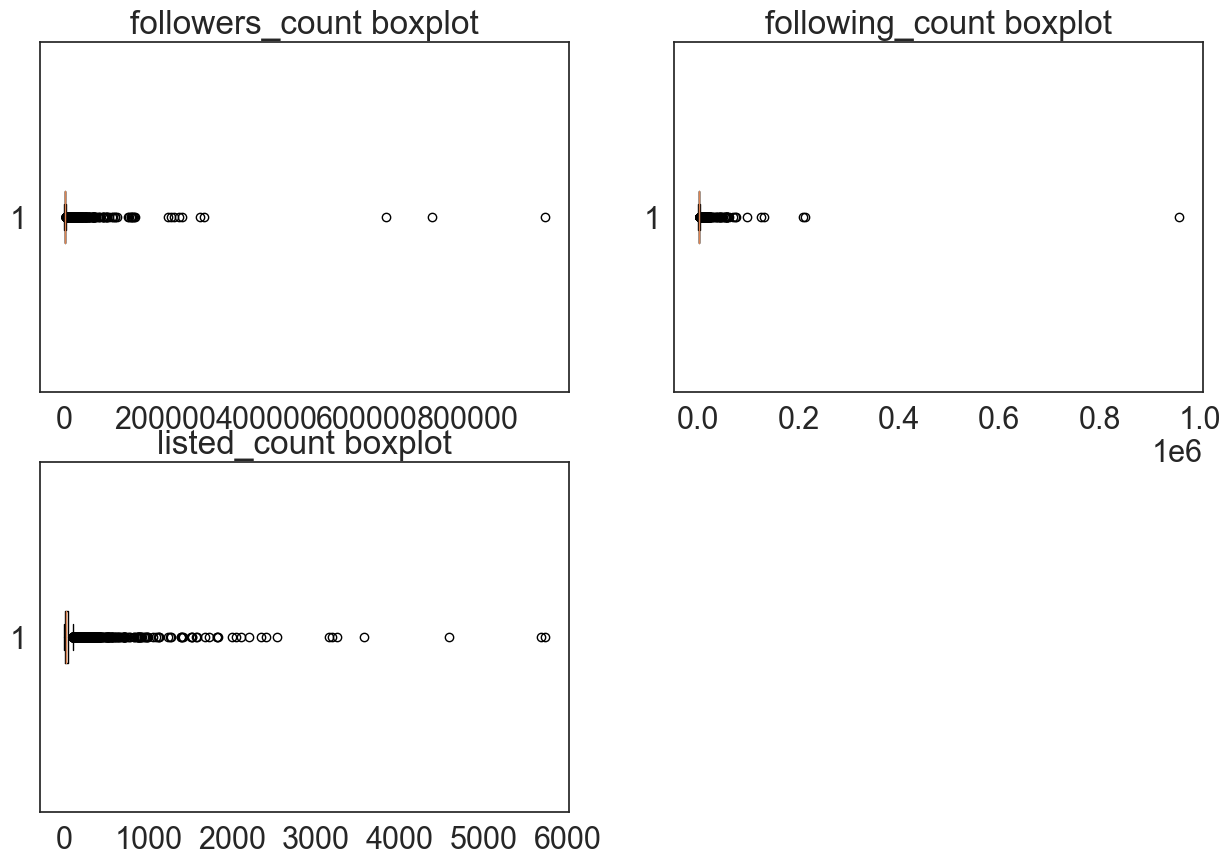

In [383]:
# Visualize the outliers in the useful columns in member_df.
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.boxplot(member_df['followers_count'], vert=False)
ax1.boxplot(member_df['following_count'], vert=False)
ax2.boxplot(member_df['listed_count'], vert=False)
ax0.set_title('followers_count boxplot')
ax1.set_title('following_count boxplot')
ax2.set_title('listed_count boxplot')
ax3.remove()
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

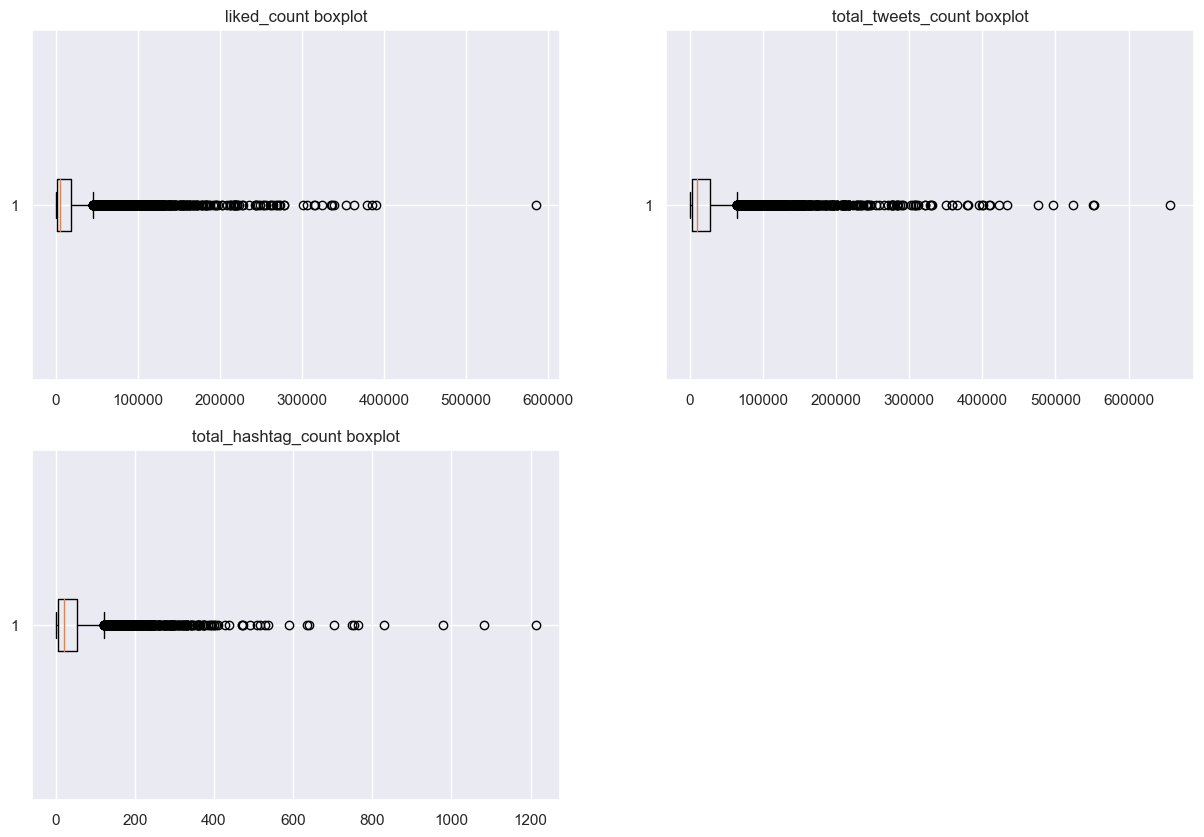

In [384]:
# Visualize the outliers in the useful columns in tweet_df.
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.boxplot(tweet_df['liked_count'], vert=False)
ax1.boxplot(tweet_df['total_tweets_count'], vert=False)
ax2.boxplot(tweet_df['total_hashtag_count'], vert=False)
ax0.set_title('liked_count boxplot')
ax1.set_title('total_tweets_count boxplot')
ax2.set_title('total_hashtag_count boxplot')
ax3.remove()
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

## Four Types EDA

According to [MBTI 16 Personalities Website](https://www.16personalities.com/personality-types), there are 4 major types of the personality categorized by distinct combinations of 4 dimensions (E/I, N/S, F/T, J/P):\
NT(Analysts), NF(Diplomats), SJ(Sentinels), and SP(Explorers).

In [385]:
# Categorize each personality into four types (Analysts, Diplomats, Sentinels, and Explorers)
def getFourTypes(mbti_str):
    if 'nt'in mbti_str:
        return 'Analysts'
    elif 'nf' in mbti_str:
        return 'Diplomats'
    elif ('sfj' in mbti_str) or ('stj' in mbti_str):
        return 'Sentinels'
    elif ('sfp' in mbti_str) or ('stp' in mbti_str):
        return 'Explorers'

In [386]:
member_df['Four_Type'] = member_df['mbti_personality'].apply(getFourTypes)
tweet_df['Four_Type'] = tweet_df['mbti_personality'].apply(getFourTypes)

### Explore different attributes in our dataframes: 

```member_df```: followers_count, following_count, listed_count

```tweet_df```: liked_count, total_tweets_count, total_hashtag_count

In [387]:
# Describe and explore some statistics of all the attributes for 16 personalities
member_df.groupby(['mbti_personality','Four_Type']).describe()

id                                           
                            count          mean           std         min   
mbti_personality Four_Type                                                  
enfj             Diplomats  723.0  8.945780e+16  2.718101e+17     32643.0  \
enfp             Diplomats  900.0  1.156846e+17  3.085055e+17      2654.0   
entj             Analysts   677.0  8.786957e+16  2.727702e+17   1479681.0   
entp             Analysts   586.0  1.249488e+17  3.137407e+17    742883.0   
esfj             Sentinels  236.0  1.344761e+17  3.218253e+17  14569594.0   
esfp             Explorers  202.0  1.505594e+17  3.398379e+17   3578811.0   
estj             Sentinels  221.0  8.973310e+16  2.668727e+17   1329371.0   
estp             Explorers  147.0  2.325662e+17  3.999588e+17   9908862.0   
infj             Diplomats  917.0  1.440556e+17  3.397987e+17    787880.0   
infp             Diplomats  899.0  1.952864e+17  3.871438e+17     12444.0   
intj             Analysts   905.0  1.193870e+17  3.113853e+17       295.0   
intp             Analysts   712.0  1.726672e+17  3.657103e+17     39623.0   
isfj             Sentinels  420.0  9.844203e+16  2.904675e+17      5203.0   
isfp             Explorers  232.0  2.203852e+17  3.919153e+17   2871341.0   
istj             Sentinels  342.0  1.211637e+17  3.159246e+17    777702.0   
istp             Explorers  209.0  2.543177e+17  4.074993e+17   1003511.0   

                                                                      
                                     25%          50%           75%   
mbti_personality Four_Type                                            
enfj             Diplomats  4.359582e+07  225553559.0  1.070522e+09  \
enfp             Diplomats  3.605069e+07  211514965.0  1.307172e+09   
entj             Analysts   4.147000e+07  219046687.0  1.215217e+09   
entp             Analysts   5.947345e+07  311927499.0  2.456835e+09   
esfj             Sentinels  6.301940e+07  234802503.5  1.761929e+09   
esfp             Explorers  7.530429e+07  318866463.5  2.727957e+09   
estj             Sentinels  4.891880e+07  228934723.0  8.647522e+08   
estp             Explorers  2.219877e+08  628128886.0  7.151617e+17   
infj             Diplomats  3.806712e+07  284868921.0  2.477657e+09   
infp             Diplomats  5.783648e+07  430507728.0  3.267275e+09   
intj             Analysts   2.753888e+07  188954079.0  1.569291e+09   
intp             Analysts   4.842214e+07  351026671.0  2.846300e+09   
isfj             Sentinels  5.670682e+07  297284197.0  2.016056e+09   
isfp             Explorers  1.021961e+08  558637736.0  4.876055e+09   
istj             Sentinels  4.588166e+07  231696811.0  1.849396e+09   
istp             Explorers  1.215901e+08  856046587.0  7.413868e+17   

                                         followers_count               ...   
                                     max           count         mean  ...   
mbti_personality Four_Type                                             ...   
enfj             Diplomats  1.140033e+18           723.0  1963.118949  ...  \
enfp             Diplomats  1.157056e+18           900.0  2591.627778  ...   
entj             Analysts   1.173605e+18           677.0  2722.358936  ...   
entp             Analysts   1.166486e+18           586.0  2120.215017  ...   
esfj             Sentinels  1.169602e+18           236.0  2765.406780  ...   
esfp             Explorers  1.125126e+18           202.0  2605.465347  ...   
estj             Sentinels  1.170123e+18           221.0  2869.751131  ...   
estp             Explorers  1.132781e+18           147.0  1572.102041  ...   
infj             Diplomats  1.176568e+18           917.0  4162.583424  ...   
infp             Diplomats  1.175158e+18           899.0  3869.899889  ...   
intj             Analysts   1.163835e+18           905.0  4303.625414  ...   
intp             Analysts   1.171712e+18           712.0  4142.523876  ...   
isfj             Sentinels  1.121230e+18       

In [388]:
tweet_df.groupby(['mbti_personality','Four_Type']).describe()

id                                           
                            count          mean           std         min   
mbti_personality Four_Type                                                  
enfj             Diplomats  723.0  8.945780e+16  2.718101e+17     32643.0  \
enfp             Diplomats  900.0  1.156846e+17  3.085055e+17      2654.0   
entj             Analysts   677.0  8.786957e+16  2.727702e+17   1479681.0   
entp             Analysts   586.0  1.249488e+17  3.137407e+17    742883.0   
esfj             Sentinels  236.0  1.344761e+17  3.218253e+17  14569594.0   
esfp             Explorers  202.0  1.505594e+17  3.398379e+17   3578811.0   
estj             Sentinels  221.0  8.973310e+16  2.668727e+17   1329371.0   
estp             Explorers  147.0  2.325662e+17  3.999588e+17   9908862.0   
infj             Diplomats  917.0  1.440556e+17  3.397987e+17    787880.0   
infp             Diplomats  899.0  1.952864e+17  3.871438e+17     12444.0   
intj             Analysts   905.0  1.193870e+17  3.113853e+17       295.0   
intp             Analysts   712.0  1.726672e+17  3.657103e+17     39623.0   
isfj             Sentinels  420.0  9.844203e+16  2.904675e+17      5203.0   
isfp             Explorers  232.0  2.203852e+17  3.919153e+17   2871341.0   
istj             Sentinels  342.0  1.211637e+17  3.159246e+17    777702.0   
istp             Explorers  209.0  2.543177e+17  4.074993e+17   1003511.0   

                                                                      
                                     25%          50%           75%   
mbti_personality Four_Type                                            
enfj             Diplomats  4.359582e+07  225553559.0  1.070522e+09  \
enfp             Diplomats  3.605069e+07  211514965.0  1.307172e+09   
entj             Analysts   4.147000e+07  219046687.0  1.215217e+09   
entp             Analysts   5.947345e+07  311927499.0  2.456835e+09   
esfj             Sentinels  6.301940e+07  234802503.5  1.761929e+09   
esfp             Explorers  7.530429e+07  318866463.5  2.727957e+09   
estj             Sentinels  4.891880e+07  228934723.0  8.647522e+08   
estp             Explorers  2.219877e+08  628128886.0  7.151617e+17   
infj             Diplomats  3.806712e+07  284868921.0  2.477657e+09   
infp             Diplomats  5.783648e+07  430507728.0  3.267275e+09   
intj             Analysts   2.753888e+07  188954079.0  1.569291e+09   
intp             Analysts   4.842214e+07  351026671.0  2.846300e+09   
isfj             Sentinels  5.670682e+07  297284197.0  2.016056e+09   
isfp             Explorers  1.021961e+08  558637736.0  4.876055e+09   
istj             Sentinels  4.588166e+07  231696811.0  1.849396e+09   
istp             Explorers  1.215901e+08  856046587.0  7.413868e+17   

                                         liked_count                ...   
                                     max       count          mean  ...   
mbti_personality Four_Type                                          ...   
enfj             Diplomats  1.140033e+18       723.0  17359.600277  ...  \
enfp             Diplomats  1.157056e+18       900.0  19617.057778  ...   
entj             Analysts   1.173605e+18       677.0  13380.898080  ...   
entp             Analysts   1.166486e+18       586.0  14873.709898  ...   
esfj             Sentinels  1.169602e+18       236.0  18837.737288  ...   
esfp             Explorers  1.125126e+18       202.0  13013.935644  ...   
estj             Sentinels  1.170123e+18       221.0  10973.280543  ...   
estp             Explorers  1.132781e+18       147.0   8589.517007  ...   
infj             Diplomats  1.176568e+18       917.0  23754.846238  ...   
infp             Diplomats  1.175158e+18       899.0  23731.512792  ...   
intj             Analysts   1.163835e+18       905.0  18690.883978  ...   
intp             Analysts   1.171712e+18       712.0  18209.860955  ...   
isfj             Sentinels  1.121230e+18       420.0  16944.626190  ...   
isfp             

There are too many data, so we want to separate each attribute and then explore.

#### Section I: User Interaction Activeness (followers_count, following_count, listed_count)
#### Explore followers_count (Twitter Users' total followers)

In [389]:
# Describe each personality's followers count
member_df.groupby(['mbti_personality','Four_Type']).followers_count.describe()

count         mean           std   min     25%   
mbti_personality Four_Type                                                   
enfj             Diplomats  723.0  1963.118949   5464.469251   9.0  541.00  \
enfp             Diplomats  900.0  2591.627778   9502.373248  56.0  596.25   
entj             Analysts   677.0  2722.358936   6307.252843  10.0  572.00   
entp             Analysts   586.0  2120.215017   4965.113035   2.0  465.00   
esfj             Sentinels  236.0  2765.406780  17593.395175  43.0  494.75   
esfp             Explorers  202.0  2605.465347  15011.564902   0.0  470.00   
estj             Sentinels  221.0  2869.751131  14101.072088  33.0  507.00   
estp             Explorers  147.0  1572.102041   2772.903784  11.0  388.00   
infj             Diplomats  917.0  4162.583424  12667.925871  43.0  804.00   
infp             Diplomats  899.0  3869.899889  27793.526475  33.0  608.50   
intj             Analysts   905.0  4303.625414  23975.418602  23.0  555.00   
intp             Analysts   712.0  4142.523876  36771.829963   3.0  470.00   
isfj             Sentinels  420.0  1335.316667   2293.422824  21.0  421.25   
isfp             Explorers  232.0  1679.310345   3667.596343   1.0  309.50   
istj             Sentinels  342.0  1638.616959   4076.960137   0.0  408.75   
istp             Explorers  209.0  1759.593301   3563.636441  11.0  304.00   

                               50%      75%       max  
mbti_personality Four_Type                             
enfj             Diplomats   915.0  1620.00  105072.0  
enfp             Diplomats   996.0  1928.50  217603.0  
entj             Analysts    974.0  1986.00   57681.0  
entp             Analysts    916.0  1697.50   75739.0  
esfj             Sentinels   864.5  1472.00  268186.0  
esfp             Explorers   816.5  1583.75  211474.0  
estj             Sentinels   888.0  1684.00  206024.0  
estp             Explorers   863.0  1568.00   20366.0  
infj             Diplomats  1445.0  2807.00  232488.0  
infp             Diplomats  1091.0  2058.00  728910.0  
intj             Analysts    997.0  2113.00  637354.0  
intp             Analysts    960.0  2008.75  951791.0  
isfj             Sentinels   787.5  1354.50   30398.0  
isfp             Explorers   775.5  1618.50   40655.0  
istj             Sentinels   794.0  1344.25   57848.0  
istp             Explorers   757.0  1392.00   27814.0

In [390]:
# plot the total distribution of followers count
def histTotalCount(attr_name):
    sns.histplot(data=member_df, x=attr_name)

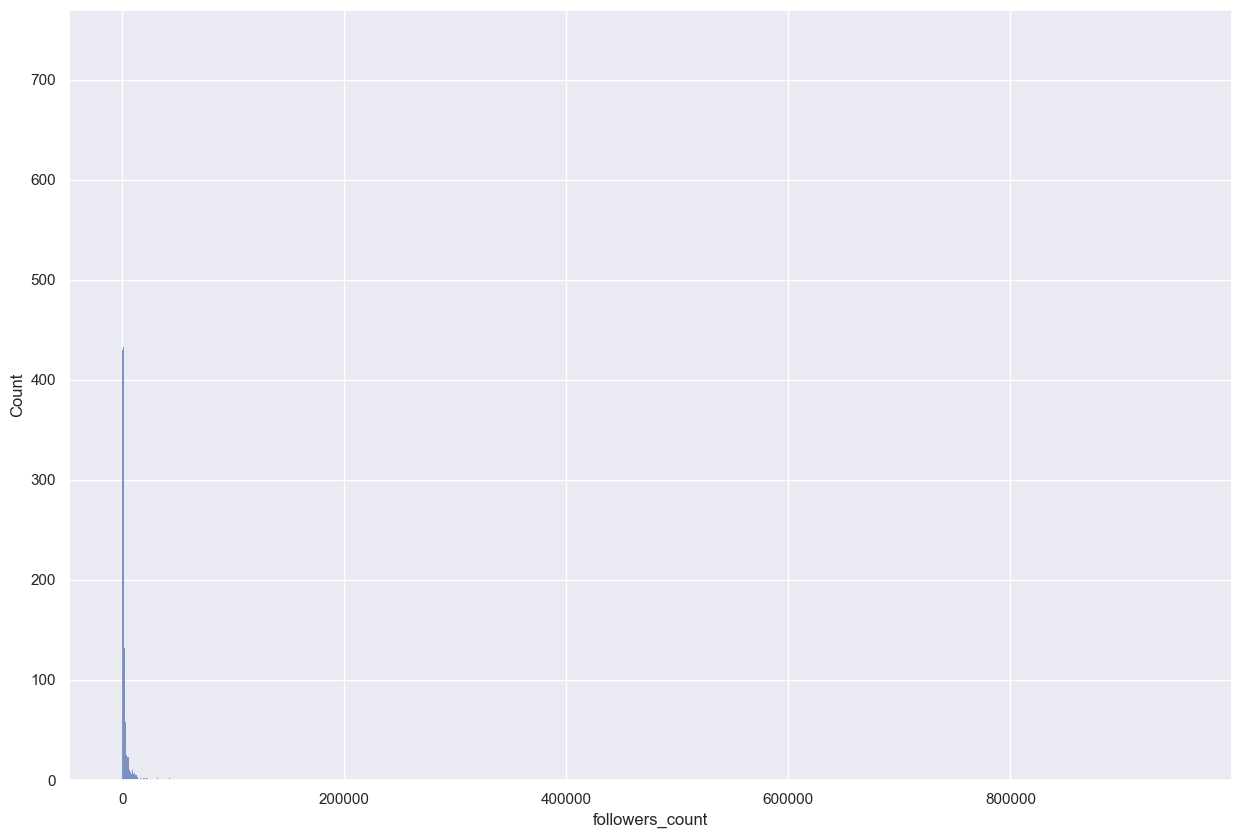

In [391]:
histTotalCount('followers_count')

Most of the data are clustered within 0-100000. We can try to limit our x-axis to 120000.

In [392]:
def histTotalCountLimit(attr_name, x_limit):
    sns.histplot(data=member_df, x=attr_name)
    plt.xlim(1, x_limit)
    plt.show()

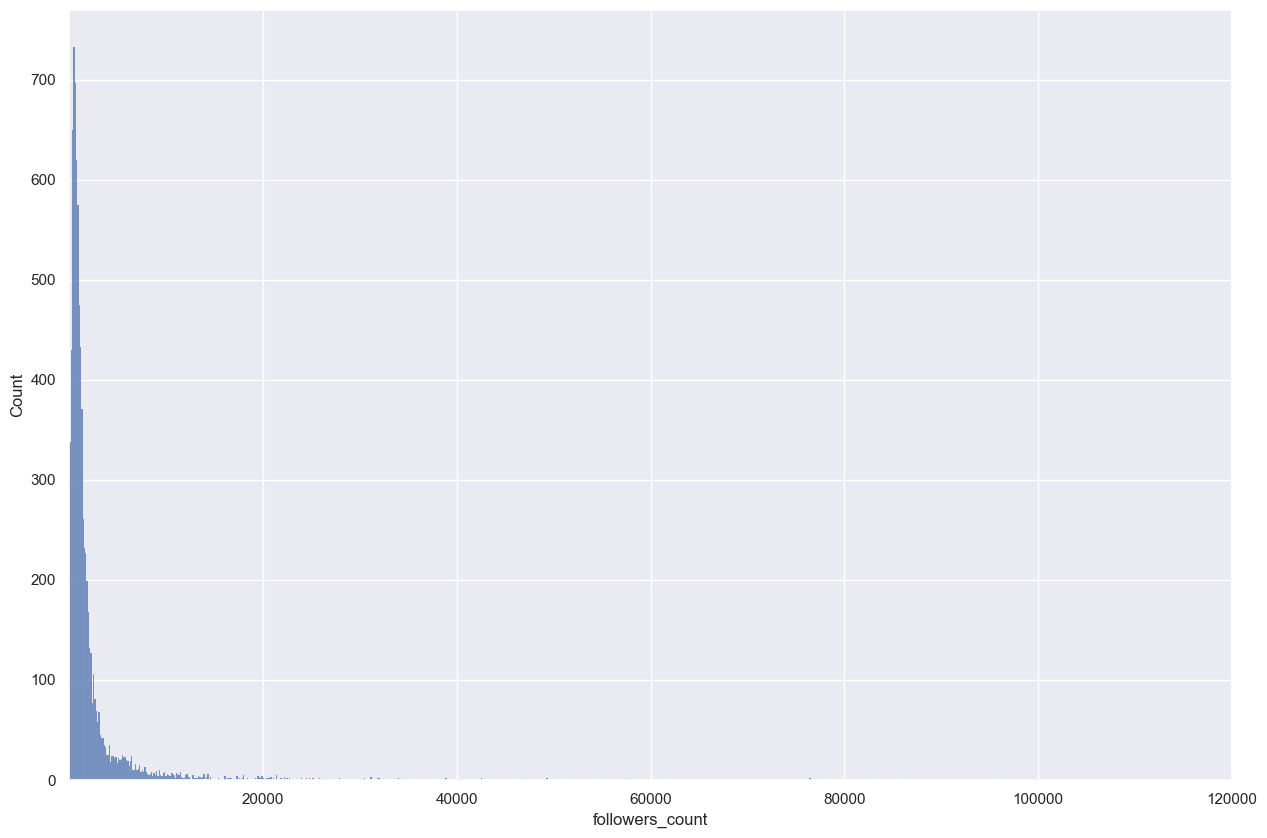

In [393]:
histTotalCountLimit("followers_count", 120000)

The plot is highly right-skewed and most of the data is clustered within 20000. We can limit x-axis to 20000 to see what happens.

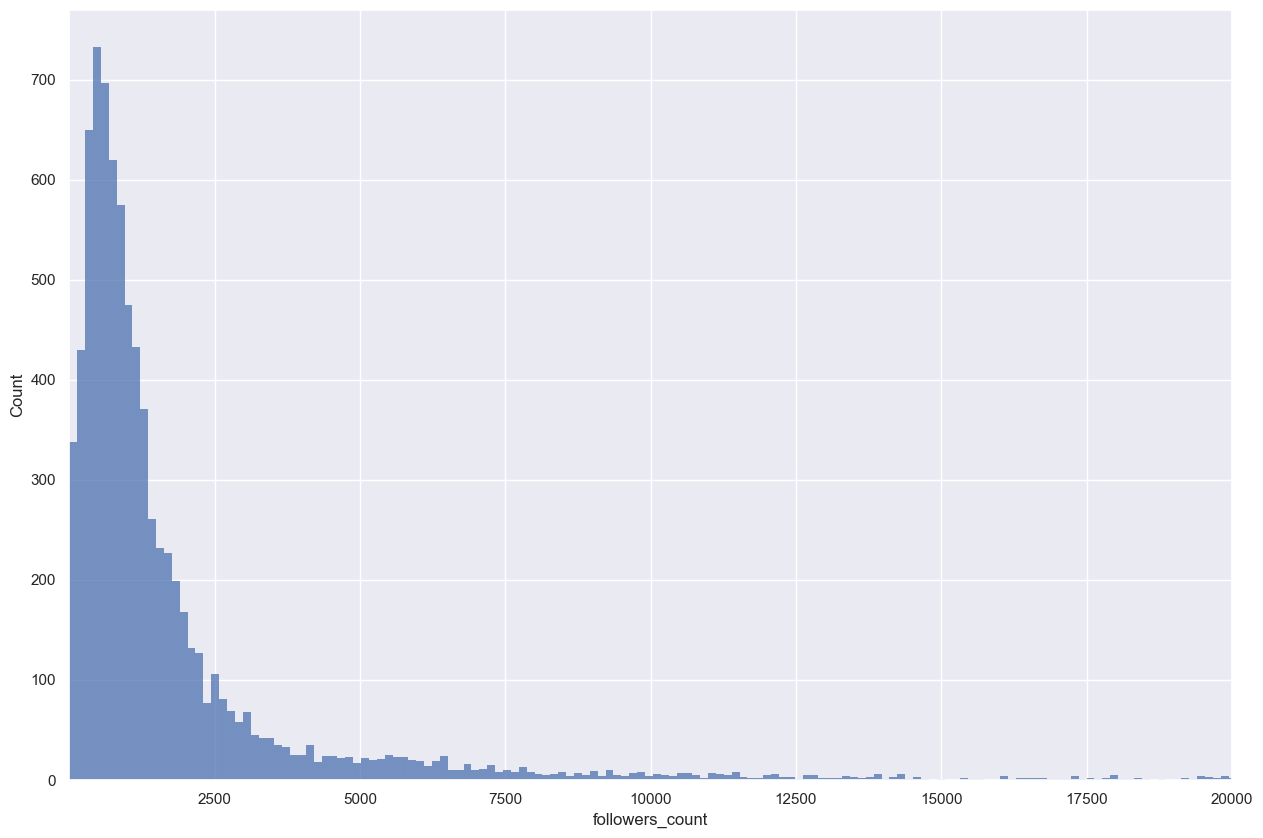

In [394]:
histTotalCountLimit("followers_count", 20000)

We can see from the graph that most of the Twitter users have followers count ranging from 0-2500. 

Next, we want to explore how the data is like when it's being categorized by four types (Analysts, Diplomats, Sentinels, Explorers)

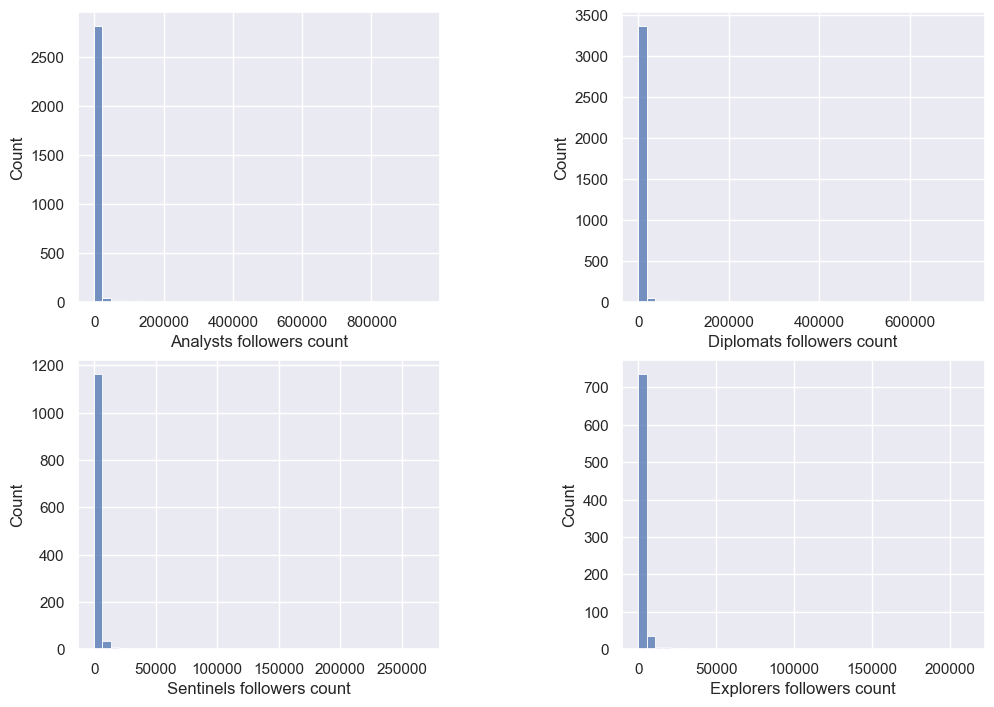

In [395]:
 # when we directly plot histogram of followers data grouped by personality type, we found it is really skewed
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'followers_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts followers count')

sns.histplot(x = 'followers_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats followers count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'followers_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels followers count')

sns.histplot(x = 'followers_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers followers count')
plt.subplots_adjust(wspace=0.5)


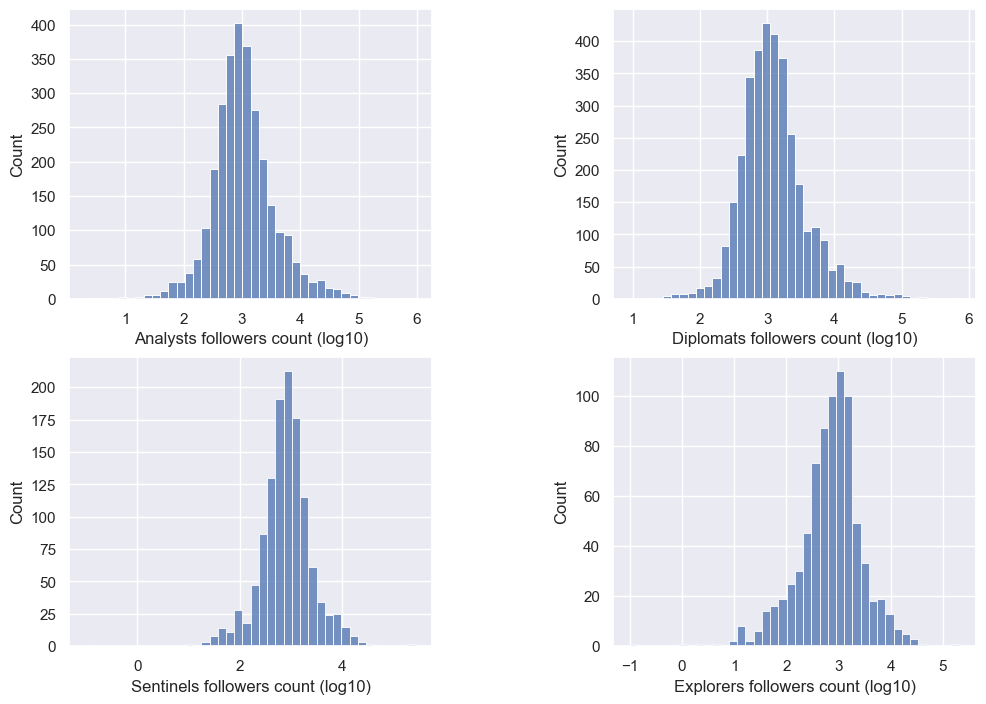

In [396]:
# so we do log operation(with 0.1 as offset) to normalize and better visualize the trend   
log_10_follwers_count = np.log10(member_df['followers_count'] + 0.1)
member_df['log_10_follwers_count'] = log_10_follwers_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_follwers_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts followers count (log10)')

sns.histplot(x = 'log_10_follwers_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats followers count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_follwers_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels followers count (log10)')

sns.histplot(x = 'log_10_follwers_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers followers count (log10)')
plt.subplots_adjust(wspace=0.5)
       

 The initial histogram is not informative enough since the data is highly right-skewed and contains some outliers. After standarizing and plotting the data with log10 conversion, we find several -1 values in Explorers but no extreme outliers anymore in the log10 visualization. 

 From the log10 histogram distribution, we can see that all four types have similar mode at 3 (1000 followers), but Analysts and Diplomats have higher count (>400) clustering at that value.

 Also, since the data is extremely right-skewed, we will use median, instead of mean, for further visualization on user activeness for each group. 

#### Explore followering_count (Twitter Users' total followings)

Again, we want to start with the total population before grouping it by four types.

In [397]:
# describe each 16 personality's following count
member_df.groupby(['mbti_personality','Four_Type']).following_count.describe()

count         mean           std  min     25%   
mbti_personality Four_Type                                                  
enfj             Diplomats  723.0  1250.482711   3296.449194  0.0  432.50  \
enfp             Diplomats  900.0  1484.494444   5275.919271  0.0  481.00   
entj             Analysts   677.0  1145.630724   1844.740464  0.0  340.00   
entp             Analysts   586.0   965.511945   1339.881634  0.0  355.25   
esfj             Sentinels  236.0  1244.648305   6302.677060  0.0  302.00   
esfp             Explorers  202.0   883.980198   1937.252219  0.0  288.75   
estj             Sentinels  221.0  1944.936652  14031.516806  0.0  367.00   
estp             Explorers  147.0   589.156463    595.283456  0.0  188.50   
infj             Diplomats  917.0  2295.725191   9320.132236  7.0  487.00   
infp             Diplomats  899.0  1202.011123   2147.846257  0.0  429.50   
intj             Analysts   905.0  1635.508287   4668.842370  0.0  400.00   
intp             Analysts   712.0  2592.699438  36247.617788  0.0  316.00   
isfj             Sentinels  420.0   743.757143    625.792579  0.0  300.00   
isfp             Explorers  232.0   606.456897    587.377389  0.0  187.00   
istj             Sentinels  342.0   762.426901    870.405500  0.0  255.75   
istp             Explorers  209.0   559.602871    579.998052  0.0  132.00   

                              50%      75%       max  
mbti_personality Four_Type                            
enfj             Diplomats  757.0  1299.00   56879.0  
enfp             Diplomats  830.5  1375.25  131722.0  
entj             Analysts   692.0  1295.00   24397.0  
entp             Analysts   680.5  1145.00   22346.0  
esfj             Sentinels  542.0  1035.75   96022.0  
esfp             Explorers  520.5   988.50   23540.0  
estj             Sentinels  680.0  1256.00  208848.0  
estp             Explorers  392.0   846.50    3494.0  
infj             Diplomats  942.0  1742.00  212479.0  
infp             Diplomats  856.0  1496.50   46761.0  
intj             Analysts   765.0  1466.00   56984.0  
intp             Analysts   669.0  1288.50  958249.0  
isfj             Sentinels  560.0  1009.75    3856.0  
isfp             Explorers  429.0   756.50    2986.0  
istj             Sentinels  530.5   978.75    9161.0  
istp             Explorers  382.0   715.00    2614.0

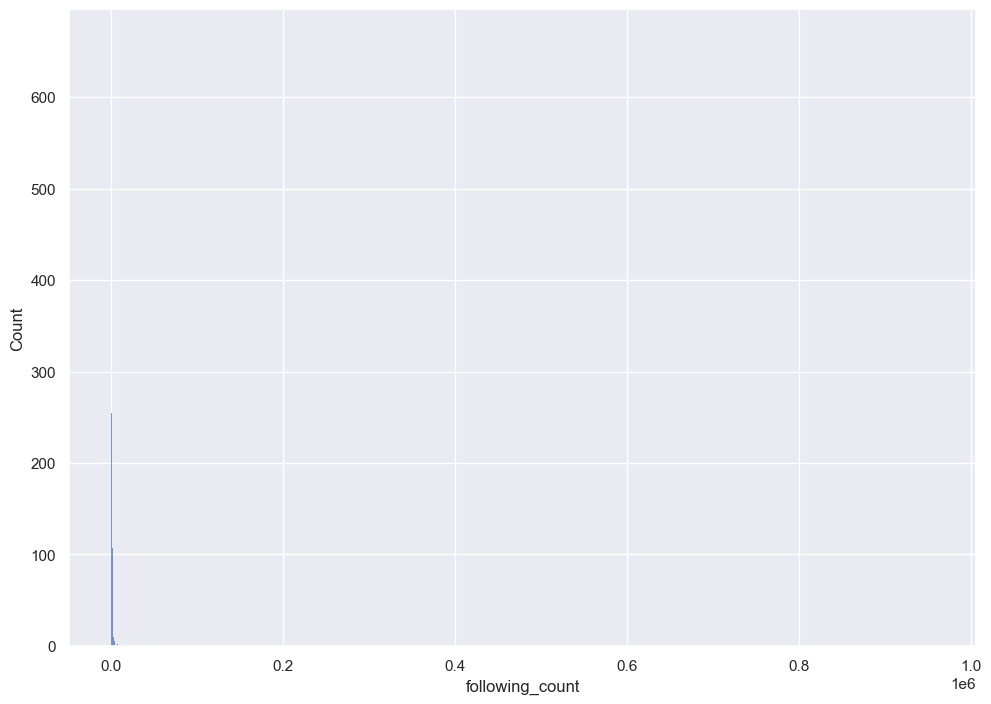

In [398]:
# Plot total followings count
histTotalCount('following_count')

Most of the data is clustered under 0.05e6, it's interesting to see how some people have a really large number of followings. We limit the x-axis to 50000 and see what happens.

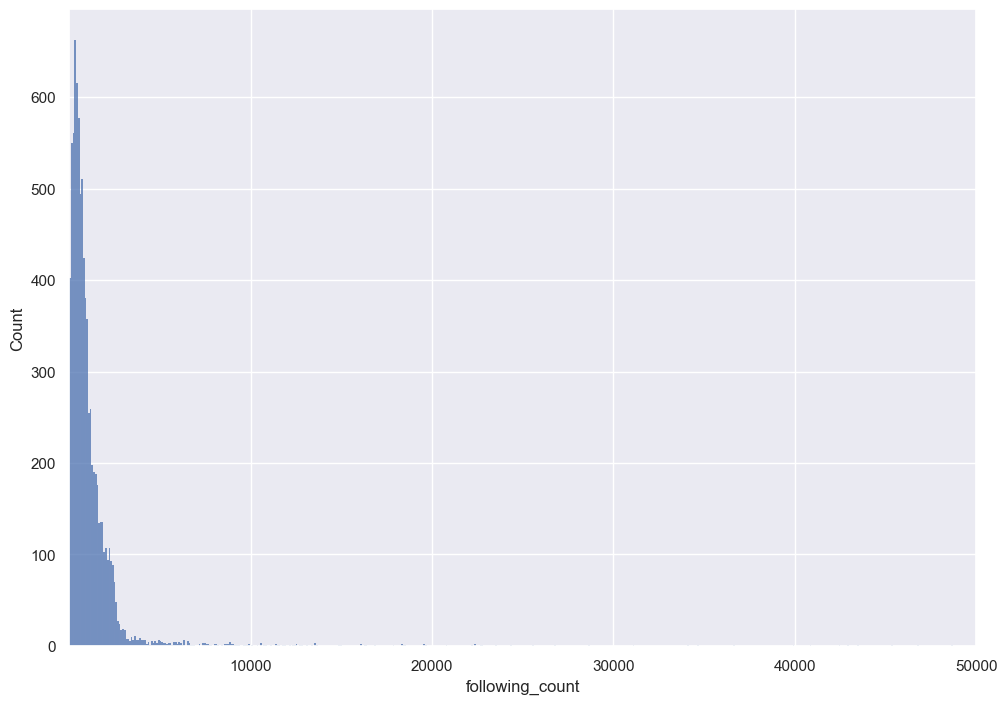

In [399]:
histTotalCountLimit("following_count", 50000)

It gets slightly more clear. Let's limit the x-axis to 10000 since most of the data is ranged between 0-10000.

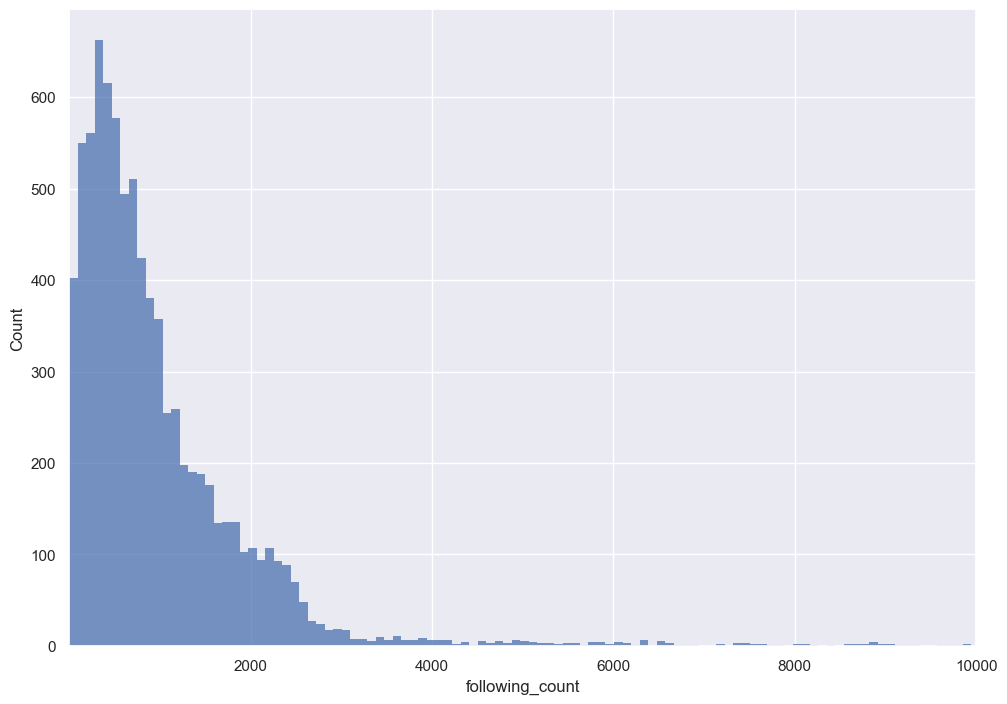

In [400]:
histTotalCountLimit("following_count", 10000)

Now we have a better understanding of the overall distribution of the followings count. Most of the Twitter users have the range from 0-4000 with some outliers that have significantly more followings.

Next, we group users by their four types and see what happens.

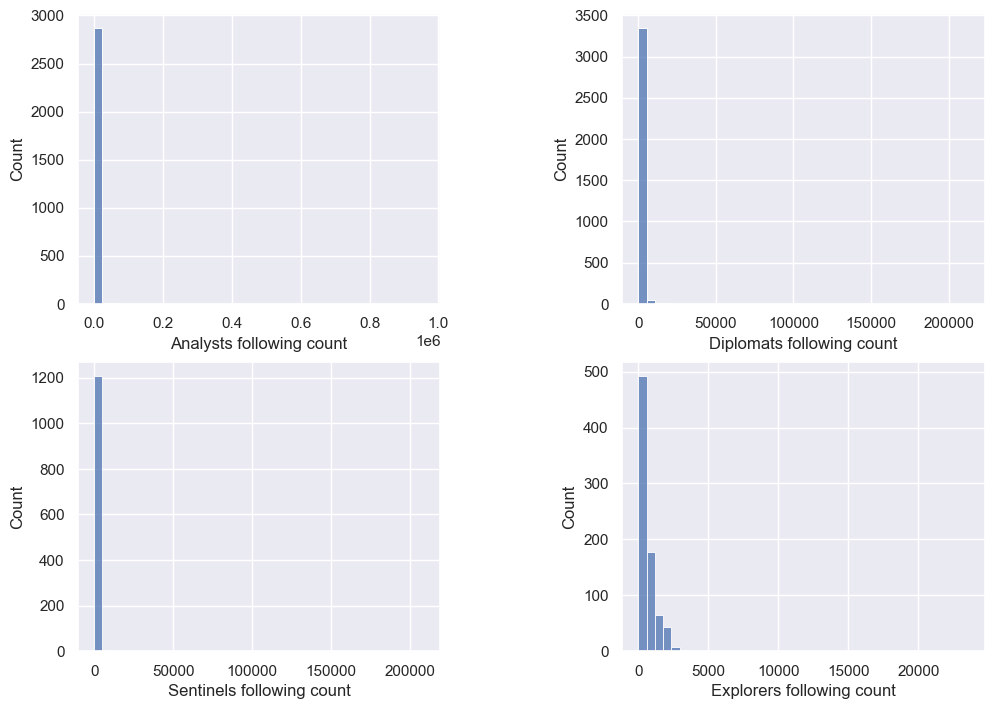

In [401]:
 # when we directly plot histogram of followers data grouped by personality type, we found it is really skewed
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'following_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts following count')

sns.histplot(x = 'following_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats following count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'following_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels following count')

sns.histplot(x = 'following_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers following count')
plt.subplots_adjust(wspace=0.5)


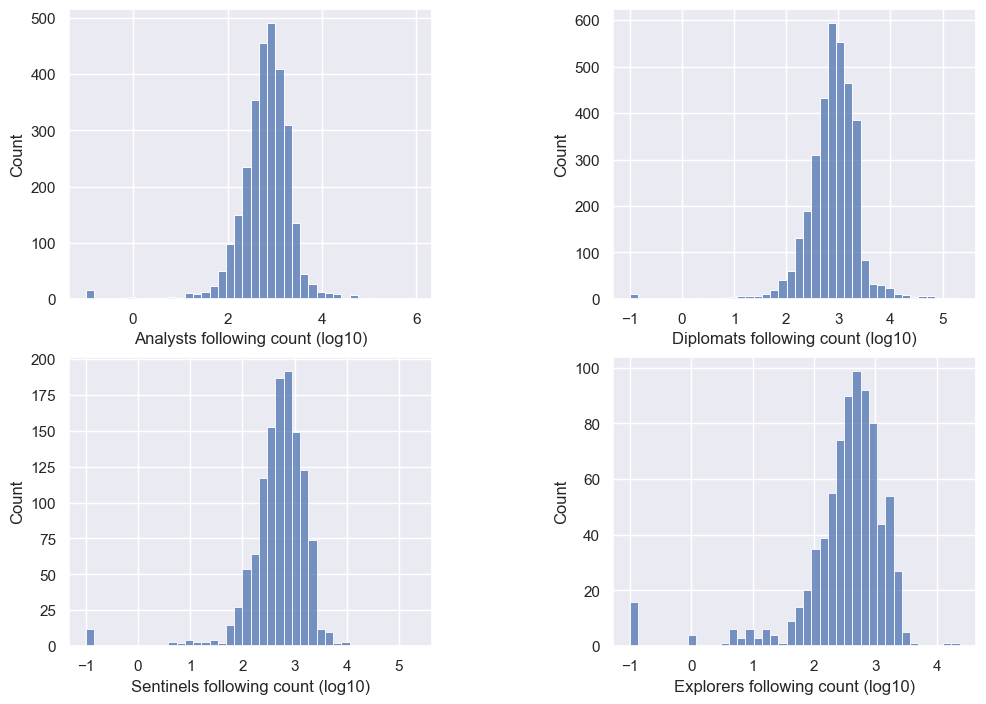

In [402]:
log_10_following_count = np.log10(member_df['following_count'] + 0.1)
member_df['log_10_following_count'] = log_10_following_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_following_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts following count (log10)')

sns.histplot(x = 'log_10_following_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats following count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_following_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels following count (log10)')

sns.histplot(x = 'log_10_following_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers following count (log10)')
plt.subplots_adjust(wspace=0.5)

The log10 distribution of the following count becomes normal after this standarization. The Sentinels and Explorers contain fewer counts(y-axis) in general compared to Analysts and Diplomats, but it can due to different size of the group. For the mode of the distribution, Sentinels and Explorers still have fewer following counts with the overall population distributed more towards left on the x-axis.

#### Explore listed_count (Twitter Users' total listed groups)

We start with the total population and see how the listed counts look like.

In [403]:
# describe 16 personalities' listed count
member_df.groupby(['mbti_personality', 'Four_Type']).listed_count.describe()

count       mean         std  min   25%   50%   
mbti_personality Four_Type                                                  
enfj             Diplomats  723.0  40.178423  110.786511  0.0   6.0  15.0  \
enfp             Diplomats  900.0  47.720000  133.315968  0.0   7.0  19.0   
entj             Analysts   677.0  57.834564  130.472500  0.0   7.0  18.0   
entp             Analysts   586.0  40.837884   96.202294  0.0   6.0  18.0   
esfj             Sentinels  236.0  34.487288  119.063526  0.0   3.0  10.5   
esfp             Explorers  202.0  22.326733   72.831860  0.0   2.0   7.5   
estj             Sentinels  221.0  42.868778  133.469118  0.0   5.0  15.0   
estp             Explorers  147.0  16.231293   23.044646  0.0   2.0   7.0   
infj             Diplomats  917.0  98.702290  328.470133  0.0  15.0  34.0   
infp             Diplomats  899.0  43.290323   95.862520  0.0   9.0  21.0   
intj             Analysts   905.0  94.744751  315.838370  0.0  12.0  26.0   
intp             Analysts   712.0  45.265449   96.240899  0.0   6.0  18.0   
isfj             Sentinels  420.0  22.466667   31.174868  0.0   5.0  12.0   
isfp             Explorers  232.0  24.232759   61.004273  0.0   2.0   8.0   
istj             Sentinels  342.0  31.400585   59.978151  0.0   6.0  14.0   
istp             Explorers  209.0  21.516746   32.543033  0.0   2.0   9.0   

                              75%     max  
mbti_personality Four_Type                 
enfj             Diplomats  37.00  2111.0  
enfp             Diplomats  44.25  3151.0  
entj             Analysts   60.00  1575.0  
entp             Analysts   40.00  1816.0  
esfj             Sentinels  28.25  1580.0  
esfp             Explorers  20.50   980.0  
estj             Sentinels  40.00  1827.0  
estp             Explorers  20.00   149.0  
infj             Diplomats  83.00  5727.0  
infp             Diplomats  43.50  1998.0  
intj             Analysts   62.00  4583.0  
intp             Analysts   42.00   945.0  
isfj             Sentinels  28.00   253.0  
isfp             Explorers  21.00   709.0  
istj             Sentinels  34.00   540.0  
istp             Explorers  26.00   173.0

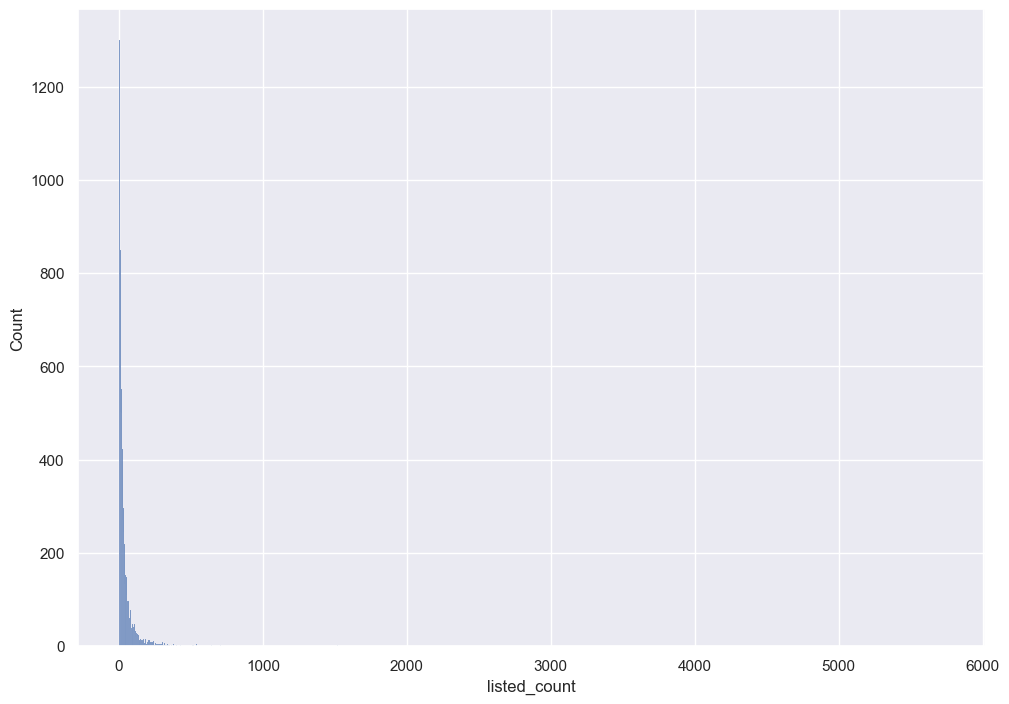

In [404]:
# Plot total listed count
histTotalCount('listed_count')

We see some significantly large number of listed count as expected. Since most of them is clustered between 0-500. Let's limit our x-axis.

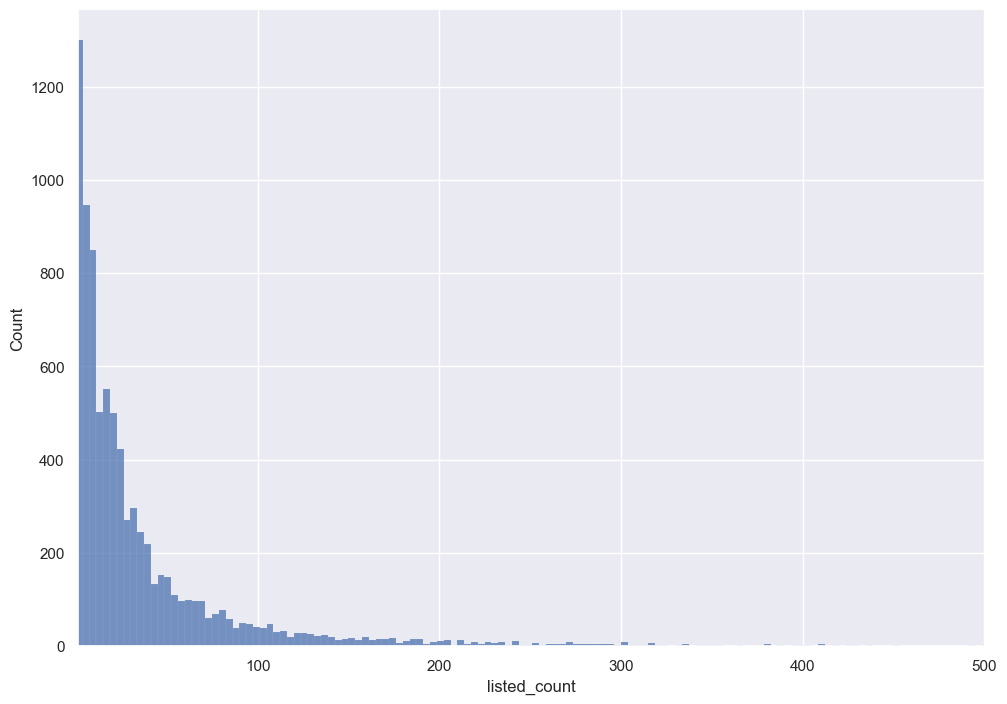

In [405]:
histTotalCountLimit('listed_count',500)

The graph is still highly right-skewed, but we see that most of users have a range from 0 to 200.

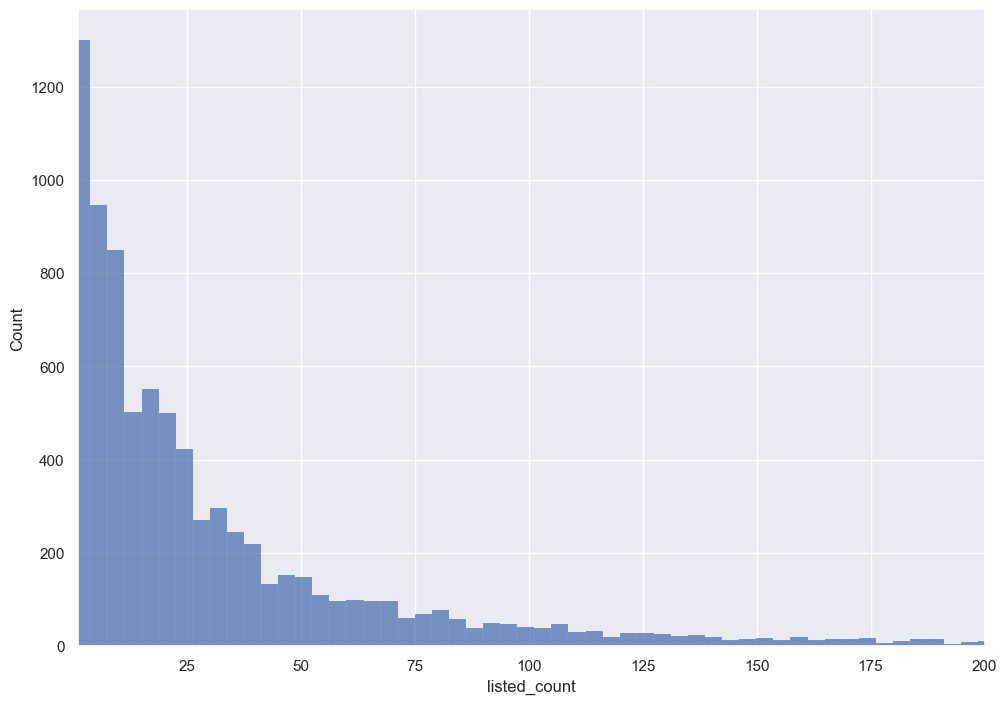

In [406]:
histTotalCountLimit('listed_count',200)

Now we have a better understanding of the listed count for the total population. Most of them has a range of 0-100 with some outliers that have significant numbers of total listed groups.

Let's move on with the counts categorized by four types.

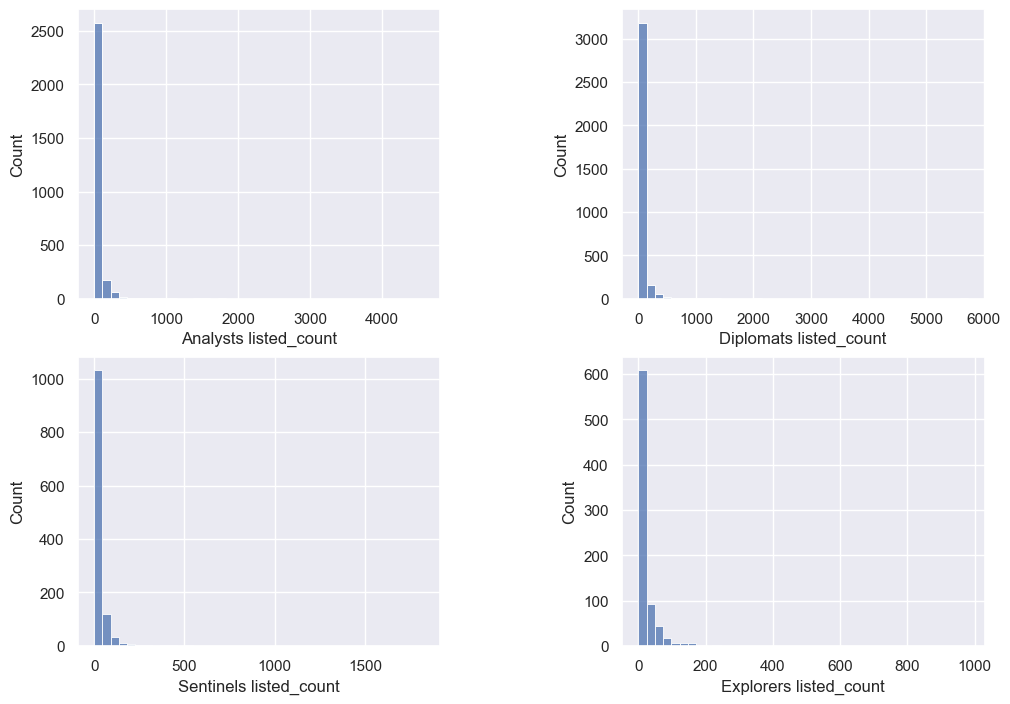

In [407]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'listed_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts listed_count')

sns.histplot(x = 'listed_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats listed_count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'listed_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels listed_count')

sns.histplot(x = 'listed_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers listed_count')
plt.subplots_adjust(wspace=0.5)

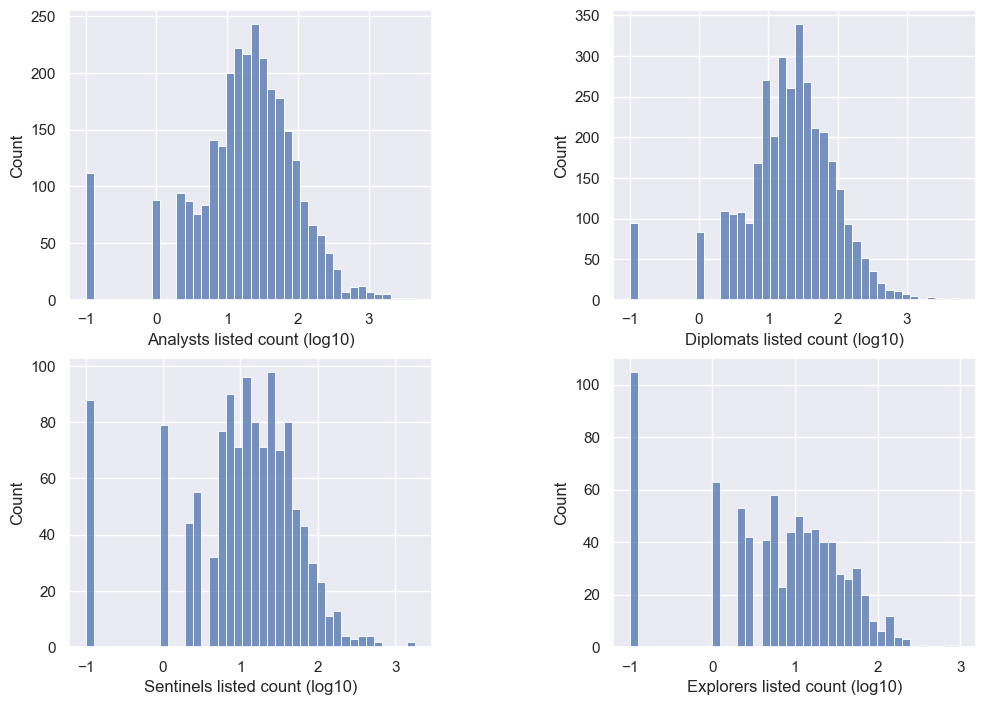

In [408]:
log_10_listed_count = np.log10(member_df['listed_count'] + 0.1)
member_df['log_10_listed_count'] = log_10_listed_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_listed_count', data=member_df[member_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts listed count (log10)')

sns.histplot(x = 'log_10_listed_count', data=member_df[member_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats listed count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_listed_count', data=member_df[member_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels listed count (log10)')

sns.histplot(x = 'log_10_listed_count', data=member_df[member_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers listed count (log10)')
plt.subplots_adjust(wspace=0.5)

The log10 listed count distributions reveal that Explorers have the least listed count in general, especially the count of zero (-1 in log10 when we use 0.1 as the offset) indicates that the most people in this group contains zero listed counts. It's hard to tell from the visualizations to see the differences for the other three personality types.

After exploring each attribute that informs the User Interaction Activeness (followers, followings, and listed), we can explore their relationship with each other.

####TODO: scatter matrix

#### Section II: Tweeting Activeness (liked_count, total_tweets_count, total_hashtag_count)
#### Explore liked_count (The number of tweets liked by the Twitter user)

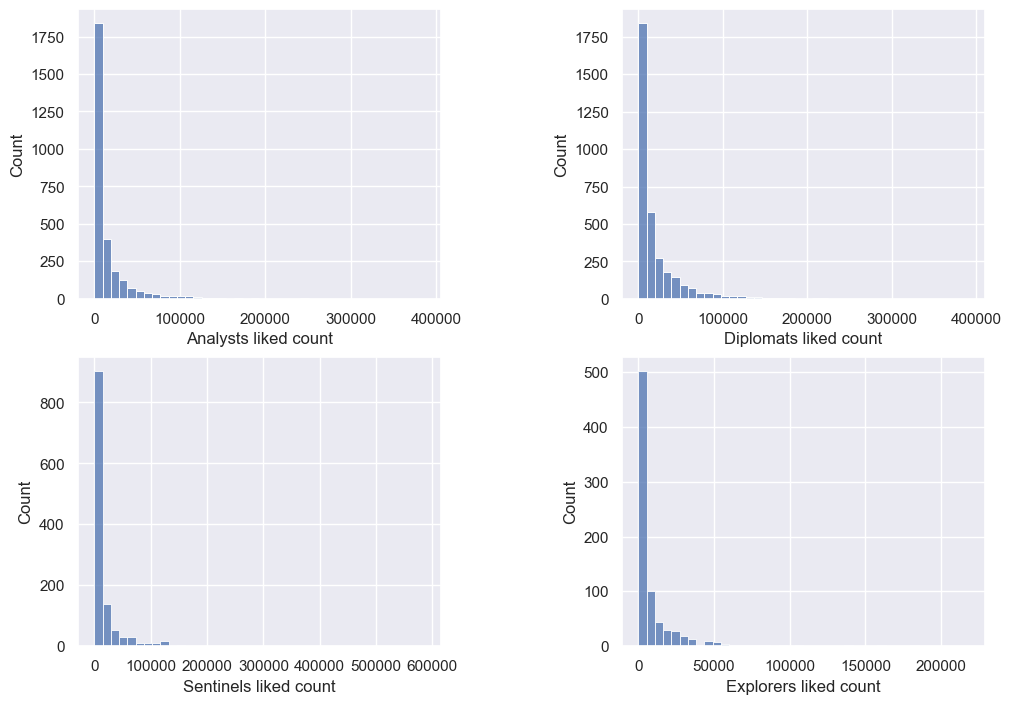

In [409]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'liked_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts liked count')

sns.histplot(x = 'liked_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats liked count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'liked_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels liked count')

sns.histplot(x = 'liked_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers liked count')
plt.subplots_adjust(wspace=0.5)

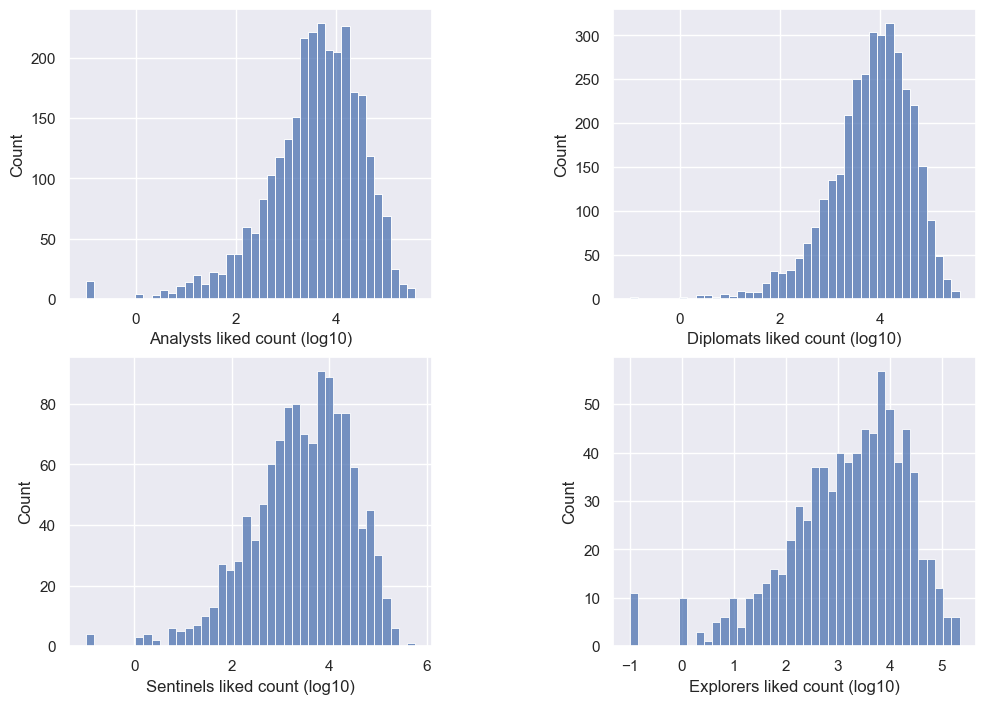

In [410]:
log_10_liked_count = np.log10(tweet_df['liked_count'] + 0.1)
tweet_df['log_10_liked_count'] = log_10_liked_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_liked_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts liked count (log10)')

sns.histplot(x = 'log_10_liked_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats liked count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_liked_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels liked count (log10)')

sns.histplot(x = 'log_10_liked_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers liked count (log10)')
plt.subplots_adjust(wspace=0.5)

#### Explore total_tweets_count (The number of tweets posted by the Twitter user)

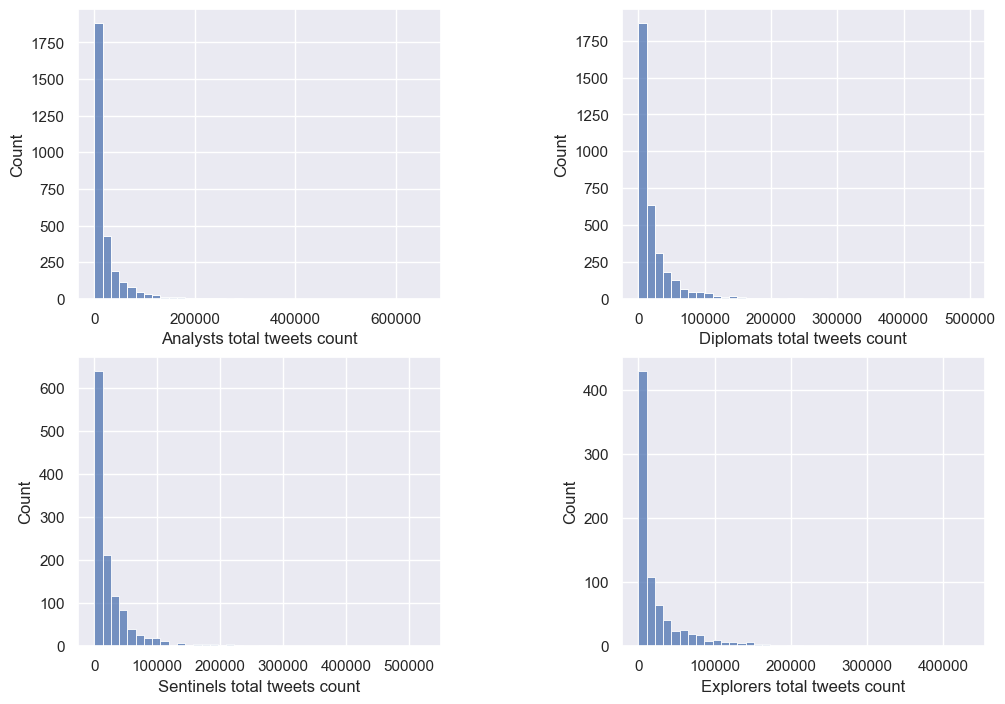

In [411]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts total tweets count')

sns.histplot(x = 'total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats total tweets count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels total tweets count')

sns.histplot(x = 'total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers total tweets count')
plt.subplots_adjust(wspace=0.5)

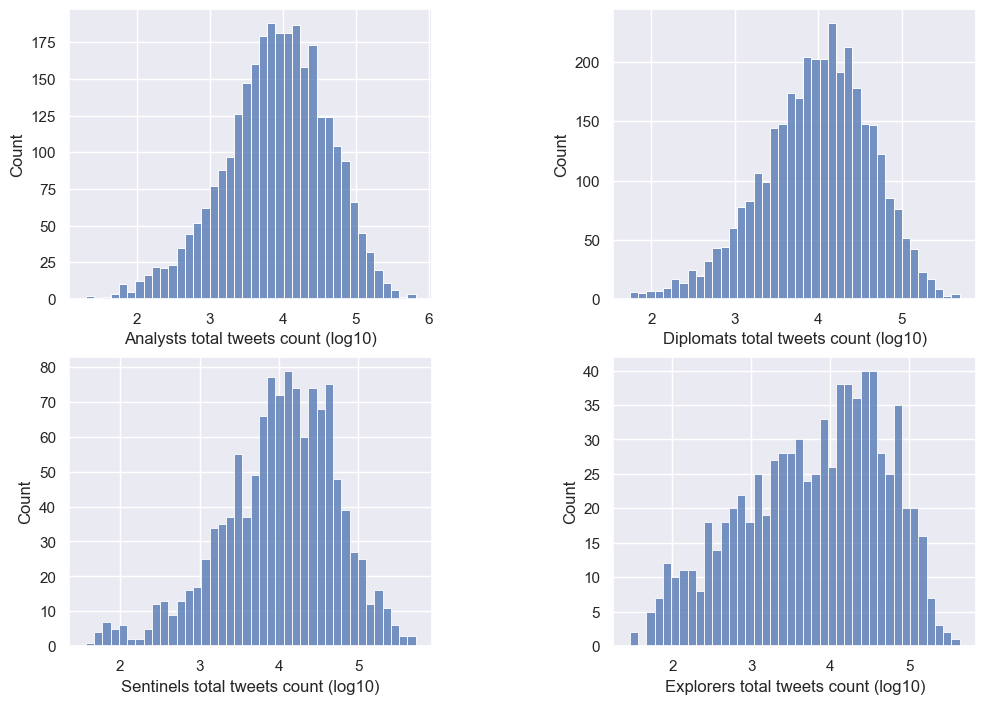

In [412]:
log_10_total_tweets_count = np.log10(tweet_df['total_tweets_count'] + 0.1)
tweet_df['log_10_total_tweets_count'] = log_10_total_tweets_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts total tweets count (log10)')

sns.histplot(x = 'log_10_total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats total tweets count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels total tweets count (log10)')

sns.histplot(x = 'log_10_total_tweets_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers total tweets count (log10)')
plt.subplots_adjust(wspace=0.5)

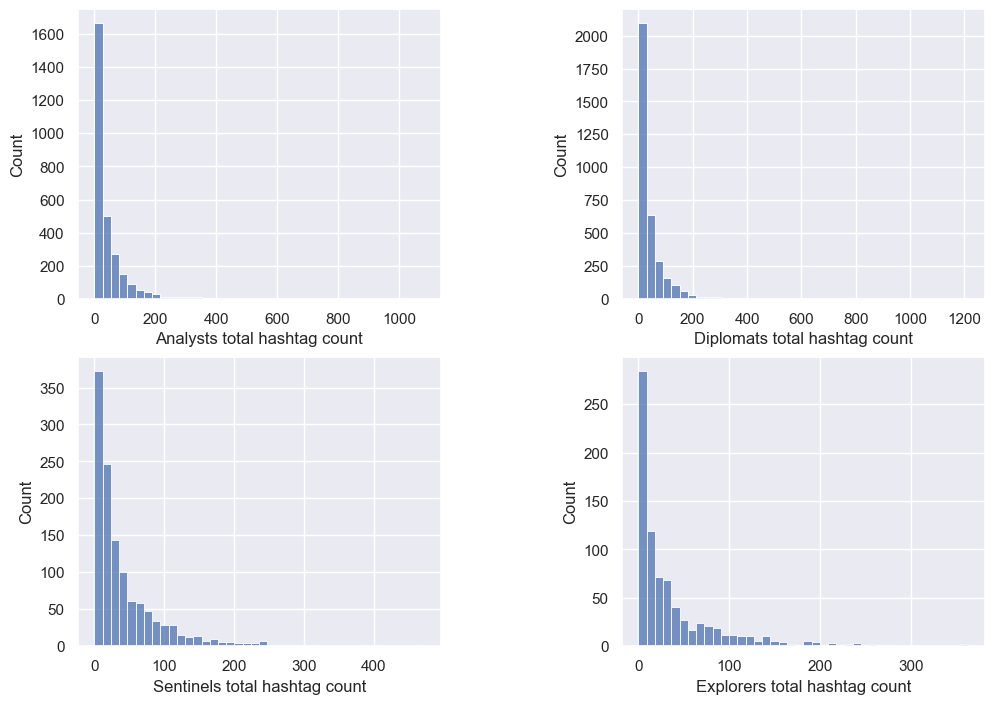

In [413]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, axes = plt.subplots(2, 2)
sns.histplot(x = 'total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts total hashtag count')

sns.histplot(x = 'total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats total hashtag count')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels total hashtag count')

sns.histplot(x = 'total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers total hashtag count')
plt.subplots_adjust(wspace=0.5)

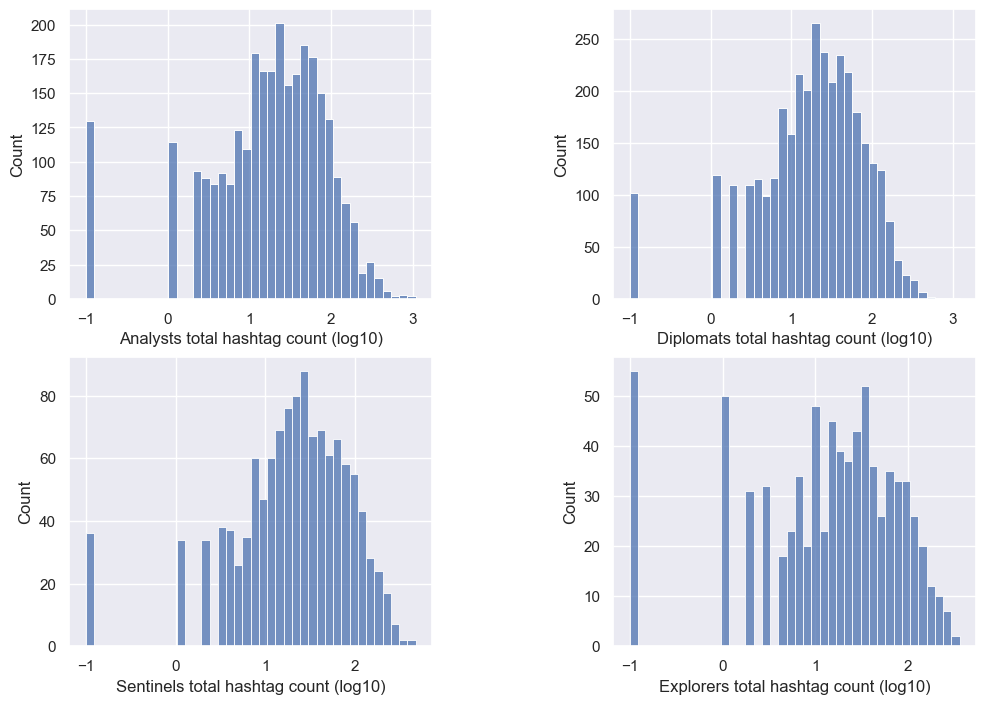

In [414]:
log_10_total_hashtag_count = np.log10(tweet_df['total_hashtag_count'] + 0.1)
tweet_df['log_10_total_hashtag_count'] = log_10_total_hashtag_count  

f, axes = plt.subplots(2, 2)
sns.histplot(x = 'log_10_total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Analysts'], bins=40, ax=axes[0][0]) 
axes[0][0].set(xlabel='Analysts total hashtag count (log10)')

sns.histplot(x = 'log_10_total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Diplomats'], bins=40, ax=axes[0][1])
axes[0][1].set(xlabel='Diplomats total hashtag count (log10)')
plt.subplots_adjust(wspace=0.5)

sns.histplot(x = 'log_10_total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Sentinels'], bins=40, ax=axes[1][0]) 
axes[1][0].set(xlabel='Sentinels total hashtag count (log10)')

sns.histplot(x = 'log_10_total_hashtag_count', data=tweet_df[tweet_df['Four_Type']=='Explorers'], bins=40, ax=axes[1][1])  
axes[1][1].set(xlabel='Explorers total hashtag count (log10)')
plt.subplots_adjust(wspace=0.5)

After seeing the overall data distribution, we further visualize outliers and distribution of attributes of each type more clearly by creating side-by-side boxplot for each attribute.

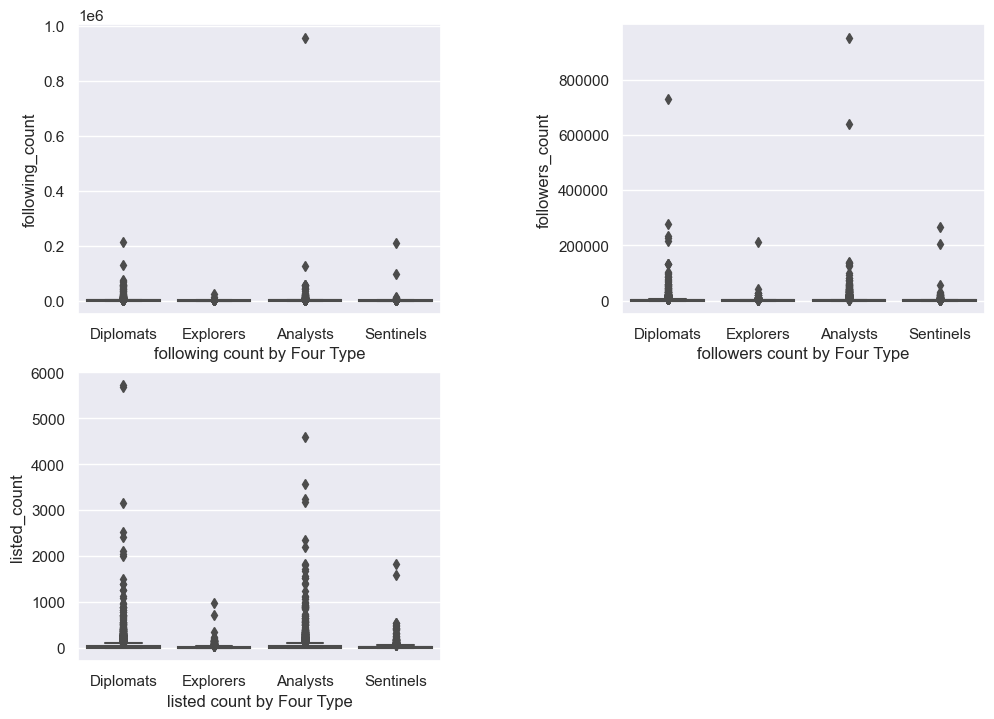

In [415]:
#(liked_count, total_tweets_count, total_hashtag_count)
# following follower, listed 
f, axes = plt.subplots(2, 2)
sns.boxplot(y='following_count', x='Four_Type', data=member_df, ax=axes[0][0])
axes[0][0].set(xlabel='following count by Four Type')
plt.subplots_adjust(wspace=0.5)

sns.boxplot(y='followers_count', x='Four_Type', data=member_df, ax=axes[0][1])
axes[0][1].set(xlabel='followers count by Four Type')

sns.boxplot(y='listed_count', x='Four_Type', data=member_df, ax=axes[1][0])
axes[1][0].set(xlabel='listed count by Four Type')

f.delaxes(axes[1][1])


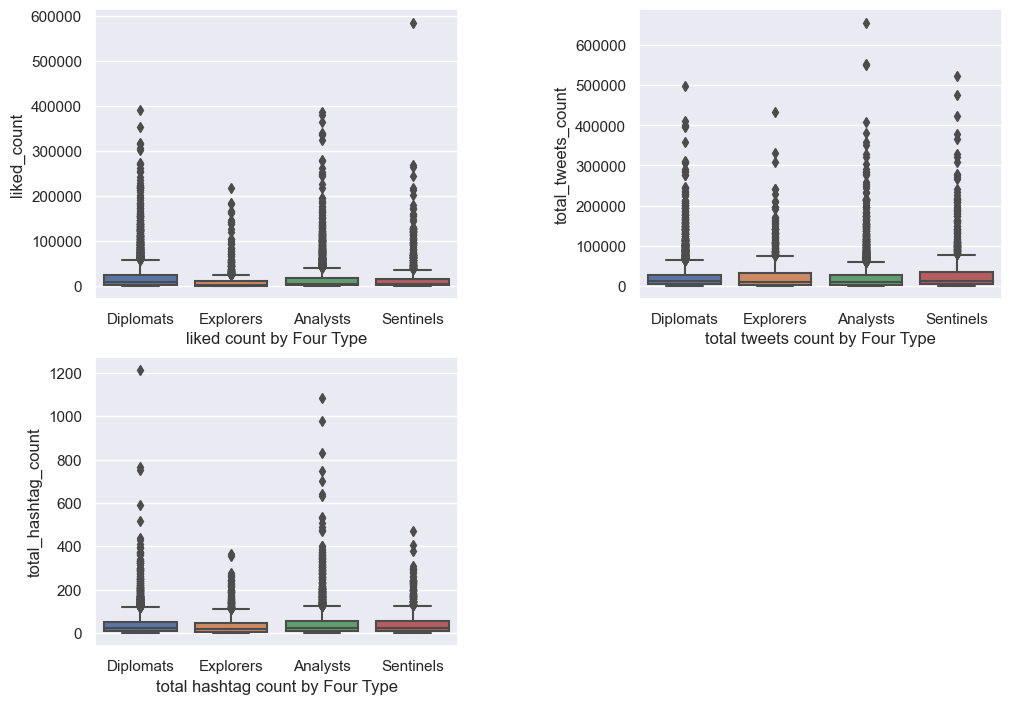

In [416]:
#(liked_count, total_tweets_count, total_hashtag_count)
#plt.figure(figsize=(8, 7))
f, axes = plt.subplots(2, 2)
sns.boxplot(y='liked_count', x='Four_Type', data=tweet_df, ax=axes[0][0])
axes[0][0].set(xlabel='liked count by Four Type')
plt.subplots_adjust(wspace=0.5)

sns.boxplot(y='total_tweets_count', x='Four_Type', data=tweet_df, ax=axes[0][1])
axes[0][1].set(xlabel='total tweets count by Four Type')

sns.boxplot(y='total_hashtag_count', x='Four_Type', data=tweet_df, ax=axes[1][0])
axes[1][0].set(xlabel='total hashtag count by Four Type')
f.delaxes(axes[1][1])

Then, we'd like to remove outliers for more efficienct data analysis. To do so, we use IQR to extract the middle portion of the data.

In [417]:
def remove_outliers_for_df(df, col_name):
    q1 = np.percentile(df[col_name], 25)
    q3 = np.percentile(df[col_name], 75)
    IQR = q3-q1
    upper = q3+1.5*IQR
    lower = q3-1.5*IQR
    return df[(df[col_name]>=lower)&(df[col_name]<=upper)]

In [418]:
member_df = remove_outliers_for_df(member_df, "following_count")
member_df = remove_outliers_for_df(member_df, "followers_count")
member_df = remove_outliers_for_df(member_df, "listed_count")

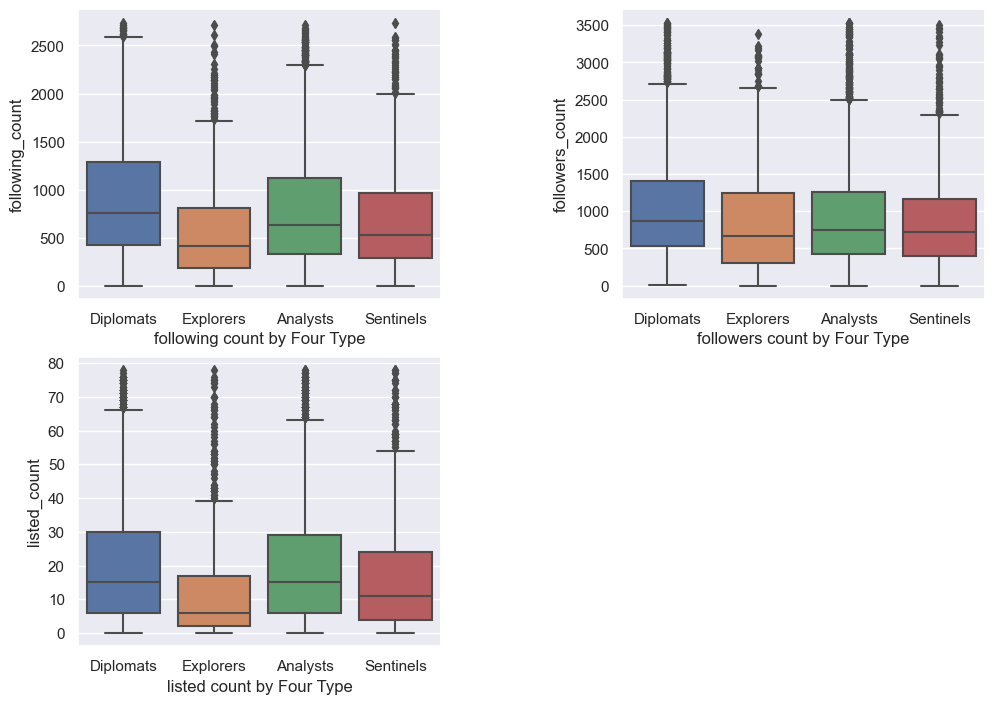

In [419]:
#(liked_count, total_tweets_count, total_hashtag_count)
# following follower, listed 
f, axes = plt.subplots(2, 2)
sns.boxplot(y='following_count', x='Four_Type', data=member_df, ax=axes[0][0])
axes[0][0].set(xlabel='following count by Four Type')
plt.subplots_adjust(wspace=0.5)

sns.boxplot(y='followers_count', x='Four_Type', data=member_df, ax=axes[0][1])
axes[0][1].set(xlabel='followers count by Four Type')

sns.boxplot(y='listed_count', x='Four_Type', data=member_df, ax=axes[1][0])
axes[1][0].set(xlabel='listed count by Four Type')

f.delaxes(axes[1][1])

After this, Diplomats seem to have the most followers, following, and listed groups, while Explorers have the least counts in each attribute.

In [420]:
tweet_df = remove_outliers_for_df(tweet_df, "liked_count")
tweet_df = remove_outliers_for_df(tweet_df, "total_tweets_count")
tweet_df = remove_outliers_for_df(tweet_df, "total_hashtag_count")

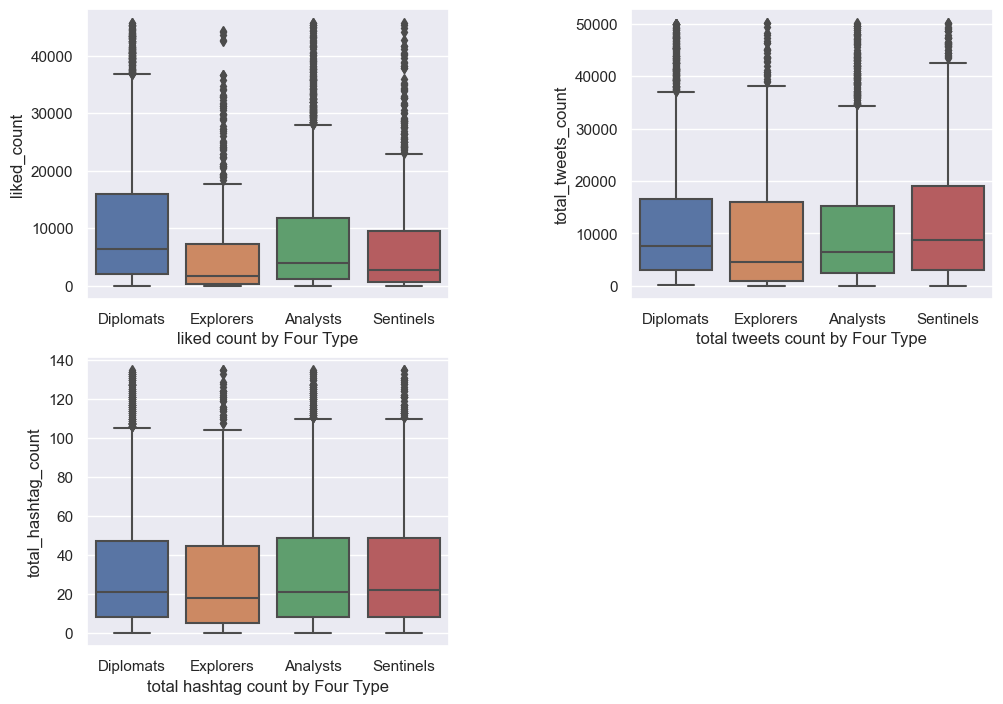

In [421]:
f, axes = plt.subplots(2, 2)
sns.boxplot(y='liked_count', x='Four_Type', data=tweet_df, ax=axes[0][0])
axes[0][0].set(xlabel='liked count by Four Type')
plt.subplots_adjust(wspace=0.5)

sns.boxplot(y='total_tweets_count', x='Four_Type', data=tweet_df, ax=axes[0][1])
axes[0][1].set(xlabel='total tweets count by Four Type')

sns.boxplot(y='total_hashtag_count', x='Four_Type', data=tweet_df, ax=axes[1][0])
axes[1][0].set(xlabel='total hashtag count by Four Type')
f.delaxes(axes[1][1])

After this, Diplomats group still has the most liked count, but Sentinels has the most total tweets in general, and there's no obvious differences among total hashtag count distributions.

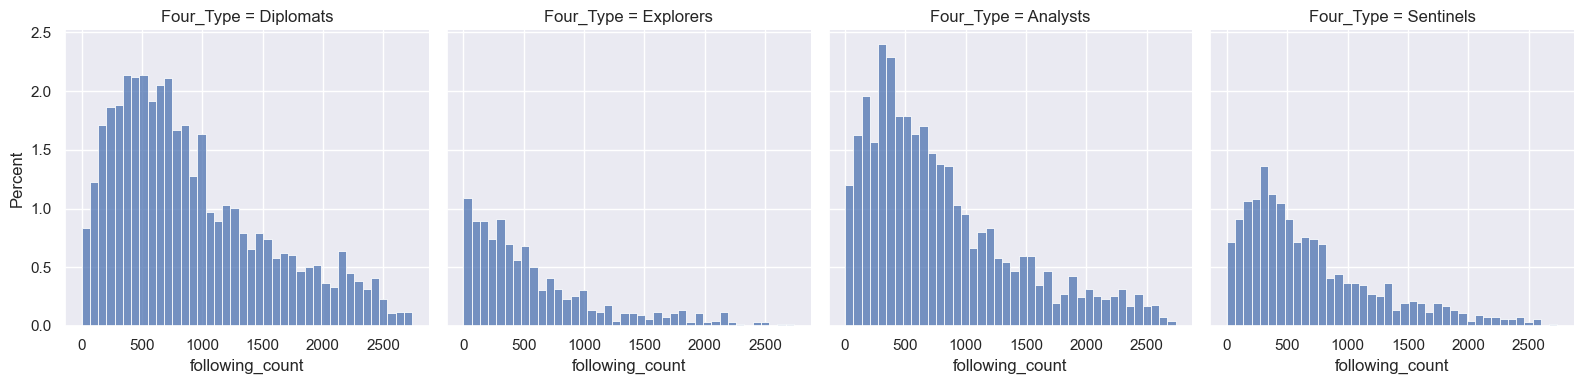

In [422]:
#(liked_count, total_tweets_count, total_hashtag_count)
# following follower, listed 
sns.displot(data=member_df, col='Four_Type', x='following_count', height=4, bins=40, stat="percent")

In addition to the boxplot, by plotting distribution of proportion of following count for all four type, we find that Diplomats and analyst have higher proportion of people with following counts from 500 to 1000, while explorers and sentinels have more proportion of people with following counts from 0 to 500. 

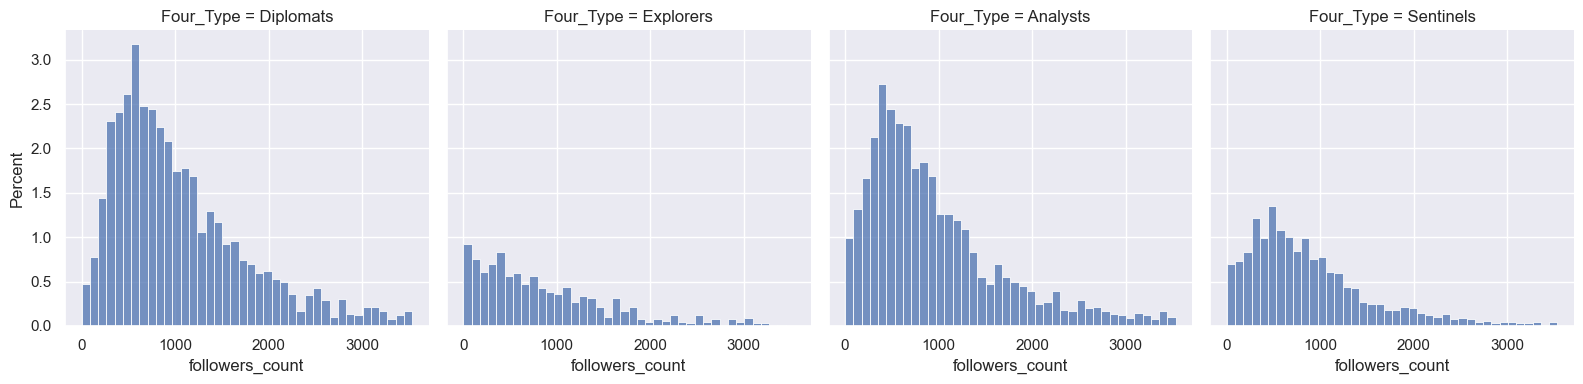

In [423]:
sns.displot(data=member_df, col='Four_Type', x='followers_count', height=4, bins=40, stat="percent")

Similar trend is observed in followers_count: Diplomats, Analyst, and Sentinels have higher proportion of people with following counts from 500 to 700, while Explorers have more proportion of people with following counts from 0 to 300. 

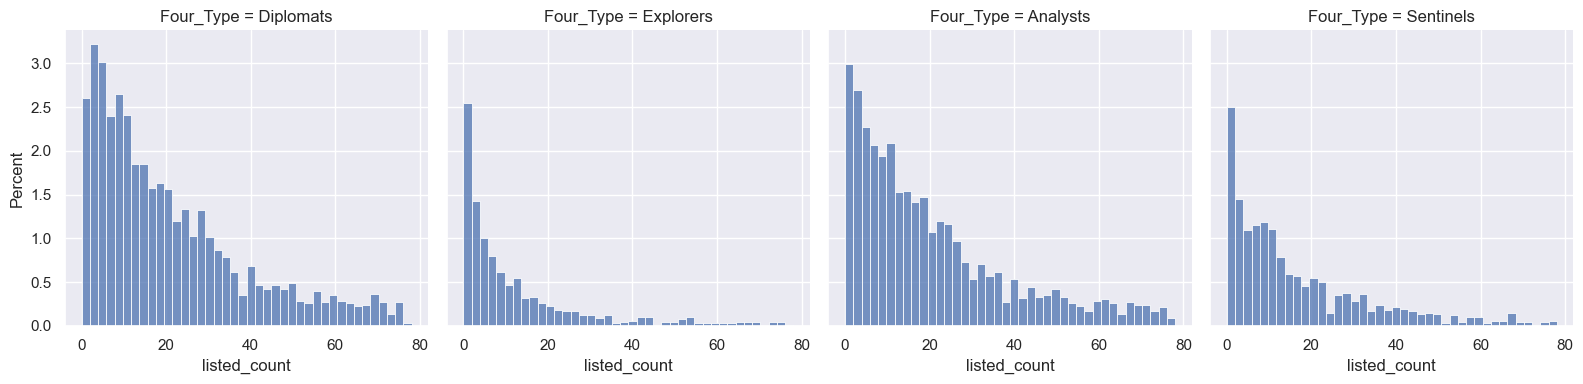

In [424]:
sns.displot(data=member_df, col='Four_Type', x='listed_count', height=4, bins=40, stat="percent")

For listed counts, Diplomats, Analyst, Explorers and Sentinels have similar peaks for proportion. Most proportion of their people have 0 to 10 listed_counts. 

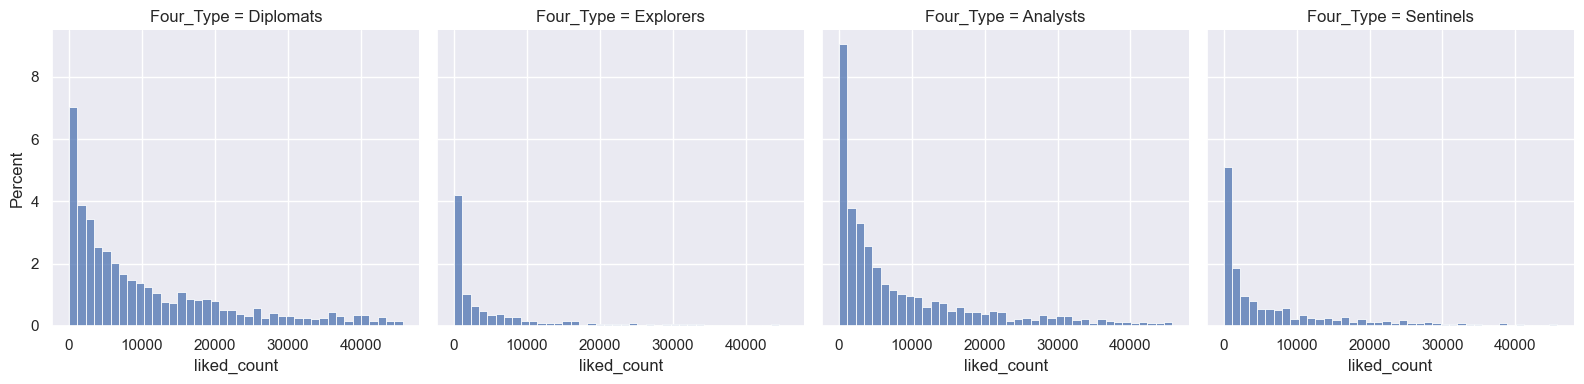

In [425]:
#(liked_count, total_tweets_count, total_hashtag_count)
sns.displot(data=tweet_df, col='Four_Type', x='liked_count', height=4, bins=40, stat="percent")

For liked_counts, we find that Diplomats and Analyst have higher proportions of people with liked_count around 0 - 500 than Explorers and Sentinels. Still, Diplomats and Analyst have higher proportions of people with liked_count around 10000 or higher than Explorers and Sentinels. 

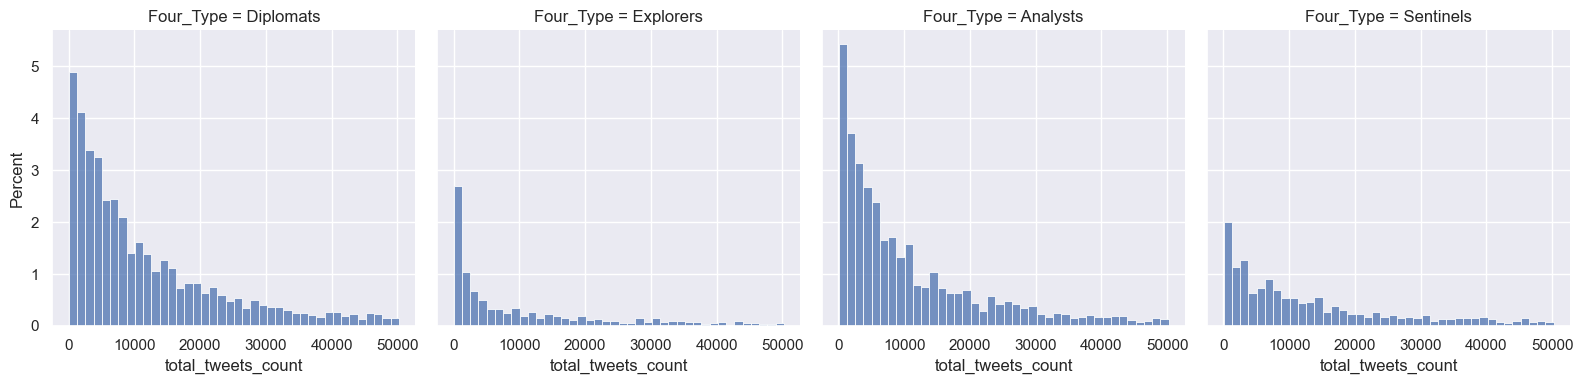

In [426]:
#(liked_count, total_tweets_count, total_hashtag_count)
sns.displot(data=tweet_df, col='Four_Type', x='total_tweets_count', height=4, bins=40, stat="percent")

Similarly for total_tweets_count, we find that Diplomats and Analyst have higher proportions of people with total_tweets_count around 0 - 100000 than Explorers and Sentinels. However, more proportions of people with total_tweets_count around 10000 or higher is seen in  Diplomats and Analyst than Explorers and Sentinels

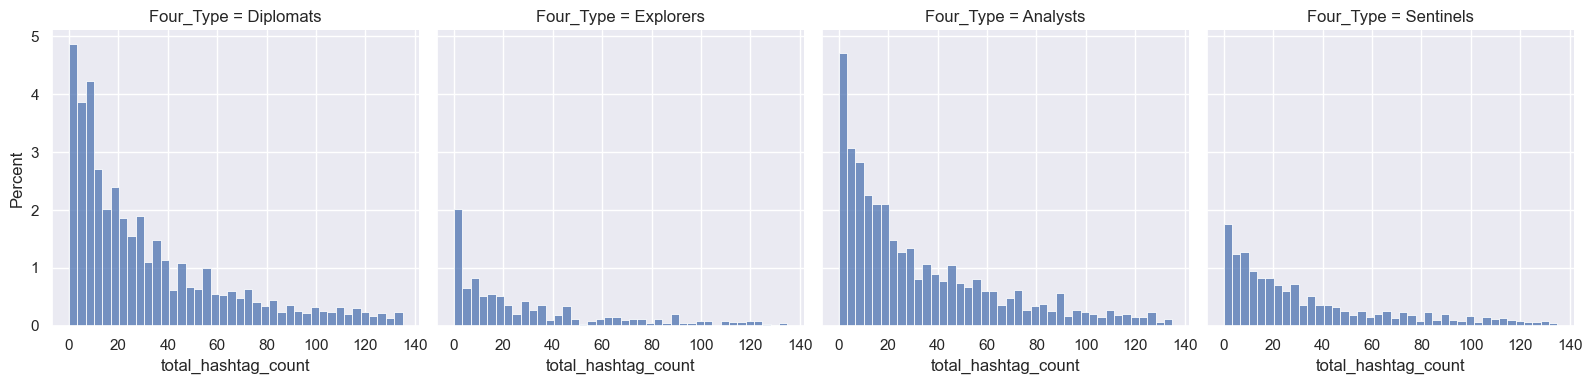

In [427]:
sns.displot(data=tweet_df, col='Four_Type', x='total_hashtag_count', height=4, bins=40, stat="percent")

Same for total_hashtag_count, we find that Diplomats and Analyst have higher proportions of people with total_tweets_count around 0 - 100000 than Explorers and Sentinels. 

We then explored some possibilities of calculating social media activeness.
We got data from each user and then group it into four types, then we measure the medium of each type since all the distribution is largely right skewed (the mean is far greater than the medium). We chose the medium (50%) as each group's measurement since it won't be affected much by the outliers.

For tweeting activeness, we gave each data different weights because we regard users being more "active and engaged" if they post their own tweets and share thoughts rather than just collecting and favoriting others' tweets. Hashtag also indicates how likely the users are involved with some trending topics, but still that is not as "engaged" as posting tweets voluntarily.

In [428]:
# Calculate tweeting activeness & engagement (by Four Types)
def getTweetActiveness(liked, tweets, hashtag):
    return liked*0.25 + tweets*0.5 + hashtag*0.25

<Axes: ylabel='mbti_personality'>

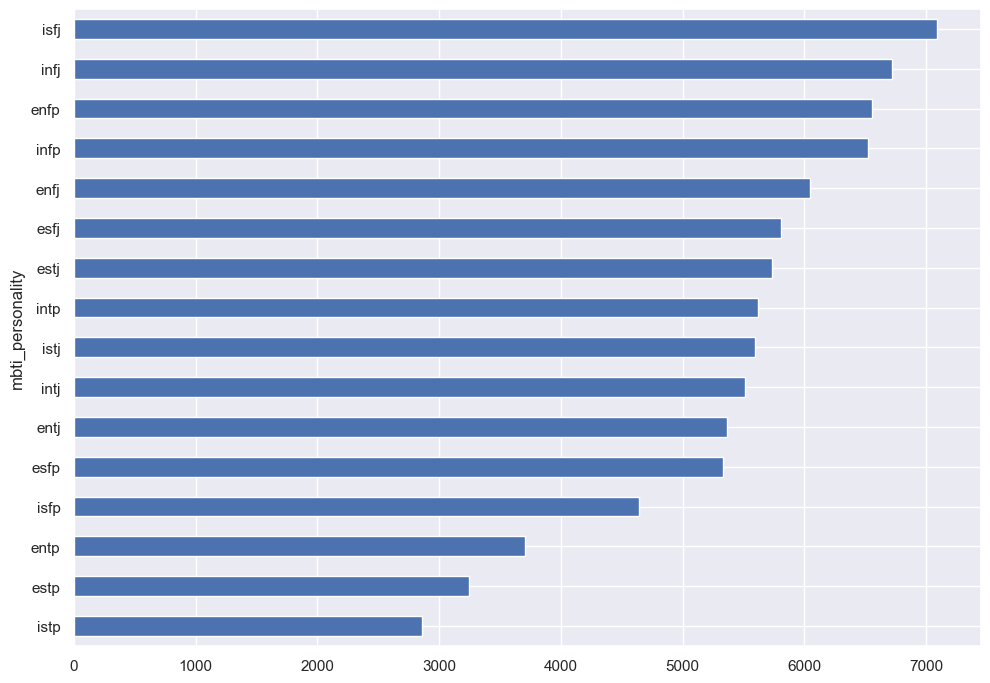

In [429]:
# Tweeting Activeness Overall Distribution (medium)
tweet_df['TweetingActiveness'] = tweet_df['liked_count']*0.25+tweet_df['total_tweets_count']*0.5+tweet_df['total_hashtag_count']*0.25
tweet_df.groupby('mbti_personality').describe()['TweetingActiveness']['50%'].sort_values().plot(kind = 'barh')

We then divide it into four personality types and continue our exploration.

In [430]:
tweets_medium_four = tweet_df.groupby('Four_Type').total_tweets_count.describe()['50%']
liked_medium_four = tweet_df.groupby('Four_Type').liked_count.describe()['50%']
collected_medium_four = tweet_df.groupby('Four_Type').total_hashtag_count.describe()['50%']

In [431]:
print(tweets_medium_four, liked_medium_four, collected_medium_four)

Four_Type
Analysts     6422.0
Diplomats    7536.5
Explorers    4613.5
Sentinels    8762.0
Name: 50%, dtype: float64 Four_Type
Analysts     4020.0
Diplomats    6350.0
Explorers    1660.0
Sentinels    2671.0
Name: 50%, dtype: float64 Four_Type
Analysts     21.0
Diplomats    21.0
Explorers    18.0
Sentinels    22.0
Name: 50%, dtype: float64


In [432]:
Analysts_tw_activeness = getTweetActiveness(liked_medium_four[0], tweets_medium_four[0], collected_medium_four[0])
print('Analysts: Tweeting Behavior Activeness is ', Analysts_tw_activeness)
Diplomats_tw_activeness = getTweetActiveness(liked_medium_four[1], tweets_medium_four[1], collected_medium_four[1])
print('Diplomats: Tweeting Behavior Activeness is ', Diplomats_tw_activeness)
Explorers_tw_activeness = getTweetActiveness(liked_medium_four[2], tweets_medium_four[2], collected_medium_four[2])
print('Explorers: Tweeting Behavior Activeness is ', Explorers_tw_activeness)
Sentinels_tw_activeness = getTweetActiveness(liked_medium_four[3], tweets_medium_four[3], collected_medium_four[3])
print('Sentinels: Tweeting Behavior Activeness is ', Sentinels_tw_activeness)

Analysts: Tweeting Behavior Activeness is  4221.25
Diplomats: Tweeting Behavior Activeness is  5361.0
Explorers: Tweeting Behavior Activeness is  2726.25
Sentinels: Tweeting Behavior Activeness is  5054.25


For the user-interaction activeness, we gave different data different weights again. 

Those were our first exploratory step and the specific weighted value could be changed later.
We regard the number of followers and followings sharing the same weights, but for the listed count, it is added to the end. This is because 'listed' counts how many people list this user into certain groups, which happens not as frequently as how people usually engage with others on Twitter (by following and being followed) and has a significantly lower mean (thus lower proportion in this sum) than the number of followers and followings.

In [433]:
# Calculate user interaction activeness & engagement (by Four Types)
def getUserActiveness(followers, followings, listed):
    return followers*0.5 + followings*0.5 + listed

<Axes: ylabel='mbti_personality'>

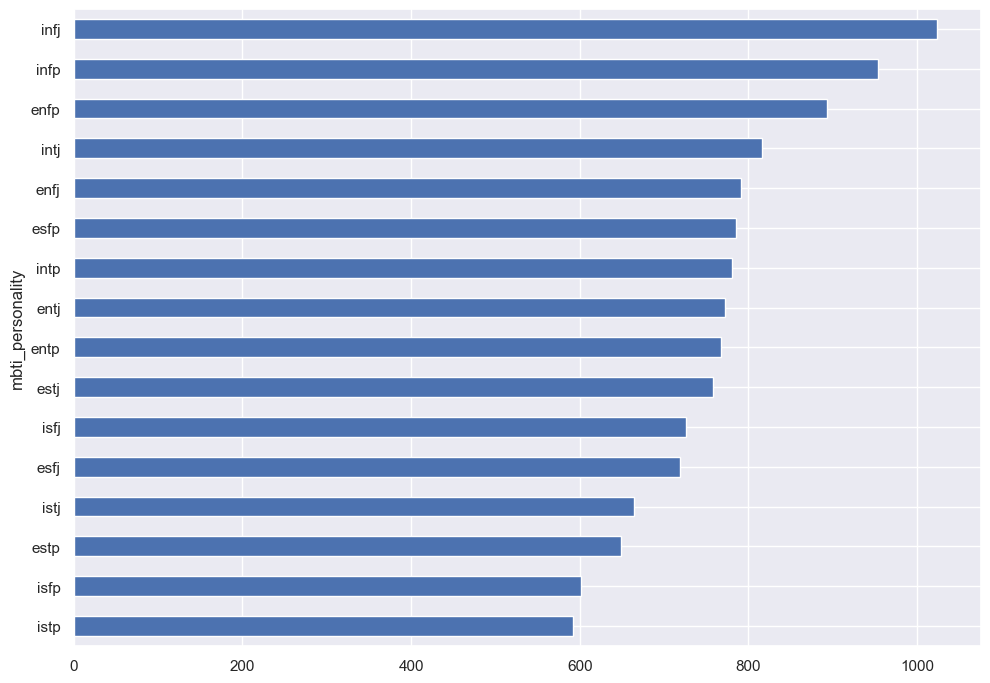

In [434]:
# User Interaction Activeness Overall Distribution
member_df['UserActiveness'] = member_df['followers_count']*0.5+member_df['following_count']*0.5+member_df['listed_count']
#member_df.groupby('mbti_personality').median()['UserActiveness'].sort_values().plot(kind = 'barh')
member_df.groupby('mbti_personality').describe()['UserActiveness']['50%'].sort_values().plot(kind = 'barh')

In [435]:
follower_medium_four = member_df.groupby('Four_Type').followers_count.describe()['50%']
following_medium_four = member_df.groupby('Four_Type').following_count.describe()['50%']
listed_medium_four = member_df.groupby('Four_Type').listed_count.describe()['50%']

In [436]:
print(follower_medium_four, following_medium_four, listed_medium_four)

Four_Type
Analysts     754.0
Diplomats    867.5
Explorers    674.0
Sentinels    717.0
Name: 50%, dtype: float64 Four_Type
Analysts     634.0
Diplomats    753.0
Explorers    413.5
Sentinels    528.0
Name: 50%, dtype: float64 Four_Type
Analysts     15.0
Diplomats    15.0
Explorers     6.0
Sentinels    11.0
Name: 50%, dtype: float64


In [437]:
all_interaction = []
for i in range(4):
    identity = ''
    if i==0:
        identity = 'Analysts'
    elif i==1:
        identity = 'Diplomats'
    elif i==2:
        identity = 'Explorers'
    else:
        identity = 'Sentinels'
    active_index = getUserActiveness(follower_medium_four[i], following_medium_four[i], listed_medium_four[i])
    all_interaction.append(active_index)
    print(identity + ': User Interaction Activeness is '+ str(active_index))

Analysts: User Interaction Activeness is 709.0
Diplomats: User Interaction Activeness is 825.25
Explorers: User Interaction Activeness is 549.75
Sentinels: User Interaction Activeness is 633.5


In [438]:
active_array = {
                'Four Types': ['Analysts', 'Diplomats','Explorers','Sentinels'],
                'Tweeting Activeness': [Analysts_tw_activeness, Diplomats_tw_activeness, 
                                        Explorers_tw_activeness,Sentinels_tw_activeness],
                 'Interaction Activeness': [all_interaction[0],all_interaction[1],
                                            all_interaction[2],all_interaction[3]]
                }
  
active_df = pd.DataFrame(active_array)
active_df

Four Types  Tweeting Activeness  Interaction Activeness
0   Analysts              4221.25                  709.00
1  Diplomats              5361.00                  825.25
2  Explorers              2726.25                  549.75
3  Sentinels              5054.25                  633.50

### Explore the social activeness and engagement index by four types

#### Compare Tweeting Activeness Using Medium

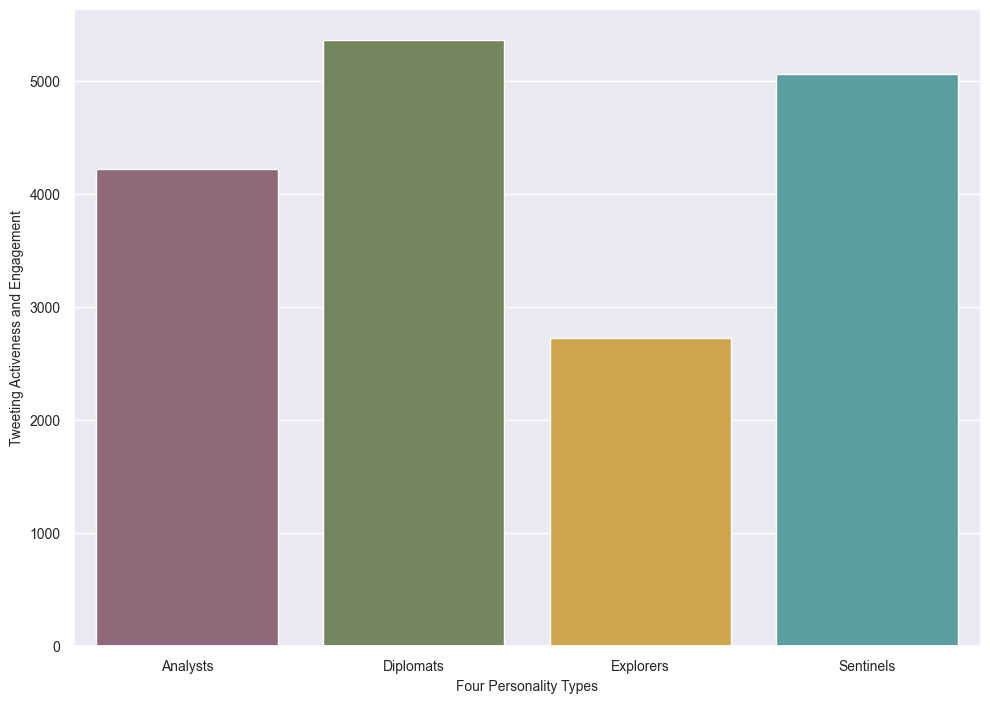

In [439]:
colors = ['#95627b', '#738d56', '#e4ae3a','#50a9aa'] # the color set for each type
sns.barplot(data=active_df, x=active_df['Four Types'], y='Tweeting Activeness', palette=colors)
plt.xlabel('Four Personality Types', fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel('Tweeting Activeness and Engagement', fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

#### Compare User Interaction Activeness Using Medium

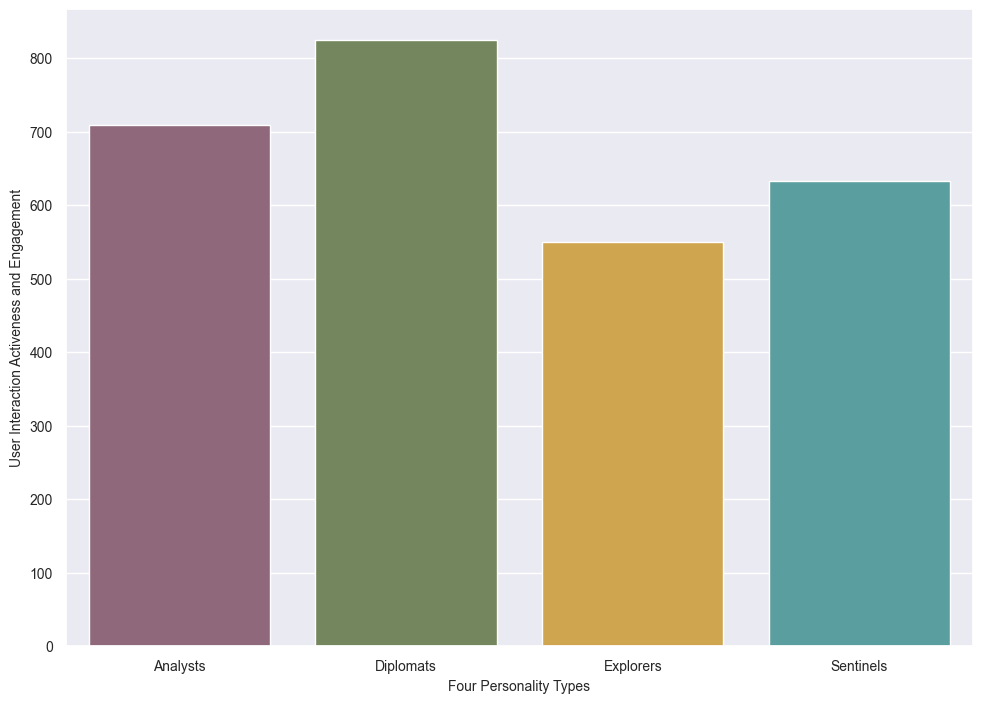

In [440]:
sns.barplot(data=active_df, x=active_df['Four Types'], y='Interaction Activeness', palette=colors)
plt.xlabel('Four Personality Types', fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel('User Interaction Activeness and Engagement', fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Using our calculation, we also check the activeness values for the total population.

In [441]:
# Get the medium for all users in the datasets
# Tweeting Activeness
tweets_medium_all = tweet_df.total_tweets_count.describe()['50%']
liked_medium_all = tweet_df.liked_count.describe()['50%']
hashtag_medium_all = tweet_df.total_hashtag_count.describe()['50%']
Tweet_all = getTweetActiveness(liked_medium_all,tweets_medium_all,hashtag_medium_all)

# Interaction Activeness
follower_medium_all = member_df.followers_count.describe()['50%']
following_medium_all = member_df.following_count.describe()['50%']
listed_medium_all = member_df.listed_count.describe()['50%']
Interact_all = getUserActiveness(follower_medium_all,following_medium_all,listed_medium_all)
print('The medium of all tweeting activeness:', Tweet_all)
print('The medium of all user interaction activeness:', Interact_all)

The medium of all tweeting activeness: 4690.5
The medium of all user interaction activeness: 729.75


In addition, to categorize these activeness and engagement numbers, we want to \
(1) use Q1 of the total population as "low" threshold, Q3 as "high" threshold, and "medium" otherwise\
(2) give each user a "low", "medium", "high" activeness grouping for both tweeting behaviors and user interactions.

In [442]:
# Create a new df: engagement_df that combines all activeness-related attributes
engagement_df = member_df.merge(tweet_df,on=['id','Four_Type','mbti_personality'])

In [443]:
engagement_df

mbti_personality                  id  followers_count  following_count   
0                infp            18392064              583              604  \
1                infp            57194960             1079              857   
2                infp           345833071              450              149   
3                infp          1387835150              572              986   
4                infp            38539731             2045              887   
...               ...                 ...              ...              ...   
5089             estj            52277872              616              836   
5090             estj           489644768              289              264   
5091             estj           329077476              103              115   
5092             estj  781835161394614272               49              119   
5093             estj          2840408812               59              170   

      listed_count  Four_Type  log_10_follwers_count  log_10_following_count   
0               57  Diplomats               2.765743                2.781109  \
1               64  Diplomats               3.033062                2.933031   
2               20  Diplomats               2.653309                2.173478   
3               21  Diplomats               2.757472                2.993921   
4               14  Diplomats               3.310715                2.947973   
...            ...        ...                    ...                     ...   
5089            33  Sentinels               2.789651                2.922258   
5090            10  Sentinels               2.461048                2.421768   
5091             0  Sentinels               2.013259                2.061075   
5092             0  Sentinels               1.691081                2.075912   
5093             1  Sentinels               1.771587                2.230704   

      log_10_listed_count  UserActiveness  liked_count  total_tweets_count   
0                1.756636           650.5        27808               49906  \
1                1.806858          1032.0          335               48928   
2                1.303196           319.5        36898               50049   
3                1.324282           800.0         7305               48397   
4                1.149219          1480.0         4714               46082   
...                   ...             ...          ...                 ...   
5089             1.519828           759.0           59                 311   
5090             1.004321           286.5          442                 265   
5091            -1.000000           109.0           45                 112   
5092            -1.000000            84.0            2                  75   
5093             0.041393           115.5            1                  57   

      total_hashtag_count  log_10_liked_count  log_10_total_tweets_count   
0                      41            4.444171                   4.698154  \
1                       9            2.525174                   4.689558   
2                      82            4.567004                   4.699396   
3                       7            3.863626                   4.684819   
4                      19            3.673399                   4.663532   
...                   ...                 ...                        ...   
5089                   86            1.771587                   2.492900   
5090                   15            2.645521                   2.423410   
5091                   46            1.654177                   2.049606   
5092                   29            0.322219                   1.875640   
5093                   17            0.041393                   1.756636   

      log_10_total_hashtag_count  TweetingActiveness  
0                       1.613842            31915.25  
1                       0.959041            24550.00  
2                       1.914343            34269.50  
3                       0

In [444]:
# Get social media activeness for each observation
def getTweeting(data):
    return getTweetActiveness(data['liked_count'],data['total_tweets_count'],data['total_hashtag_count']) 

def getInteraction(data):
    return getUserActiveness(data['followers_count'],data['following_count'],data['listed_count'])

In [445]:
# Apply the function to a new column
engagement_df['Tweeting Activeness'] = engagement_df.apply(getTweeting, axis=1)
engagement_df['Interaction Activeness'] = engagement_df.apply(getInteraction, axis=1)

In [446]:
engagement_df[['mbti_personality', 'Four_Type', 'Tweeting Activeness', 'Interaction Activeness']]

mbti_personality  Four_Type  Tweeting Activeness  Interaction Activeness
0                infp  Diplomats             31915.25                   650.5
1                infp  Diplomats             24550.00                  1032.0
2                infp  Diplomats             34269.50                   319.5
3                infp  Diplomats             26026.50                   800.0
4                infp  Diplomats             24224.25                  1480.0
...               ...        ...                  ...                     ...
5089             estj  Sentinels               191.75                   759.0
5090             estj  Sentinels               246.75                   286.5
5091             estj  Sentinels                78.75                   109.0
5092             estj  Sentinels                45.25                    84.0
5093             estj  Sentinels                33.00                   115.5

[5094 rows x 4 columns]

In [447]:
LOW_THRESHOLD_T = np.percentile(engagement_df['Tweeting Activeness'], 25)
HIGH_THRESHOLD_T = np.percentile(engagement_df['Tweeting Activeness'], 75)
print('Low and high thresholds for tweeting: ', LOW_THRESHOLD_T, HIGH_THRESHOLD_T)
LOW_THRESHOLD_U= np.percentile(engagement_df['Interaction Activeness'], 25)
HIGH_THRESHOLD_U = np.percentile(engagement_df['Interaction Activeness'], 75)
print('Low and high thresholds for user interaction: ', LOW_THRESHOLD_U, HIGH_THRESHOLD_U)

Low and high thresholds for tweeting:  1896.25 11128.625
Low and high thresholds for user interaction:  459.5 1190.875


In [448]:
def mappingTweetingScale(twAct):
    if twAct<=LOW_THRESHOLD_T:
        return 'Low'
    elif twAct>=HIGH_THRESHOLD_T:
        return 'High'
    else:
        return 'Medium'

In [449]:
def mappingUserScale(userAct):
    if userAct<=LOW_THRESHOLD_U:
        return 'Low'
    elif userAct>=HIGH_THRESHOLD_U:
        return 'High'
    else:
        return 'Medium'

In [450]:
engagement_df['Tweeting Activeness Group'] = engagement_df['Tweeting Activeness'].apply(mappingTweetingScale)
engagement_df['Interaction Activeness Group'] = engagement_df['Interaction Activeness'].apply(mappingUserScale)

In [451]:
engagement_df[['mbti_personality', 'Four_Type', 'Tweeting Activeness Group', 'Interaction Activeness Group']]

mbti_personality  Four_Type Tweeting Activeness Group   
0                infp  Diplomats                      High  \
1                infp  Diplomats                      High   
2                infp  Diplomats                      High   
3                infp  Diplomats                      High   
4                infp  Diplomats                      High   
...               ...        ...                       ...   
5089             estj  Sentinels                       Low   
5090             estj  Sentinels                       Low   
5091             estj  Sentinels                       Low   
5092             estj  Sentinels                       Low   
5093             estj  Sentinels                       Low   

     Interaction Activeness Group  
0                          Medium  
1                          Medium  
2                             Low  
3                          Medium  
4                            High  
...                           ...  
5089                       Medium  
5090                          Low  
5091                          Low  
5092                          Low  
5093                          Low  

[5094 rows x 4 columns]

Now let's see how many people in each personality group are in 'High', 'Medium', or 'Low' activeness categories.

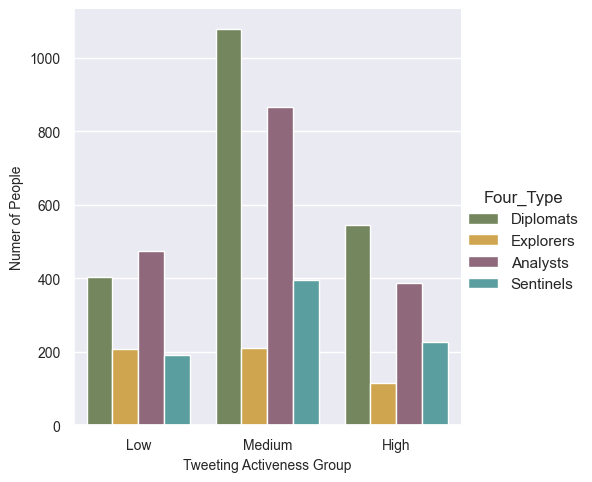

In [452]:
colors = ['#738d56', '#e4ae3a' , '#95627b','#50a9aa'] #color set
sns.catplot(data=engagement_df, x='Tweeting Activeness Group', hue='Four_Type', kind='count', palette=colors, order=['Low', 'Medium', 'High'])
plt.xlabel('Tweeting Activeness Group', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Numer of People', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

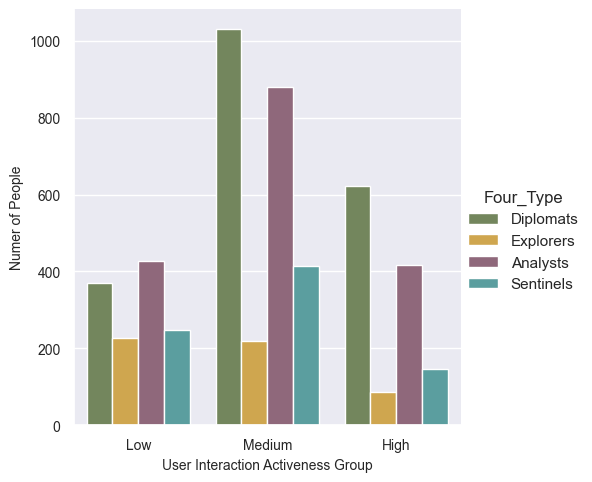

In [453]:
colors = ['#738d56', '#e4ae3a' , '#95627b','#50a9aa'] #color set
sns.catplot(data=engagement_df, x='Interaction Activeness Group', hue='Four_Type', kind='count', palette=colors, order=['Low', 'Medium', 'High'])
plt.xlabel('User Interaction Activeness Group', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Numer of People', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [543]:
# analyze percent of people for each type in each group 
four_type_counts = engagement_df.Four_Type.value_counts()
# print(four_type_counts)
percent_df = engagement_df.groupby('Tweeting Activeness Group')['Four_Type'].value_counts().rename('counts').reset_index()
counts = percent_df['counts']
types = percent_df['Four_Type']
percents = []
dictionary = {'Diplomats': 0, 'Analysts': 1, 'Sentinels':2, 'Explorers': 3}
# we want to convert count to actual percentage of people with high. medium, or low activeness in each type
for i in range(len(counts)):
    curr_type = types[i]
    total_count = four_type_counts[dictionary[curr_type]]
    percent = counts[i] / total_count
    percents.append(percent)
percent_df['percent'] = percents
percent_df


Tweeting Activeness Group  Four_Type  counts   percent
0                       High  Diplomats     544  0.268775
1                       High   Analysts     388  0.224797
2                       High  Sentinels     226  0.278668
3                       High  Explorers     116  0.217636
4                        Low   Analysts     473  0.274044
5                        Low  Diplomats     402  0.198617
6                        Low  Explorers     208  0.390244
7                        Low  Sentinels     191  0.235512
8                     Medium  Diplomats    1078  0.532609
9                     Medium   Analysts     865  0.501159
10                    Medium  Sentinels     394  0.485820
11                    Medium  Explorers     209  0.392120

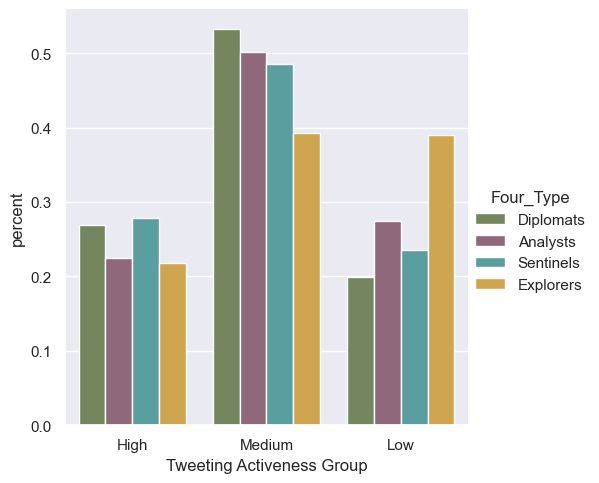

In [545]:
colors = ['#738d56', '#95627b','#50a9aa', '#e4ae3a'] #color set
sns.catplot(data=percent_df, hue='Four_Type', x='Tweeting Activeness Group', y='percent', palette=colors, kind='bar', order=['High','Medium','Low'])
plt.show()

We found that Diplomats have highest proportion of people in the medium activeness group and second highest proportion of people in the high activeness group compared to other types. It also has lowest proportion of people in low activeness group compared to the other types.

Analysts have second highest proportion of people in the medium and low activeness group compared to other types. 

Sentinels have largest proportion of people in the high activeness group compared to other types, but it also has second highest proportion of people in low activeness group compared to the other types.

Explorers have almost lowest proportion of people in high and medium activeness group and highest proportion of people in the low activeness group compared to other types.

Generally, most Diplomats, Analysts, Sentinels, and Explorers have medium tweeting activeness. 
Diplomats and Sentinels have more proportion of people in high activeness group than low activeness group, while Analysts and Explorers have more proportion of people in low activeness group than high activeness group.


At the end, we start to use ANOVA test to check the significance. While it's not part of EDA, we include here for some feedback and go over some general testing procedures.

<!-- The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

The samples are independent.

Each sample is from a normally distributed population.

The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Important: the following test assumes the conditions are met. If it's not being met, re-format the values and then do the test. The overall structure of ANOVA will not change though. -->

In [456]:
# ANOVA Test
# Perform one-way ANOVA on multidimentional activity arrays
def getTypeActArray(four_type):
    ft_df = engagement_df[engagement_df['Four_Type']==four_type]
    print('the size of '+four_type+' is', ft_df.shape[0])
    stacked_arr = np.column_stack((ft_df['Tweeting Activeness'].values,
                                   ft_df['Interaction Activeness'].values))
    return stacked_arr

In [457]:
F, p = scipy.stats.f_oneway(getTypeActArray('Analysts'), 
                            getTypeActArray('Diplomats'),
                            getTypeActArray('Explorers'),
                            getTypeActArray('Sentinels'))
print('F statistic is: ', F)
print('p-value is: ', p)

the size of Analysts is 1726
the size of Diplomats is 2024
the size of Explorers is 533
the size of Sentinels is 811
F statistic is:  [12.85830296 58.52504939]
p-value is:  [2.28828094e-08 3.43937602e-37]


Now we move on to the next research question that focuses on comparing 4 dimensions.
<!-- (re-phrase it in a more anova way)
e.g. We reject the null hypothesis.
Twitter users’ four different Myers–Briggs MBTI personality types (Analysts: NT, Diplomats: NF, Sentinels: SJ, Explorers: SP) will influence their social media activeness and engagement. -->

## EDA II: Four Dimensions (Mind: E/I, Energy: N/S, Nature: F/T, Tactics: J/P)

In this part, we will classify the 16 mbti personalities into 4 dimensions ('mind', 'energy', 'nature', 'tactics')

## 1. explore the `'followers_count'`, `'following_count'`, and `'listed_count'` in `member_df`

In [458]:
#method that helps to create the 4 dimensions
def mbti_to_letter(df):
  df['mind'] = df['mbti_personality'].str[0]
  df['energy'] = df['mbti_personality'].str[1]
  df['nature'] = df['mbti_personality'].str[2]
  df['tactics'] = df['mbti_personality'].str[3]
  return df

In [459]:
#apply the method to both member_df and tweet_df
member_df = mbti_to_letter(member_df)
tweet_df = mbti_to_letter(tweet_df)

In [460]:
member_df.head()

mbti_personality          id  followers_count  following_count   
0             infp   160881623             1904              782  \
2             infp  2325006565             1223              604   
4             infp  1330237585             1805              340   
8             infp    63170384             1154              268   
9             infp    33811202             1620             1234   

   listed_count  Four_Type  log_10_follwers_count  log_10_following_count   
0            67  Diplomats               3.279690                2.893262  \
2            31  Diplomats               3.087462                2.781109   
4            69  Diplomats               3.256501                2.531607   
8            25  Diplomats               3.062243                2.428297   
9            71  Diplomats               3.209542                3.091350   

   log_10_listed_count  UserActiveness mind energy nature tactics  
0             1.826723          1410.0    i      n      f       p  
2             1.492760           944.5    i      n      f       p  
4             1.839478          1141.5    i      n      f       p  
8             1.399674           736.0    i      n      f       p  
9             1.851870          1498.0    i      n      f       p

In [461]:
tweet_df.head()

mbti_personality          id  liked_count  total_tweets_count   
106             infp    18392064        27808               49906  \
108             infp    57194960          335               48928   
110             infp   345833071        36898               50049   
111             infp   198740642        30497               48231   
112             infp  1387835150         7305               48397   

     total_hashtag_count  Four_Type  log_10_liked_count   
106                   41  Diplomats            4.444171  \
108                    9  Diplomats            2.525174   
110                   82  Diplomats            4.567004   
111                   17  Diplomats            4.484259   
112                    7  Diplomats            3.863626   

     log_10_total_tweets_count  log_10_total_hashtag_count   
106                   4.698154                    1.613842  \
108                   4.689558                    0.959041   
110                   4.699396                    1.914343   
111                   4.683327                    1.232996   
112                   4.684819                    0.851258   

     TweetingActiveness mind energy nature tactics  
106            31915.25    i      n      f       p  
108            24550.00    i      n      f       p  
110            34269.50    i      n      f       p  
111            31744.00    i      n      f       p  
112            26026.50    i      n      f       p

# Move up!! 👀


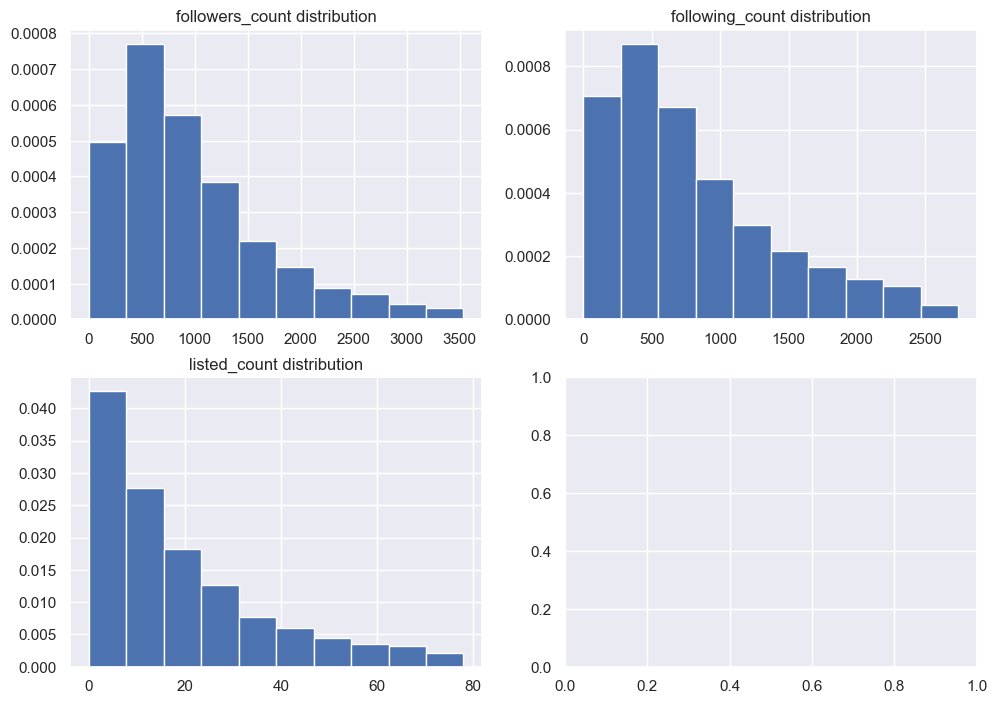

In [462]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.hist(member_df['followers_count'], density = True)
ax1.hist(member_df['following_count'], density = True)
ax2.hist(member_df['listed_count'], density = True)
ax0.set_title('followers_count distribution')
ax1.set_title('following_count distribution')
ax2.set_title('listed_count distribution')
plt.show()

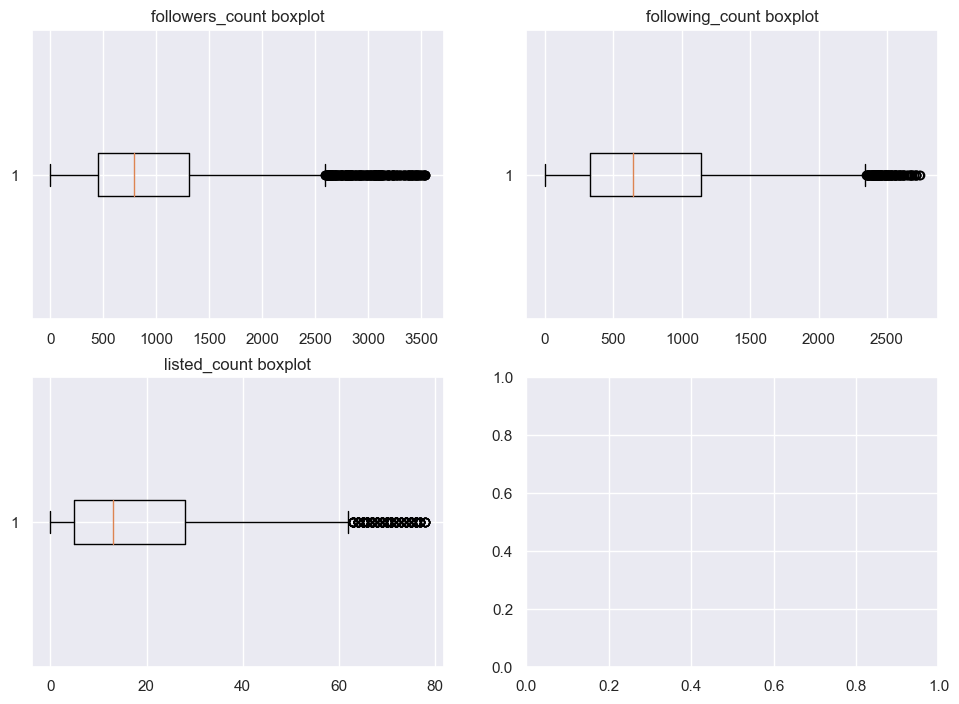

In [463]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.boxplot(member_df['followers_count'], vert=False)
ax1.boxplot(member_df['following_count'], vert=False)
ax2.boxplot(member_df['listed_count'], vert=False)
ax0.set_title('followers_count boxplot')
ax1.set_title('following_count boxplot')
ax2.set_title('listed_count boxplot')
plt.show()

## Two methods to filter outliers for better visulization

### 3. Remove outlier 🔔

In [464]:
def remove_outliers(s):
    #return a series for plotting
    q1 = np.percentile(s, 25)
    q3 = np.percentile(s, 75)
    IQR = q3-q1
    upper = q3+1.5*IQR
    lower = q3-1.5*IQR
    return s[(s>=lower)&(s<=upper)]

In [465]:
# def remove_outliers_for_df(df, col_name):
#     #return a dataframe
#     q1 = np.percentile(df[col_name], 25)
#     q3 = np.percentile(df[col_name], 75)
#     IQR = q3-q1
#     upper = q3+1.5*IQR
#     lower = q3-1.5*IQR
#     return df[(df[col_name]>=lower)&(df[col_name]<=upper)]

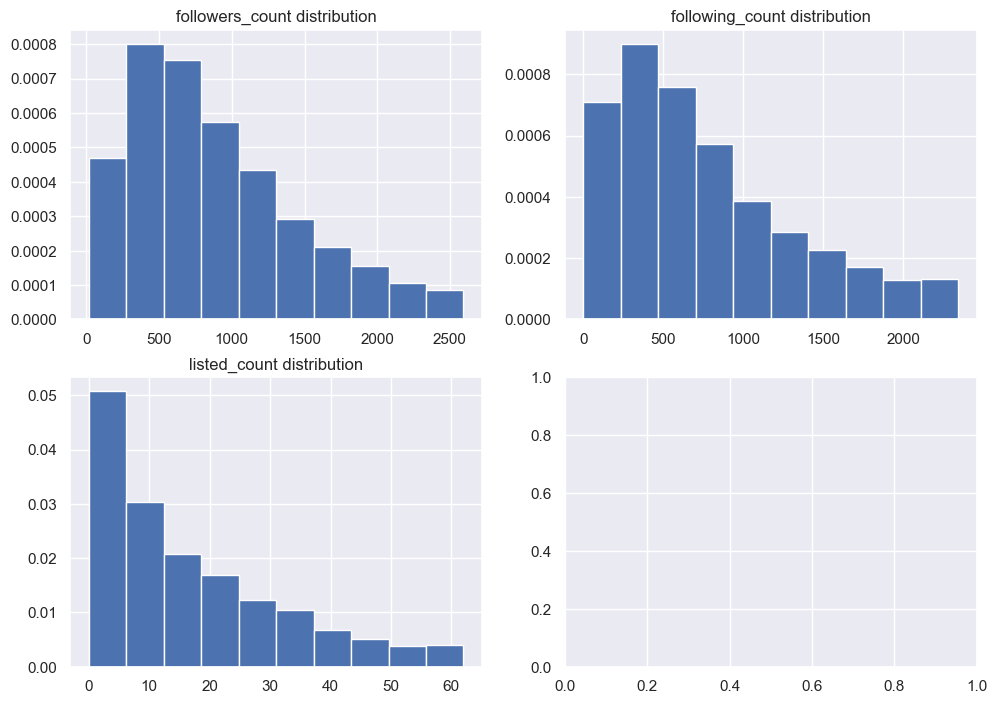

In [466]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.hist(remove_outliers(member_df['followers_count']), density = True)
ax1.hist(remove_outliers(member_df['following_count']), density = True)
ax2.hist(remove_outliers(member_df['listed_count']), density = True)
ax0.set_title('followers_count distribution')
ax1.set_title('following_count distribution')
ax2.set_title('listed_count distribution')
plt.show()

In [467]:
member_df_wo = remove_outliers_for_df(member_df, 'followers_count')
member_df_wo = remove_outliers_for_df(member_df_wo, 'following_count')
member_df_wo= remove_outliers_for_df(member_df_wo, 'listed_count')

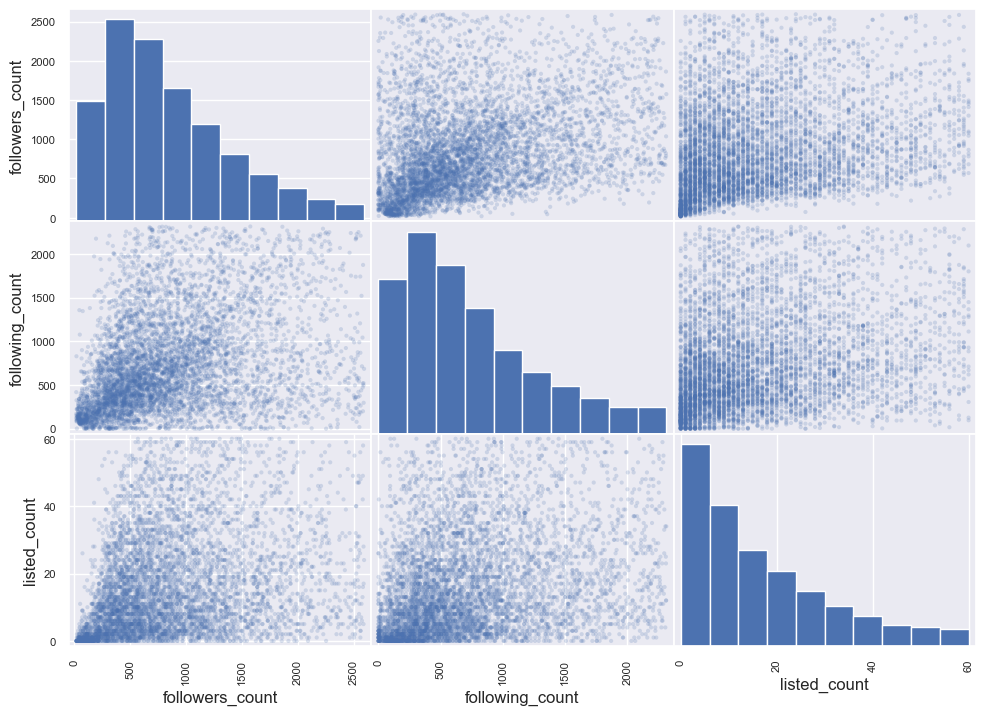

In [468]:
pd.plotting.scatter_matrix(member_df_wo[['followers_count', 'following_count', 'listed_count']], alpha=0.2);

In [469]:
tweet_df_wo = remove_outliers_for_df(tweet_df, 'liked_count')
tweet_df_wo = remove_outliers_for_df(tweet_df_wo, 'total_tweets_count')
tweet_df_wo = remove_outliers_for_df(tweet_df_wo, 'total_hashtag_count')

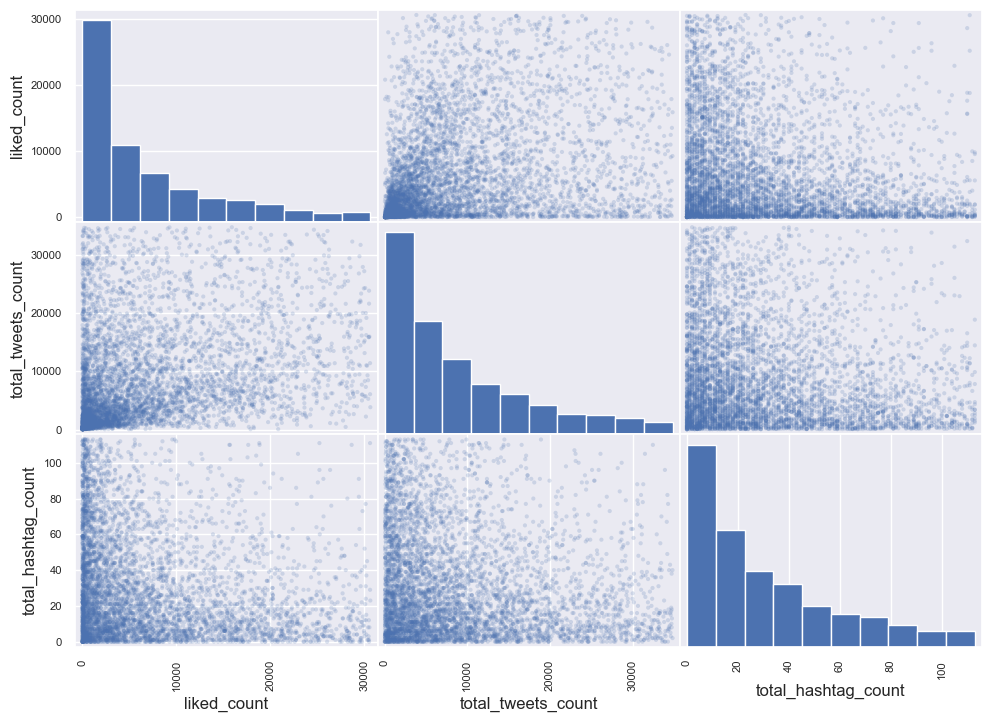

In [470]:
pd.plotting.scatter_matrix(tweet_df_wo[['liked_count', 'total_tweets_count', 'total_hashtag_count']], alpha=0.2);

————————🔔 Move up (stop here)!!!

### 1. Distribution
  - **Density Distribution** (without outliers): Visualize the density of the features we are interested in. The density is measured by dividing the frequency of a group by its corresponding width. Thus, the distrubtions will not be affected by the number of users (e.g. there is more 'n' than 's' in the 'energy' dimension)

## outilers filtering issue (smaller diff) 👄

In [471]:
test_df = remove_outliers_for_df(member_df, 'followers_count')

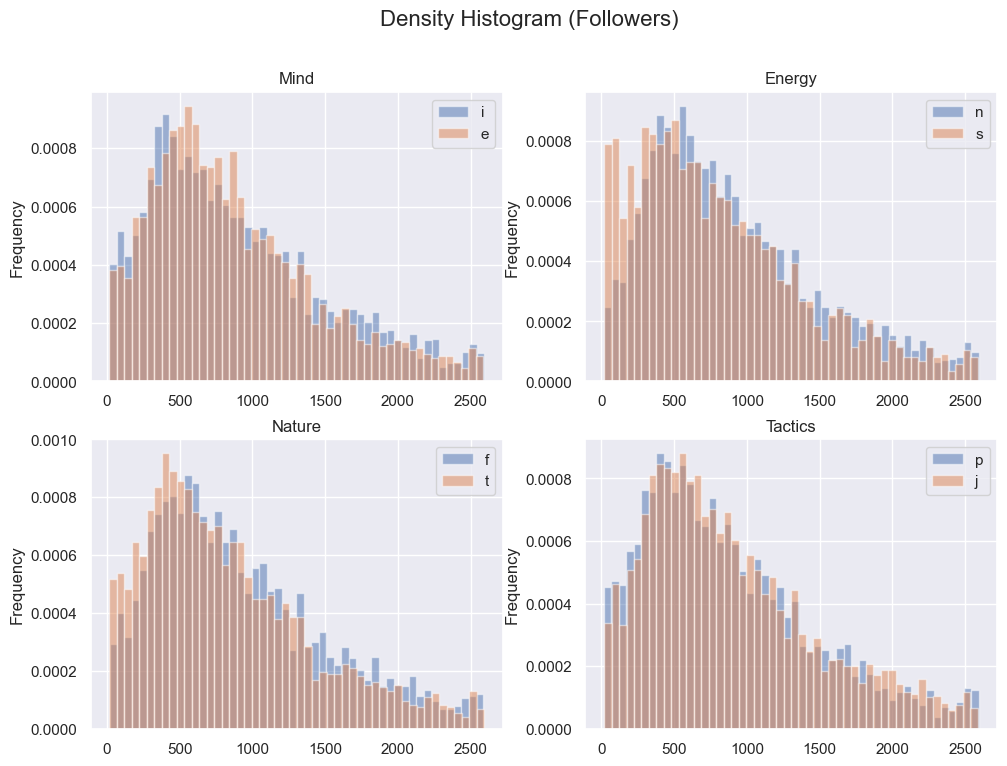

In [472]:
#The comparison of followers density distributions of the 4 dimensions
plt.subplot(2, 2, 1)
test_df[test_df['mind']=='i']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['mind']=='e']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["i", "e"])
plt.title(label="Mind", fontsize=12);
plt.subplot(2, 2, 2)
test_df[test_df['energy']=='n']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['energy']=='s']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["n", "s"])
plt.title(label="Energy", fontsize=12);
plt.subplot(2, 2, 3)
test_df[test_df['nature']=='f']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['nature']=='t']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["f", "t"])
plt.title(label="Nature", fontsize=12);
plt.subplot(2, 2, 4)
test_df[test_df['tactics']=='p']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['tactics']=='j']['followers_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["p", "j"]);
plt.title(label="Tactics", fontsize=12);
plt.suptitle(t="Density Histogram (Followers)", fontsize=16);

#### _Observations_:
1. The density distribution for ‘p’ and ‘j’ in the tactics dimension seems similar.
2. In the energy and nature dimensions, the orange histograms seem to be taller than the blue histograms when followers are between 0 to 500, and shorter than the blue one when the followers are more than 500. This means that ‘n’ in the energy dimension and ‘f’ in the nature dimension tend to have more followers on twitter. The difference between ‘n’ and ‘s’ in the energy dimension is especially noticeable in the first few bins. 
3. In the mind dimension, there seems to be a more complex pattern. When the followers are between 0-500 or above 1500, the histogram of ‘i’ is higher. When the followers are between 500 and 1500, the histogram of ‘e’ is higher.

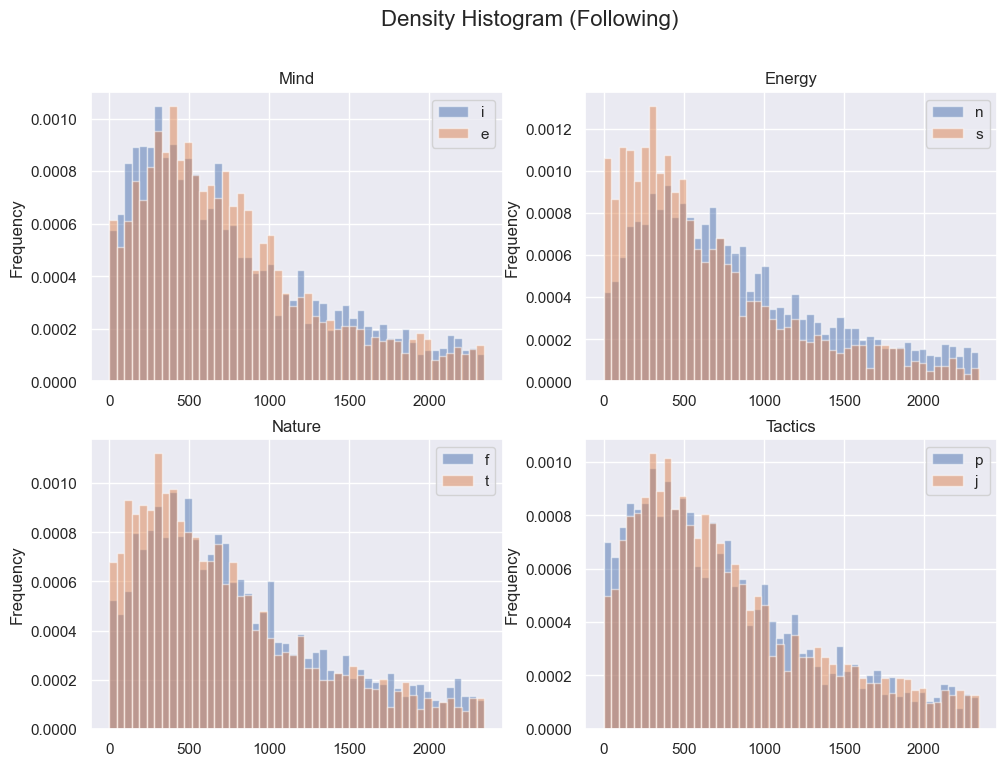

In [473]:
#The comparison of following density distributions of the 4 dimensions
test_df = remove_outliers_for_df(member_df, 'following_count')
plt.subplot(2, 2, 1)
test_df[test_df['mind']=='i']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['mind']=='e']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["i", "e"])
plt.title(label="Mind", fontsize=12);
plt.subplot(2, 2, 2)
test_df[test_df['energy']=='n']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['energy']=='s']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["n", "s"])
plt.title(label="Energy", fontsize=12);
plt.subplot(2, 2, 3)
test_df[test_df['nature']=='f']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['nature']=='t']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["f", "t"])
plt.title(label="Nature", fontsize=12);
plt.subplot(2, 2, 4)
test_df[test_df['tactics']=='p']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['tactics']=='j']['following_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["p", "j"]);
plt.title(label="Tactics", fontsize=12);
plt.suptitle(t="Density Histogram (Following)", fontsize=16);

#### _Observations_:
1. The density distribution for ‘p’ and ‘j’ in the tactics dimension seems similar.
2. The difference between ‘n’ and ‘s’ in the energy dimension is most obvious. Twitter users with ‘s’ in mbti seem to follow less users.
3. In the nature dimension, Twitter users with ‘t’ in mbti seem to follow less users.
4. Similar to the followers density histogram, in the mind dimension, there seems to be a more complex pattern. (When the followers are between 0-500 or above 1200, the histogram of ‘i’ is higher. When the followers are between 500 and 1200, the histogram of ‘e’ is higher.)

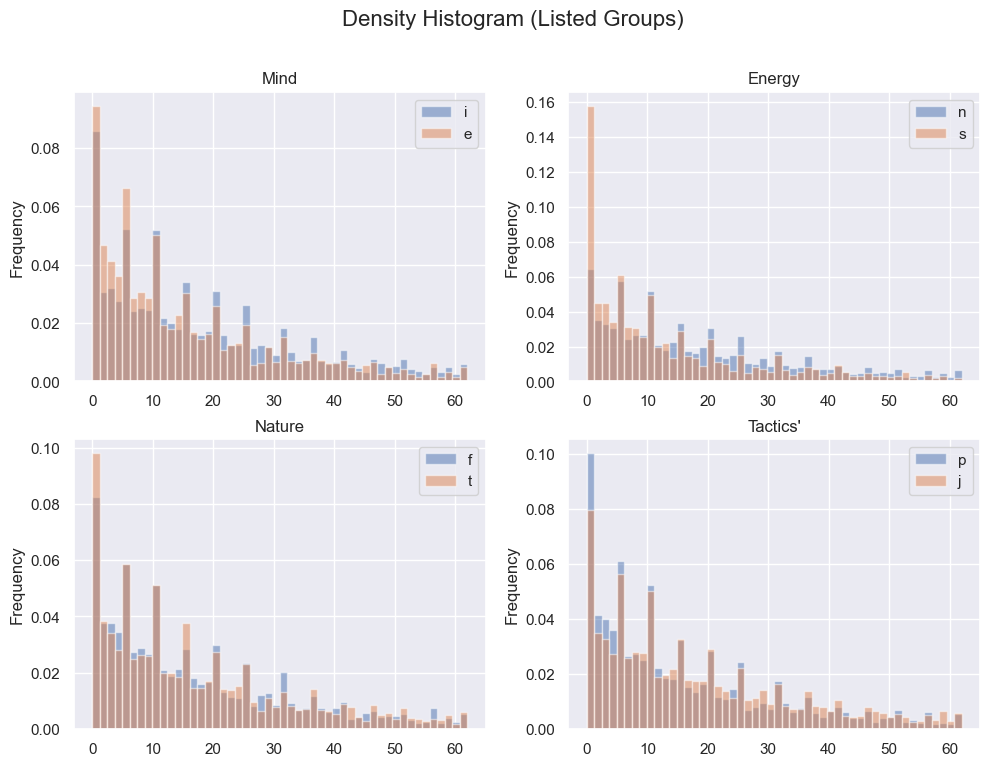

In [474]:
#The comparison of listed group density distributions of the 4 dimensions
test_df = remove_outliers_for_df(member_df, 'listed_count')
plt.subplot(2, 2, 1)
test_df[test_df['mind']=='i']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['mind']=='e']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["i", "e"])
plt.title(label="Mind", fontsize=12);
plt.subplot(2, 2, 2)
test_df[test_df['energy']=='n']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['energy']=='s']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["n", "s"])
plt.title(label="Energy", fontsize=12);
plt.subplot(2, 2, 3)
test_df[test_df['nature']=='f']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['nature']=='t']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["f", "t"])
plt.title(label="Nature", fontsize=12);
plt.subplot(2, 2, 4)
test_df[test_df['tactics']=='p']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5)
test_df[test_df['tactics']=='j']['listed_count'].plot(kind='hist', density = True, bins = 50, alpha = 0.5);
plt.legend(["p", "j"]);
plt.title(label="Tactics'", fontsize=12);
plt.suptitle(t="Density Histogram (Listed Groups)", fontsize=16);

#### _Observations_:
1. The difference between ‘n’ and ‘s’ in the energy dimension is most obvious. A significant proportion of users with ‘s’ in their mbti seem to have 0 listed groups.
2. There seem to be smaller differences in the other three dimensions. 
    - In the mind dimension, the proportion of users with ‘e’ in their mbti seem to be slightly more likely to have 0 listed groups.
    - In the nature dimension, the proportion of users with ‘t’ in their mbti seem to be slightly more likely to have 0 listed groups.
    - In the tactics dimension, the proportion of users with ‘p’ in their mbti seem to be slightly more likely to have 0 listed groups.


- **Distributions by counts** (without outliers)

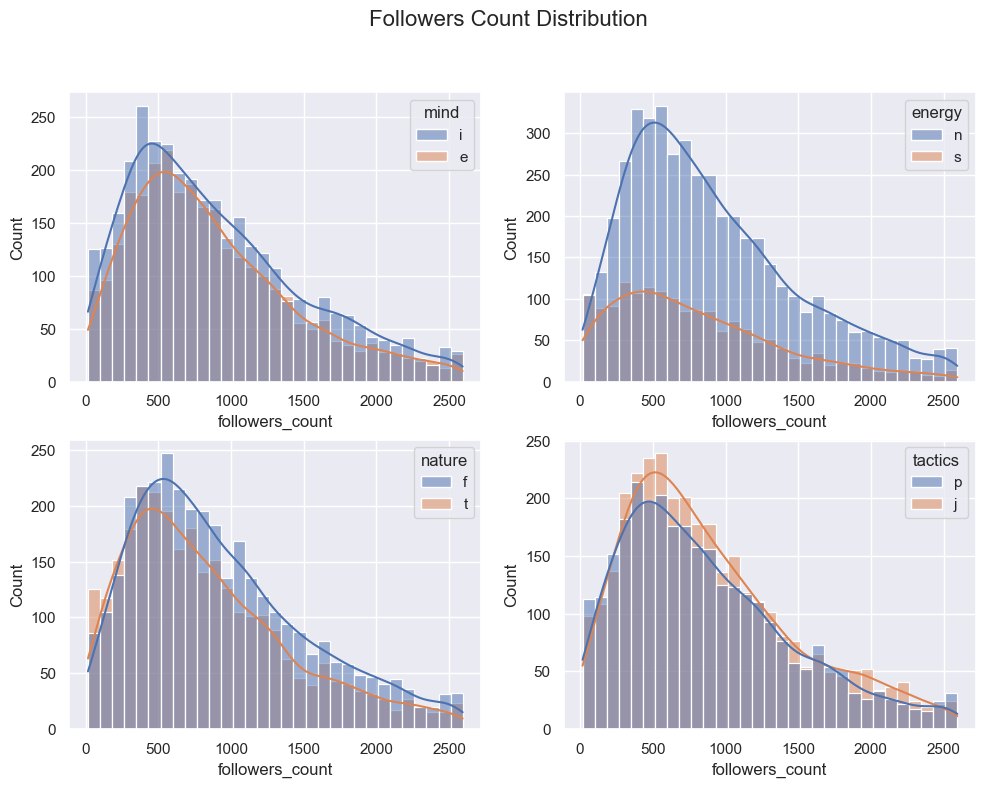

In [475]:
#The comparison of followers count distributions of the 4 dimensions
plt.subplot(2, 2, 1)
sns.histplot(data=remove_outliers_for_df(member_df, 'followers_count'), x='followers_count', 
             kde = True, hue="mind");
plt.subplot(2, 2, 2)
sns.histplot(data=remove_outliers_for_df(member_df, 'followers_count'), x='followers_count', 
             kde = True, hue='energy');
plt.subplot(2, 2, 3)
sns.histplot(data=remove_outliers_for_df(member_df, 'followers_count'), x='followers_count', 
             kde = True, hue='nature');
plt.subplot(2, 2, 4)
sns.histplot(data=remove_outliers_for_df(member_df, 'followers_count'), x='followers_count', 
             kde = True, hue='tactics');
plt.suptitle(t="Followers Count Distribution", fontsize=16);

#### _Observation_: 
1. For the mind dimension, surprisingly, The number of introverts outnumbered the number of extroverts for every follower count, which implies that introverts are more socially active and engage more on Twitter. While it looks surprising, introverts might find online platforms to be more secure, thus they are more comfortable expressing themselves, thus gaining more followers. 
2. The energy dimension shows a great disparity between sensing and intuition, especially when two types of people have relatively less followers. People who fall into the “n” type have way more followers than people who fall into the “s” type for every follower count. This result implies that people who focus on facts are less engaging on Twitter than those who focus on different future possibilities.
3. The nature dimension does not show a huge difference when there are only a few followers. However, as followers grow beyond 500, the graph displayed an approximately consistent difference between thinkers and feelers, in which feelers are more socially active and engaged on Twitter. 
4. The tactics dimension does not show a huge difference when there are less followers. When followers reach approximately 500, the count difference gradually increases but then gradually decreases and minimizes to zero when followers reach 1500. Therefore, judgers are slightly more socially engaged than perceivers.


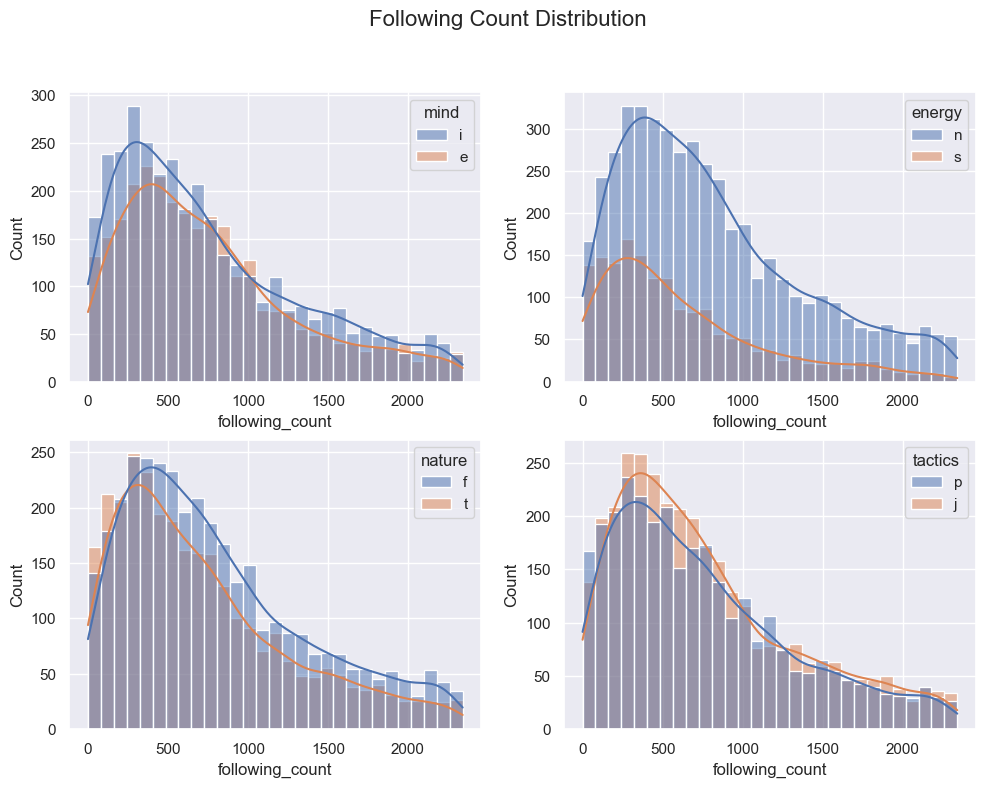

In [476]:
#The comparison of following count distributions of the 4 dimensions
plt.subplot(2, 2, 1)
sns.histplot(data=remove_outliers_for_df(member_df, 'following_count'), x='following_count', 
             kde = True, hue="mind");
plt.subplot(2, 2, 2)
sns.histplot(data=remove_outliers_for_df(member_df, 'following_count'), x='following_count', 
             kde = True, hue='energy');
plt.subplot(2, 2, 3)
sns.histplot(data=remove_outliers_for_df(member_df, 'following_count'), x='following_count', 
             kde = True, hue='nature');
plt.subplot(2, 2, 4)
sns.histplot(data=remove_outliers_for_df(member_df, 'following_count'), x='following_count', 
             kde = True, hue='tactics');
plt.suptitle(t="Following Count Distribution", fontsize=16);

#### _Observation_:
1. For the mind dimension, the number of introverts outnumbered the number of extroverts for every following count, except when the following count is around 1,000. 
2. There’s still a great disparity between the following count of sensors and intuitive-driven people. Since intuitive-driven people were following more people for every following count, it indicates that they are more socially active on Twitter.
3. Similar to the follower counts, the nature and tactics dimension show a similar pattern that there are greater number of judgers and feelers for every following count, proving that feelers and judgers are slightly more socially engaged. However, the differences are still not as drastic as shown in the energy dimension.

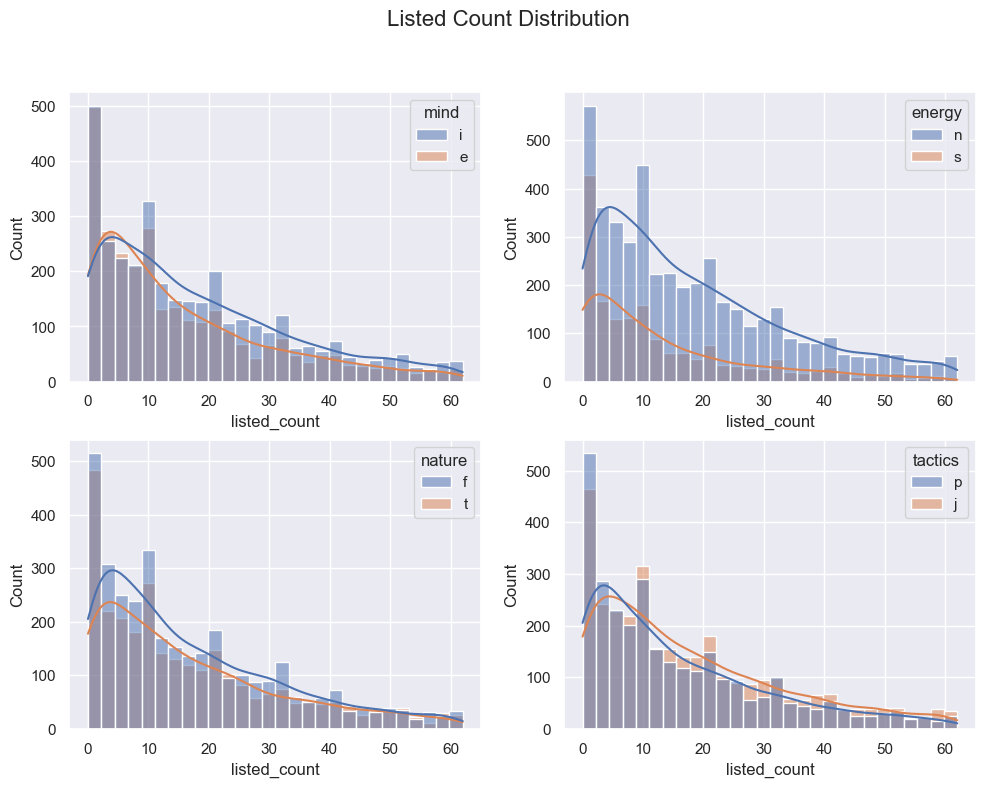

In [477]:
#The comparison of listed group count distributions of the 4 dimensions
plt.subplot(2, 2, 1)
sns.histplot(data=remove_outliers_for_df(member_df, 'listed_count'), x='listed_count', 
             kde = True, hue="mind");
plt.subplot(2, 2, 2)
sns.histplot(data=remove_outliers_for_df(member_df, 'listed_count'), x='listed_count', 
             kde = True, hue='energy');
plt.subplot(2, 2, 3)
sns.histplot(data=remove_outliers_for_df(member_df, 'listed_count'), x='listed_count', 
             kde = True, hue='nature');
plt.subplot(2, 2, 4)
sns.histplot(data=remove_outliers_for_df(member_df, 'listed_count'), x='listed_count', 
             kde = True, hue='tactics');
plt.suptitle(t="Listed Count Distribution", fontsize=16);

#### _Observation_:
1. While the mind, nature, and tactics dimensions do not show a huge difference between types, the energy dimension displays drastic differences between sensors and intuitive-driven people. Although more of the intuitive-driven people are listed zero times compared to sensors, more intuitive-driven people are also listed when the listed count increases. The pattern shows that, overall, people who are intuitive-driven are listed more than sensors. Therefore, intuitive-driven people are more socially engaged and active.

## At the end, we start to use T-test and permutation test to check the significance. While they are not part of EDA, we include them here for feedback and go over some general testing procedures.

# T-test:

To use a T-test, the dataset needs satisfy the following criteria:
1. Data are continuous
2. Normally distributed
3. Equal variance between groups
4. Not paired

For now, the dataset satisfied the first and fourth criteria. So, for the following steps, we will try to meet the second and third criteria.

- From the plot below, we can observe that we have a right skewed distribution, which does not satisfy the second criterion.

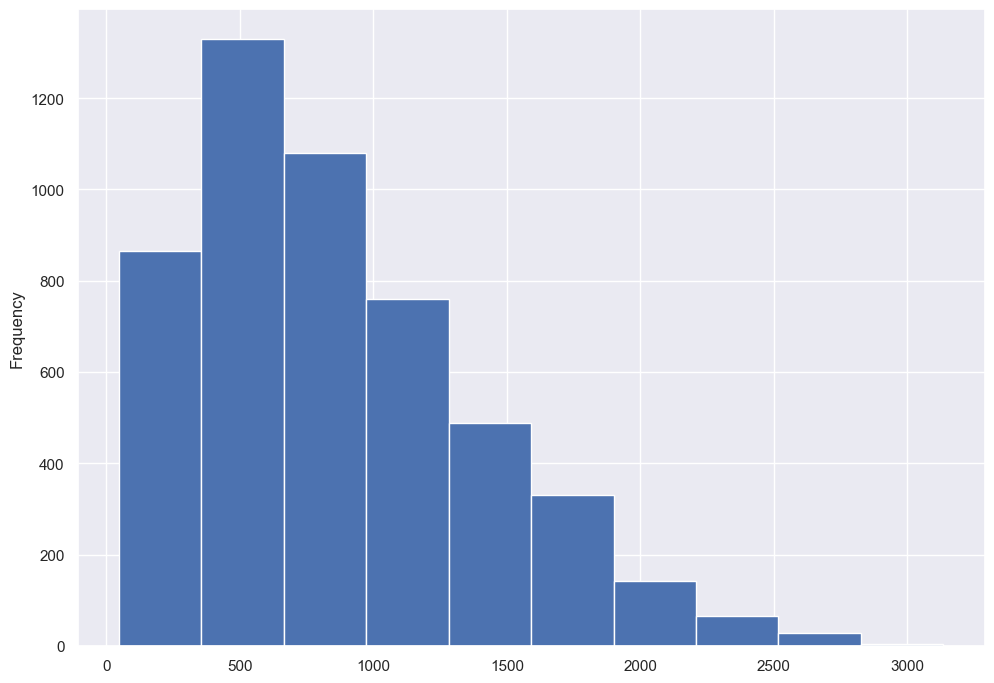

In [478]:
engagement_df['Interaction Activeness'].plot(kind = 'hist');

Thus, we decide to apply a log 10 to normalize the distribution. Although it is not exactly normally distributed, it is sufficient for performing a T-test.

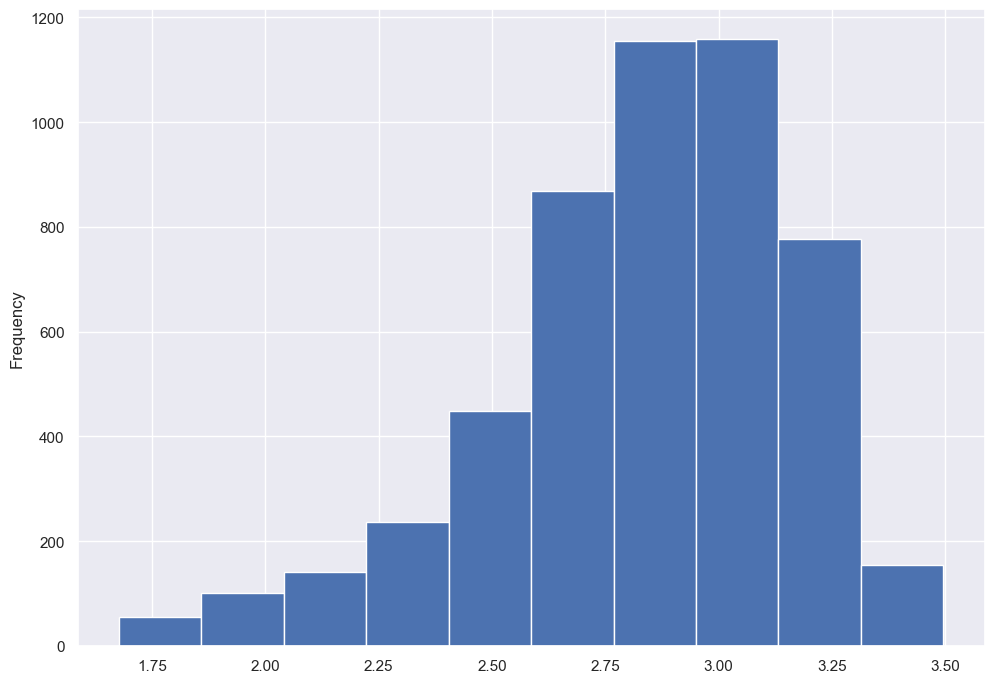

In [479]:
engagement_df['Interaction Activeness'].apply(np.log10).plot(kind = 'hist');

- From the below exploration, we found that the variance of the two groups within a dimension (e.g. e and i in mind dimension) may not be exactly the same. Thus, we may not fulfill the third criterion. Thus, we decide to use Welch's Test.

In [480]:
exp_df = remove_outliers_for_df(member_df, 'UserActiveness')
exp_df['User Activeness log10'] = exp_df['UserActiveness'].apply(np.log10)
exp_df[['User Activeness log10', 'mind']].groupby('mind').var()

/var/folders/_2/vyqtrjvd7397qgjvv8wtbsnh0000gn/T/ipykernel_12057/3296996469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['User Activeness log10'] = exp_df['UserActiveness'].apply(np.log10)


User Activeness log10
mind                       
e                  0.069909
i                  0.078384

In [481]:
#Welch's Test for the mind dimension
t_val, p_val = stats.ttest_ind(member_df[member_df['mind']=='i']['UserActiveness'], member_df[member_df['mind']=='e']['UserActiveness'] )

if p_val < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')
t_val, p_val

There is a significant difference.


(2.33253191739703, 0.01970268697958586)

In [482]:
#Welch's Test for the energy dimension
t_val, p_val = stats.ttest_ind(member_df[member_df['energy']=='n']['UserActiveness'], member_df[member_df['energy']=='s']['UserActiveness'] )

if p_val < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')
t_val, p_val

There is a significant difference.


(11.6651440500977, 3.880836693032292e-31)

In [483]:
#Welch's Test for the nature dimension
t_val, p_val = stats.ttest_ind(member_df[member_df['nature']=='f']['UserActiveness'], member_df[member_df['nature']=='t']['UserActiveness'] )

if p_val < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')
t_val, p_val

There is a significant difference.


(6.3786266529152424, 1.9079936620947288e-10)

In [484]:
#Welch's Test for the tactics dimension
t_val, p_val = stats.ttest_ind(member_df[member_df['tactics']=='p']['UserActiveness'], member_df[member_df['tactics']=='j']['UserActiveness'] )

if p_val < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')
t_val, p_val

There is NO significant difference!


(-1.2991785966434022, 0.19392810924735432)

### Permutation Test

- To perform permutation tests, we removed the outliers at the beginning of the EDA section.

1) Permutation test for the mind dimension

In [485]:
obs_diff_mind = member_df[['mind', 'UserActiveness']].groupby('mind').mean().diff().loc['i', 'UserActiveness']
obs_diff_mind = abs(obs_diff_mind )
obs_diff_mind

31.518125542989992

In [486]:
is_i = np.array(member_df['mind']=='i')
user_activeness = member_df['UserActiveness'].values
n_i = is_i.sum()
n_e = member_df.shape[0] - n_i

is_i_permutations = np.column_stack([
    np.random.permutation(is_i)
    for _ in range(1000)
]).T

mean_i = (user_activeness * is_i_permutations).sum(axis=1) / n_i
mean_e = (user_activeness * ~is_i_permutations).sum(axis=1) / n_e
#differences = pd.Series(mean_i - mean_e)
differences = pd.Series(np.abs(mean_i - mean_e))

There is a significant difference.


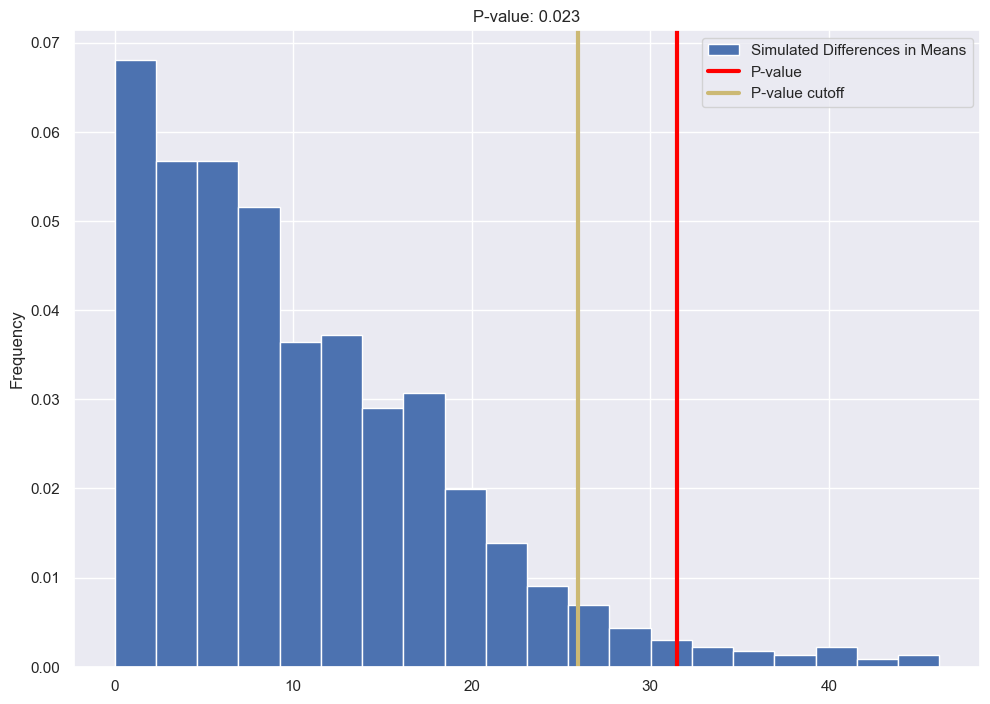

In [487]:
pval = (differences >= obs_diff_mind).mean()
differences.plot(kind='hist', density=True, ec='w', bins=20, title=f'P-value: {pval}', label='Simulated Differences in Means')
plt.axvline(x=obs_diff_mind, color='red', linewidth=3, label='P-value')

perc = np.percentile(differences, 95) # 5% significance level
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();
if pval < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')

2) Permutation test for the energy dimension

In [488]:
obs_diff_energy = member_df[['energy', 'UserActiveness']].groupby('energy').mean().diff().iloc[-1, 0]
obs_diff_energy = np.abs(obs_diff_energy)
obs_diff_energy

175.85402159708224

In [489]:
is_n = np.array(member_df['energy']=='n')
user_activeness = member_df['UserActiveness'].values
n_n = is_n.sum()
n_s = member_df.shape[0] - n_n

is_n_permutations = np.column_stack([
    np.random.permutation(is_n)
    for _ in range(1000)
]).T

mean_n = (user_activeness * is_n_permutations).sum(axis=1) / n_n
mean_s = (user_activeness * ~is_n_permutations).sum(axis=1) / n_s
differences = pd.Series(np.abs(mean_n - mean_s))

There is a significant difference.


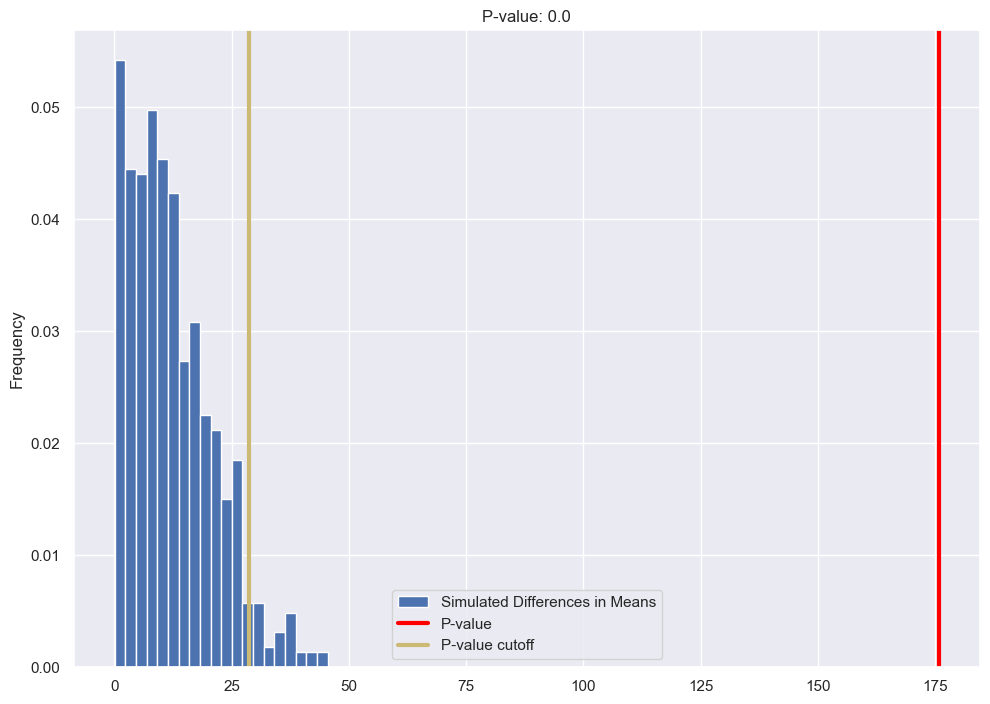

In [490]:
pval = (differences >= obs_diff_energy).mean()
differences.plot(kind='hist', density=True, ec='w', bins=20, title=f'P-value: {pval}', label='Simulated Differences in Means')
plt.axvline(x=obs_diff_energy, color='red', linewidth=3, label='P-value')

perc = np.percentile(differences, 95) # 5% significance level
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();
if pval < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')

3) Permutation test for the nature dimension

In [491]:
obs_diff_nature = member_df[['nature', 'UserActiveness']].groupby('nature').mean().diff().iloc[-1, 0]
obs_diff_nature = np.abs(obs_diff_nature)
obs_diff_nature

85.911809420537

In [492]:
is_f = np.array(member_df['nature']=='f')
user_activeness = member_df['UserActiveness'].values
n_f = is_f.sum()
n_t = member_df.shape[0] - n_f

is_f_permutations = np.column_stack([
    np.random.permutation(is_f)
    for _ in range(1000)
]).T

mean_f = (user_activeness * is_f_permutations).sum(axis=1) / n_f
mean_t = (user_activeness * ~is_f_permutations).sum(axis=1) / n_t
differences = pd.Series(np.abs(mean_f - mean_t))

There is a significant difference.


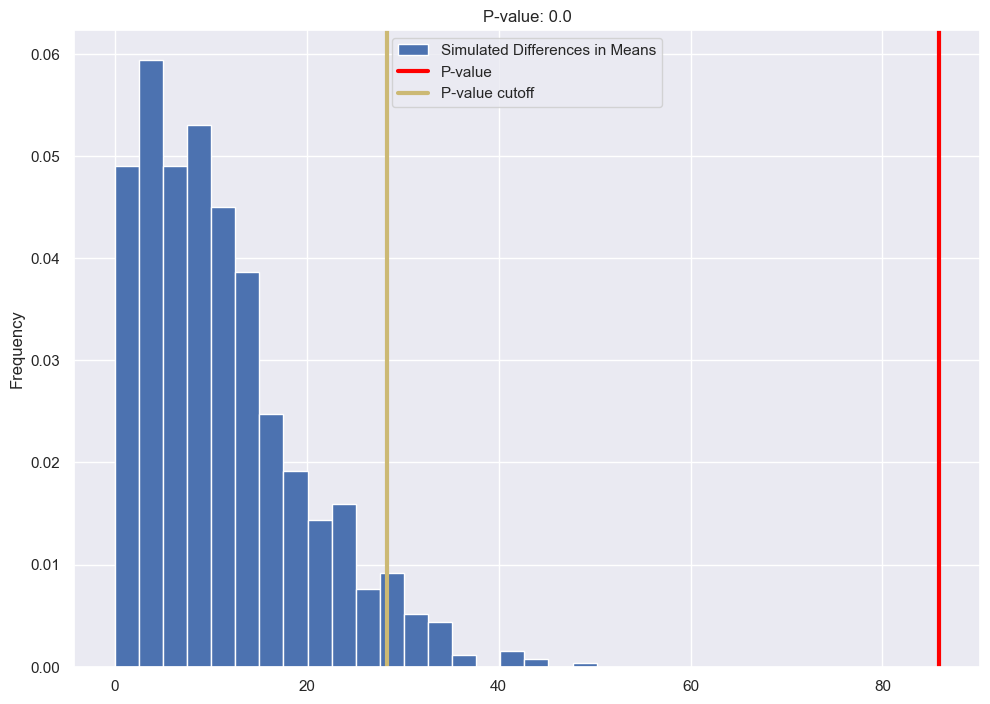

In [493]:
pval = (differences >= obs_diff_nature).mean()
differences.plot(kind='hist', density=True, ec='w', bins=20, title=f'P-value: {pval}', label='Simulated Differences in Means')
plt.axvline(x=obs_diff_nature, color='red', linewidth=3, label='P-value')

perc = np.percentile(differences, 95) # 5% significance level
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();
if pval < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')

4) Permutation test for the tactics dimension

In [494]:
obs_diff_tactics = member_df[['tactics', 'UserActiveness']].groupby('tactics').mean().diff().iloc[-1, 0]
obs_diff_tactics = np.abs(obs_diff_tactics)
obs_diff_tactics

17.492670222958395

In [495]:
is_p = np.array(member_df['tactics']=='p')
user_activeness = member_df['UserActiveness'].values
n_p = is_p.sum()
n_j = member_df.shape[0] - n_p

is_p_permutations = np.column_stack([
    np.random.permutation(is_p)
    for _ in range(1000)
]).T

mean_p = (user_activeness * is_p_permutations).sum(axis=1) / n_p
mean_j = (user_activeness * ~is_p_permutations).sum(axis=1) / n_j
differences = pd.Series(np.abs(mean_p - mean_j))

There is NO significant difference!


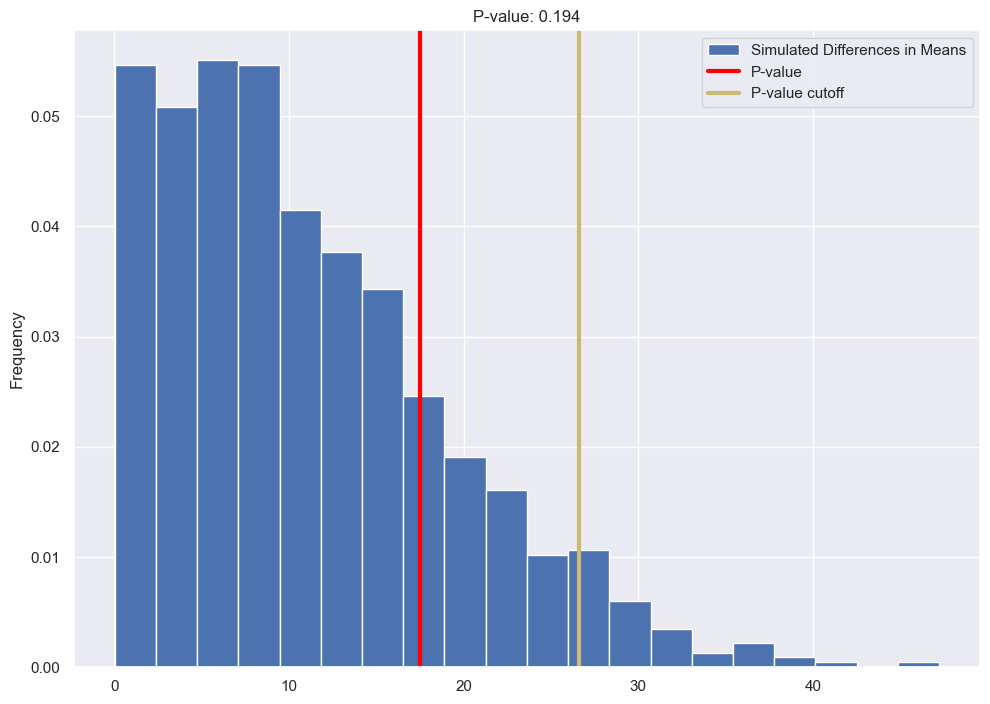

In [496]:
pval = (differences >= obs_diff_tactics).mean()
differences.plot(kind='hist', density=True, ec='w', bins=20, title=f'P-value: {pval}', label='Simulated Differences in Means')
plt.axvline(x=obs_diff_tactics, color='red', linewidth=3, label='P-value')

perc = np.percentile(differences, 95) # 5% significance level
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();
if pval < 0.05:
    print('There is a significant difference.')
else:
    print('There is NO significant difference!')

## To Do: switch `member_df` and `tweet_df` to `engagement_df`

## To Do: also apply the above (remove outlier, draw density histogram) to the `tweet_df`

## To Do: more detials (add more texts and explanations, add subtitle to plots)

## To Do: Relationship btw variables (bivariate analysis & interesting aggregate) e.g. scatter_matrix, overlaid horizontal bar chart by personality types (median)

## To Do: emoji visualization (e.g. wordle)

## Part II: Emoji 😄 (Datasets #1, #2, #3, #4)

In this section, we use emoji for Twitter users' activeness and engagment information analysis and sentiment exploration. We extract emoji from twitter_MBTI.csv(text_df) and user_tweets.csv (user_df) which contains tweets information. To obtain the personality type information, we also created a merged_df by combining mini_user_df (a subset of cleaned user_df) and mbti_labels.csv (user_mbti_df).

In [497]:
text_df.head()

Unnamed: 0                                               text label
0           0  @Pericles216 @HierBeforeTheAC @Sachinettiyil T...  intj
1           1  @Hispanthicckk Being you makes you look cute||...  intj
2           2  @Alshymi Les balles sont réelles et sont tirée...  intj
3           3  I'm like entp but idiotic|||Hey boy, do you wa...  intj
4           4  @kaeshurr1 Give it to @ZargarShanif ... He has...  intj

In [498]:
text_df.shape

(7811, 3)

In [499]:
user_df.head()

id                                            tweet_1   
0   160881623  @andresitonieve Me he quedado igual estoy llor...  \
1    28968838  PLEASE VOTE, VOTE, VOTE FOR AMYBETH! thanks! i...   
2  2325006565  みんなからの匿名質問を募集中！\n\nこんな質問に答えてるよ\n● Hello…\n thi...   
3   907848145  RT @yep4andy: 🤷‍♀️\n#EXOLSelcaDay \n@weareoneE...   
4  1330237585         @DaryKiri_ Gracias a ti por apreciarlo 😭✌🏻   

                                             tweet_2   
0  RT @heikala_art: Fragment of a Star 💫 Celebrat...  \
1  RT @sofeimous: Look at this cutie! Thank you f...   
2  RT @shokami_movie: 今日は…#佐藤の日 🤩💓\n\n我らが座長 #佐藤大樹...   
3  RT @lqldks: when is this from??? 😭😭😭 https://t...   
4  RT @DaryKiri_: @nemuiryuu Gracias por poner en...   

                                             tweet_3   
0  RT @bananamisart: I heard it was BOtW's 3rd an...  \
1  'kelangan talaga lumipat ng bahay, pero di ka ...   
2              RT @taiki__official: 今日は #佐藤の日 らしいです😂   
3  RT @j__nmyeon: since we're talking about suhø,...   
4    https://t.co/y8rrc8yJHi https://t.co/Xte4LM6LyK   

                                             tweet_4   
0  RT @night_sprout: new banner time!! https://t....  \
1  forgiveness and justice.\nforgiveness with jus...   
2  RT @Auditionblue: #Auditionblue ４月号発売中です！\n本日３...   
3  I am supporting this fundraising page https://...   
4  RT @izzyhumair: Rt if you give Goths permissio...   

                                             tweet_5   
0  RT @dealer_rug: Why is everyone buying toilet ...  \
1        hirap maging babae no? #PamilyaKoPagkabuwag   
2  RT @generationsfext: #GENERATIONS WORLD TOUR 2...   
3  RT @cubsie_: Sun and moon outfits https://t.co...   
4  @ageyoru Dw you’re absolutely right, stan heal...   

                                             tweet_6   
0    @andresitonieve Amo el diseño de este personaje  \
1  eh damang-dama ko yung pagod ni luz, yung pago...   
2  PenguPooh\nいいねされた数:10(前日比:+6)\nフォローした数:5(前日比:+...   
3  @mouthysehun that looks like porridge AND TO D...   
4                🤢🤢🤢🤢🤢🤢🤢🤢🤢🤢🤮 https://t.co/wn7bh40tGU   

                                             tweet_7   
0  RT @Tchaigothsky: UNFORTUNATELY I CANT STOP WA...  \
1  oo nga no? makes you think, what's your deal-b...   
2  PenguPooh\nツイート数:27(前日比:+5)\nRTした数:19(前日比:+7)\...   
3  RT @weareoneEXO: Au Revoir, Paris (세훈)\n\n👉🏻ht...   
4  stop asking for my money cygames I don’t have any   

                                             tweet_8   
0  RT @_Ritao_: IT'S SO CUTE AHHHHHHH😭 https://t....  \
1  hay nako si apol timing fail talaga.\n#Pamilya...   
2  RT @HimeROAR: Does nails and puts on makeup to...   
3  RT @sukaihan: this is definitely one of my fav...   
4  @vonfriedhof Desde luego se están esforzando e...   

                                             tweet_9  ...   
0  RT @Lesfleursdmal: Os dejo esto por aquí por s...  ...  \
1  RT @tracy_erickson: Halimaw si Sylvia Sanchez....  ...   
2  RT @kapsulecore: I hate to come on main and so...  ...   
3  RT @bblyds: oh to be watching the rain and lis...  ...   
4  RT @Ryusei_Rainbow_: “If you’re going to start...  ...   

                                           tweet_191   
0           NOOOOOOOOOOO MURCIA HA CAÍDO TAMBIÉN 😔😔😔  \
1  RT @GingerSpirits: AB giving me Lucas content?...   
2  RT @NYLONJAPAN: “今週何買う？”をテーマに男女共に楽しめるファッションページ...   
3  RT @sehunownsme: [hunstagram] Remember to your...   
4                                nothing as expected   

                                           tweet_192   
0  @ederugaruto Si te están amenazando de esa man...  \
1  RT @musicfanforeva2: god bless the writers of ...   
2                                @coffeebourbon OMFG   
3  RT @mishyeol: [🖼WP] \nEXO-L Welcome Kit Photo ...   
4                            this game was a mistake   

                                           tweet_193   
0  19. Siempre me han encantado los días de fuego...  \
1  RT @AtheerforAnne: @TahiraOsman4 https://t.co/...   
2  RT @MLBJapan: 【 #ドジャース 】3度の #サイ

In [500]:
user_df.shape

(24598, 201)

In [501]:
user_mbti_df = label_df
user_mbti_df.head()

id mbti_personality
0   160881623             infp
1    28968838             infp
2  2325006565             infp
3   907848145             infp
4  1330237585             infp

### 1) Drop useless columns and set meaningful index
We drop `Unnamed: 0` column in the `text_df` since it is a series of duplicate indices.
We set the index of `user_df` and `user_mbti_df` with `id` column since it uniquely indentify each Twitter user.

In [502]:
text_df = text_df.drop('Unnamed: 0', axis=1)
user_df = user_df.set_index('id', drop = True)
user_mbti_df = user_mbti_df.set_index('id', drop = True)

### 2) Checking column's datatype
According to the `DtypeWarning`, we have mixed data types in multiple columns (all tweets column). To remove this warning, we will first convert `id` column and all tweet columns from mixed object type to tidy object type (string type).

In [503]:
user_df.dtypes

tweet_1      object
tweet_2      object
tweet_3      object
tweet_4      object
tweet_5      object
              ...  
tweet_196    object
tweet_197    object
tweet_198    object
tweet_199    object
tweet_200    object
Length: 200, dtype: object

In [504]:
user_df = user_df.astype(str)

### 3) Checking missingness
- There are multiple `'nan'` values in `user_df`. Since we only care about the emoji in tweets, we decide to only keep the first 10 tweets of each Twitter users and combine each Twitter users' tweets into a single megatweet. Thus, we will only need to drop 16 Twitter users with 0 tweets, which will not affect our general analysis.
- There is no missingness in `text_df`, and `user_mbti_df`. Thus, we do not need to deal with `NaN` values.

In [505]:
user_df.isna().sum(axis = 0).sum()

0

In [506]:
user_df.isin(['nan', 'NaN']).sum(axis = 0).iloc[:10]

tweet_1        16
tweet_2      5681
tweet_3     11514
tweet_4     11516
tweet_5     11517
tweet_6     11518
tweet_7     11518
tweet_8     11521
tweet_9     11521
tweet_10    11522
dtype: int64

In [507]:
user_df = user_df[user_df['tweet_1'] != 'nan']

In [508]:
user_df.isin(['nan', 'NaN']).sum(axis = 0).iloc[:10]

tweet_1         0
tweet_2      5665
tweet_3     11498
tweet_4     11500
tweet_5     11501
tweet_6     11502
tweet_7     11502
tweet_8     11505
tweet_9     11505
tweet_10    11506
dtype: int64

In [509]:
text_df.isna().sum(axis = 0).sum()

0

In [510]:
text_df.isin(['nan', 'NaN']).sum(axis = 0)

text     0
label    0
dtype: int64

In [511]:
user_mbti_df.isna().sum(axis = 0).sum()

0

In [512]:
user_mbti_df.isin(['nan', 'NaN']).sum(axis = 0)

mbti_personality    0
dtype: int64

### 4) Extract emoji
#### 4.1 extract emoji from `text_df`

In [513]:
#method that return a list of distinct emoji from a given string
def find_distinct_emoji(text):
    return emoji.distinct_emoji_list(text)

In [514]:
#method that return the number of emoji from a given string
def find_emoji_count(text):
    return emoji.emoji_count(text)

In [515]:
#find distinct emoji in each tweet
text_df['emoji'] = text_df['text'].apply(find_distinct_emoji)
text_df['emoji'] 

0                                        [🇬🇧, 😎, 😳, 😏, 👆]
1                                   [😂, 😎, 😏, 😘, 🙂, 😉, 🤤]
2                        [😭, ☠️, 🤜🏻, ✌🏻, 🧍🏻‍♀️, 😍, 🤏🏻, 👋]
3                                                      []
4       [😂, 🎁, 😪, 🌚, 🤣, 🙄, 🥹, 🙂, 🤧, 😊, 🎊, 🥲, 👋, ❤️, 👏, 🥺]
                              ...                        
7806          [😕, 🐻, 😭, 💀, 👁️, 😼, ✨, 💔, 👄, ☹️, 😔, 🫶🏽, 🫶🏼]
7807    [😎, 😳, 🙂, ➡️, 🥶, 💪, 😂, 💀, 👍, ‼️, 🙏, 👽, 🤝, ☺️, ...
7808          [💪, 💋, 😭, 😘, 🖕, 🙄, 🔫, 🤘, 💕, ✌️, 😍, 😌, 😢, 🥺]
7809    [🥰, ☠, 🤓, 🧛🏾‍♂️, ⚔, 💓, 🤗, 👏, 😶, 😂, 💘, 😭, 👍, 📸,...
7810    [😎, ☹️, 🤷‍♀️, 💞, 😇, 🤗, 🏊‍♀️, 🥺, 💪, 🥱, 🤢, 😭, 🫲,...
Name: emoji, Length: 7811, dtype: object

## EDA -------

In [516]:
#find number of emoji in each tweet
text_df['num_of_emoji'] = text_df['text'].apply(find_emoji_count)
text_df['num_of_emoji'] 

0         7
1        15
2        15
3         0
4       107
       ... 
7806     52
7807     38
7808     49
7809     58
7810    159
Name: num_of_emoji, Length: 7811, dtype: int64

In [517]:
text_df['four_types'] = text_df['label'].apply(getFourTypes)
text_df['four_types']

0        Analysts
1        Analysts
2        Analysts
3        Analysts
4        Analysts
          ...    
7806     Analysts
7807     Analysts
7808     Analysts
7809    Diplomats
7810    Explorers
Name: four_types, Length: 7811, dtype: object

In [518]:
# Method that finds all emoji for a given personality type
def create_emoji_lst(personality_type, system = 'mbti'):
    if system == 'mbti':
        return text_df[text_df['label'] == personality_type]['emoji'].sum()
    elif system == '4t':
        return text_df[text_df['four_types'] == personality_type]['emoji'].sum()

In [519]:
# Method that returns the total count of all the emoji from the given personality type 
def emoji_total_count(personality_type, system = 'mbti'):
    if system == 'mbti':
        return text_df[text_df['label'] == personality_type]['num_of_emoji'].sum()
    elif system == '4t':
        return text_df[text_df['four_types'] == personality_type]['num_of_emoji'].sum()

In [520]:
# Method that returns the top 10 emoji from the given personality type 
#and the count of how many times each emoji occurs.
def top_10_emoji_count(personality_type, system = 'mbti'):
    return pd.Series(create_emoji_lst(personality_type, system)).value_counts().take(np.arange(10))

In [521]:
# Find all personality types
personality_type_lst = text_df['label'].unique()
personality_type_lst

array(['intj', 'intp', 'entj', 'entp', 'infj', 'infp', 'enfj', 'enfp',
       'istj', 'isfj', 'estj', 'esfj', 'istp', 'isfp', 'estp', 'esfp'],
      dtype=object)

In [522]:
# personality types and its total emoji count
personality_df = pd.DataFrame()
personality_df['personality_type'] = pd.Series(personality_type_lst)
personality_df['emoji_count'] = personality_df['personality_type'].apply(emoji_total_count)
personality_df

personality_type  emoji_count
0              intj        42342
1              intp        43747
2              entj        14676
3              entp        27511
4              infj        72705
5              infp        80143
6              enfj        34790
7              enfp        46998
8              istj        15204
9              isfj        30944
10             estj         4769
11             esfj         6509
12             istp        19982
13             isfp        22498
14             estp         6841
15             esfp        12714

In [523]:
# personality types and its Twitter users count
count_df = text_df.groupby('label').count()[['emoji']].rename(columns = {'emoji':'id_count'})
count_df

id_count
label          
enfj        518
enfp        729
entj        279
entp        577
esfj        105
esfp        174
estj         81
estp        100
infj       1057
infp       1282
intj        781
intp        811
isfj        364
isfp        367
istj        259
istp        327

In [524]:
# merge the two previous dataframe and compute emoji per person
personality_df = personality_df.merge(count_df, left_on = 'personality_type', right_index = True)
personality_df['emoji per person'] = personality_df['emoji_count']/personality_df['id_count']
personality_df

personality_type  emoji_count  id_count  emoji per person
0              intj        42342       781         54.215109
1              intp        43747       811         53.942047
2              entj        14676       279         52.602151
3              entp        27511       577         47.679376
4              infj        72705      1057         68.784295
5              infp        80143      1282         62.514041
6              enfj        34790       518         67.162162
7              enfp        46998       729         64.469136
8              istj        15204       259         58.702703
9              isfj        30944       364         85.010989
10             estj         4769        81         58.876543
11             esfj         6509       105         61.990476
12             istp        19982       327         61.107034
13             isfp        22498       367         61.302452
14             estp         6841       100         68.410000
15             esfp        12714       174         73.068966

In [525]:
# find the top 10 most commonly used emoji for each personality type
for p in personality_type_lst:
    print(p)
    print(top_10_emoji_count(p))

intj
😭     481
😂     248
🥺     227
❤️    206
🥰     196
🤣     170
💀     156
😍     155
🥹     143
😔     135
Name: count, dtype: int64
intp
😭     543
🥺     261
💀     222
😂     189
🥰     171
😍     170
😔     164
❤️    160
🥹     145
🥲     138
Name: count, dtype: int64
entj
😭     168
😂      91
❤️     73
🥺      73
💀      63
😍      57
🤣      55
🥰      54
😔      52
🥹      48
Name: count, dtype: int64
entp
😭     381
💀     151
🥺     148
❤️    123
😂     120
😍     107
😔     100
🥰      97
💔      95
🤣      76
Name: count, dtype: int64
infj
😭     703
😂     406
🥺     403
❤️    323
🥰     320
😍     268
🤣     263
🥹     240
✨     233
💀     222
Name: count, dtype: int64
infp
😭     935
🥺     501
❤️    334
🥰     330
😂     315
💀     299
😍     294
🥲     242
😔     239
🥹     239
Name: count, dtype: int64
enfj
😭     355
🥺     204
😂     176
🥰     160
❤️    146
😍     136
👀     126
🤣     112
🥲     109
🥹     106
Name: count, dtype: int64
enfp
😭     503
🥺     272
❤️    232
🥰     214
😂     208
😍     190
💀     164
🥹     15

In [526]:
four_types_lst = text_df['four_types'].unique().tolist()

In [527]:
# find the top 10 most commonly used emoji for each type in four types
for p in four_types_lst:
    print(p)
    print(top_10_emoji_count(p, '4t'))

Analysts
😭     1573
🥺      709
😂      648
💀      592
❤️     562
🥰      518
😍      489
😔      451
🤣      434
🥹      407
Name: count, dtype: int64
Diplomats
😭     2496
🥺     1380
😂     1105
❤️    1035
🥰     1024
😍      888
💀      790
🥹      740
🤣      729
🥲      718
Name: count, dtype: int64
Sentinels
😭     598
🥺     326
😂     264
😍     229
❤️    215
🥰     206
🥲     192
💀     184
🥹     184
🤣     174
Name: count, dtype: int64
Explorers
😭     750
🥺     348
💀     271
❤️    259
😍     240
😂     229
🥹     225
🥰     214
😔     198
💔     193
Name: count, dtype: int64


In [528]:
comment_words = top_10_emoji_count('infp')

In [529]:
comment_words.index[0]

'😭'

In [530]:
e_tokens_lst = []
for i in range(len(comment_words)):
  e_tokens_lst = e_tokens_lst+[comment_words.index[i]]*comment_words[i]
e_str = " ".join(e_tokens_lst)+" "

In [531]:
tokens = ['a', 'b', 'b']

In [532]:
hhh = " ".join(tokens)+" "
hhh

'a b b '

In [533]:
#https://stackoverflow.com/questions/66473771/wordcloud-for-only-emojis

In [534]:
! pip install emojis matplotlib wordcloud

In [535]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
import emojis

In [536]:
class EmojiCloud:
    def __init__(self, font_path='Symbola.otf'):
        self.font_path = font_path
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

        
    def initialize_wordcloud(self):
        return WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='white',
                               random_state=42,
                               collocations=False)

    
    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = '42, 88%'

        current_emoji_probability = self.emoji_probability[word]
        if current_emoji_probability >= 0.10:
            opacity = 50
        else:
            opacity = 75 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, text):
        emoji_frequencies = Counter(emojis.iter(text))
        total_count = sum(emoji_frequencies.values())
        
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        
        plt.figure(figsize=(20,10))
        plt.imshow(wc.recolor(color_func=self.color_func, random_state=42))
        plt.axis("off")

In [537]:
# Please upload the Symbola file to your local google drive. Thank you!
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

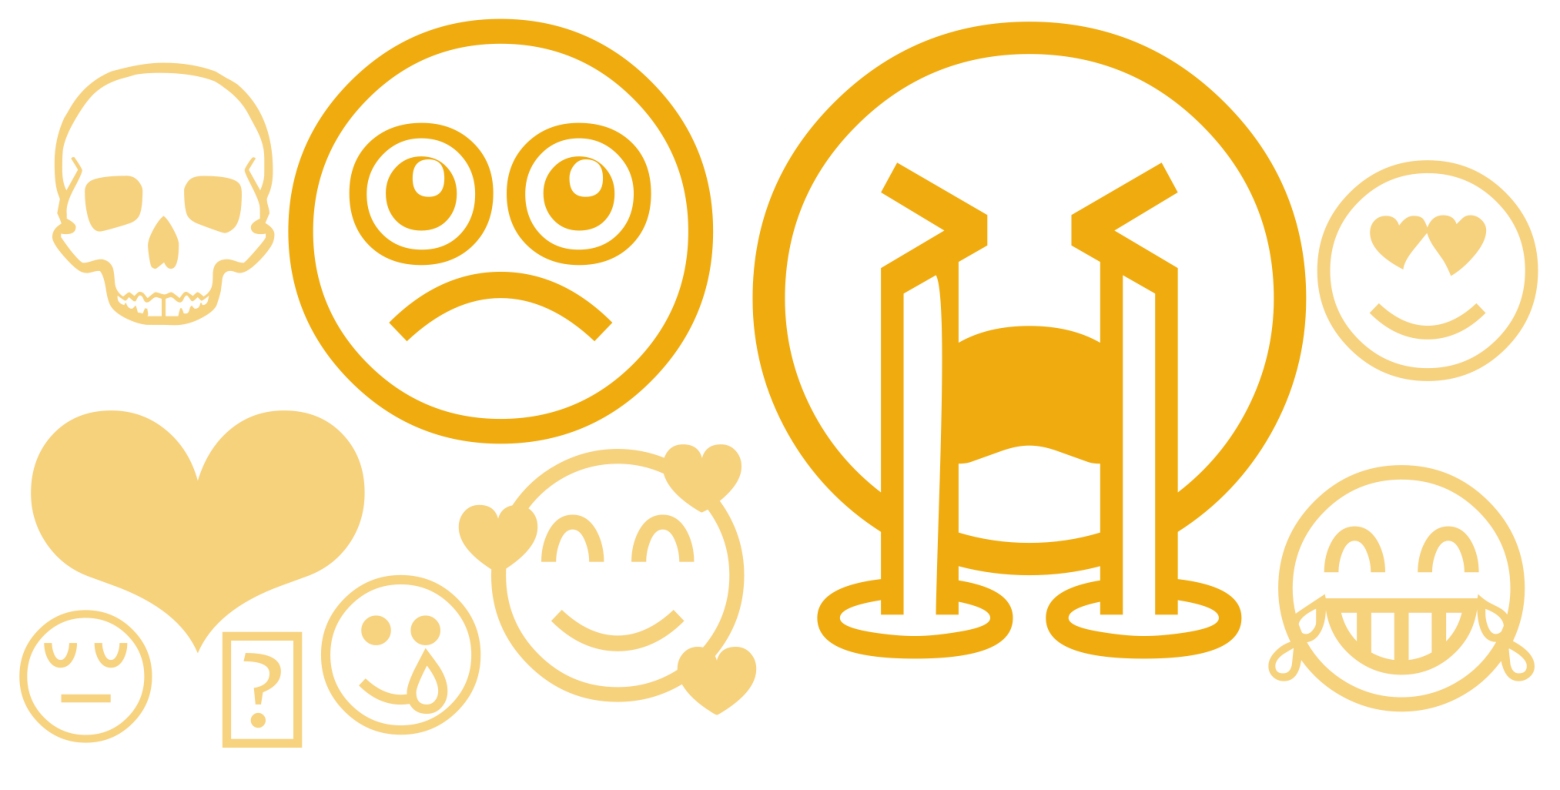

In [ ]:


emoji_cloud = EmojiCloud(font_path='/content/drive/My Drive/Symbola/Symbola.otf')
emoji_cloud.generate(e_str)

In [ ]:
Symbola_font_path = "https://drive.google.com/file/d/1WaiIB2bHciHFL19TCjJIZQS6lLlRF-ok/view?usp=sharing"

In [ ]:
Symbola_font_path.split('/')#[-1]

['https:', '', 'drive.google.com', 'uc?id=view?usp=sharing']

In [ ]:
Symbola_font_path = DRIVE_URL+'1WaiIB2bHciHFL19TCjJIZQS6lLlRF-ok'
Symbola_font_path

'https://drive.google.com/uc?id=1WaiIB2bHciHFL19TCjJIZQS6lLlRF-ok'

In [ ]:
emoji_cloud = EmojiCloud(font_path= Symbola_font_path)
emoji_cloud.generate(e_str)

OSError: ignored

##### Observation: 😭 is the top 1 emoji for all personality types

#### 4.2 create `mini_user_df` from `user_df`, merge it with `user_mbti_df`, and extract emoji.

- Since there are a maximum of 200 tweets for a Twitter user, but only a few users have 200 tweets, so we decide to only include 10 tweets from each users and combine each of them to a megatweet.

In [ ]:
# Extract the first 10 user tweets from all users
mini_user_df = user_df.iloc[:,:11]
mini_user_df

In [ ]:
#convert index type
user_mbti_df.index = user_mbti_df.index.astype(str)
user_mbti_df

In [ ]:
#merge the dataframe with tweets and the the dataframe with personality types
merged_df = mini_user_df.merge(user_mbti_df, left_index=True, right_index = True)
merged_df

In [ ]:
#sum all the tweets for each person
merged_df['all_tweets'] = (merged_df['tweet_1']+merged_df['tweet_2']+merged_df['tweet_3']+
                           merged_df['tweet_4']+merged_df['tweet_5']+merged_df['tweet_6']+
                           merged_df['tweet_7']+merged_df['tweet_8']+merged_df['tweet_9']+
                           merged_df['tweet_10']
                          )

In [ ]:
#find distinct emoji for each Twitter user
merged_df['all_emoji'] = merged_df['all_tweets'].astype(str).apply(find_distinct_emoji)

In [ ]:
#find the number of emoji for each Twitter user
merged_df['num_of_emoji'] = merged_df['all_tweets'].astype(str).apply(find_emoji_count)

In [ ]:
# Method that finds all emoji for a given personality type
def create_emoji_lst_2(personality_type):
    return merged_df[merged_df['mbti_personality'] == personality_type]['all_emoji'].sum()

In [ ]:
# Method that returns the total count of all the emoji from the given personality type 
def emoji_total_count_2(personality_type):
    return merged_df[merged_df['mbti_personality'] == personality_type]['num_of_emoji'].sum()

In [ ]:
# Method that returns the top 10 emoji from the given personality type 
#and the count of how many times each emoji occurs.
def top_10_emoji_count_2(personality_type):
    return pd.Series(create_emoji_lst_2(personality_type)).value_counts().take(np.arange(10))

In [ ]:
# find the top 10 most commonly used emoji for each personality type
for p in personality_type_lst:
    print(p)
    print(top_10_emoji_count_2(p))

In [ ]:
# personality types and its total emoji count
personality_df_2 = pd.DataFrame()
personality_df_2['personality_type'] = pd.Series(personality_type_lst)
personality_df_2['emoji_count'] = personality_df_2['personality_type'].apply(emoji_total_count_2)
personality_df_2

In [ ]:
# personality types and its Twitter users count
count_df_2 = merged_df.groupby('mbti_personality').count()[['num_of_emoji']].rename(columns = {'num_of_emoji':'id_count'})
count_df_2

In [ ]:
# merge the two previous dataframe and compute emoji per person
personality_df_2 = personality_df_2.merge(count_df_2, left_on = 'personality_type', right_index = True)
personality_df_2['emoji per person'] = personality_df_2['emoji_count']/personality_df_2['id_count']
personality_df_2